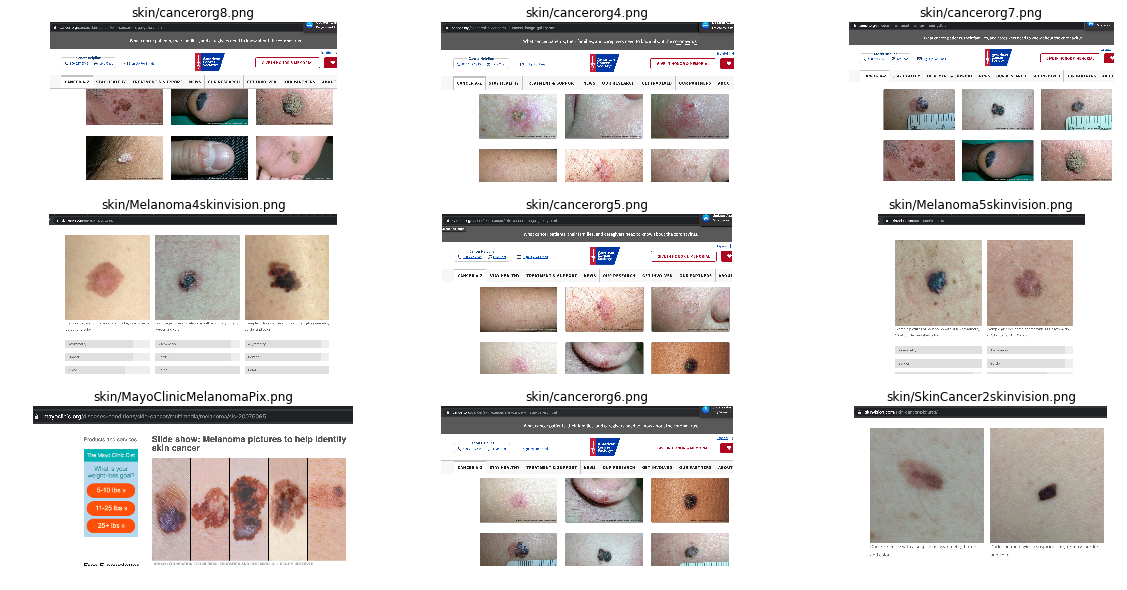

In [5]:
from matplotlib import pyplot as plt
import os
import random

#Get list of file names
_,_,skin_images = next(os.walk ('images'))
fig,ax = plt.subplots(3,3,figsize=(20,10))
#Randomly select and plot an image
for idx, img in enumerate(random.sample(skin_images,9)):
    img_read = plt.imread('images/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('skin/'+img)
plt.show()



In [10]:
import numpy as np
#import sklearn
from sklearn.model_selection import train_test_split
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(values)

test_dataset, training_dataset = sklearn.model_selection.train_test_split(values, train_size=5, test_size=5)
print(training_dataset)
print(test_dataset)

[3, 7, 8, 5, 1]
[2, 9, 6, 10, 4]


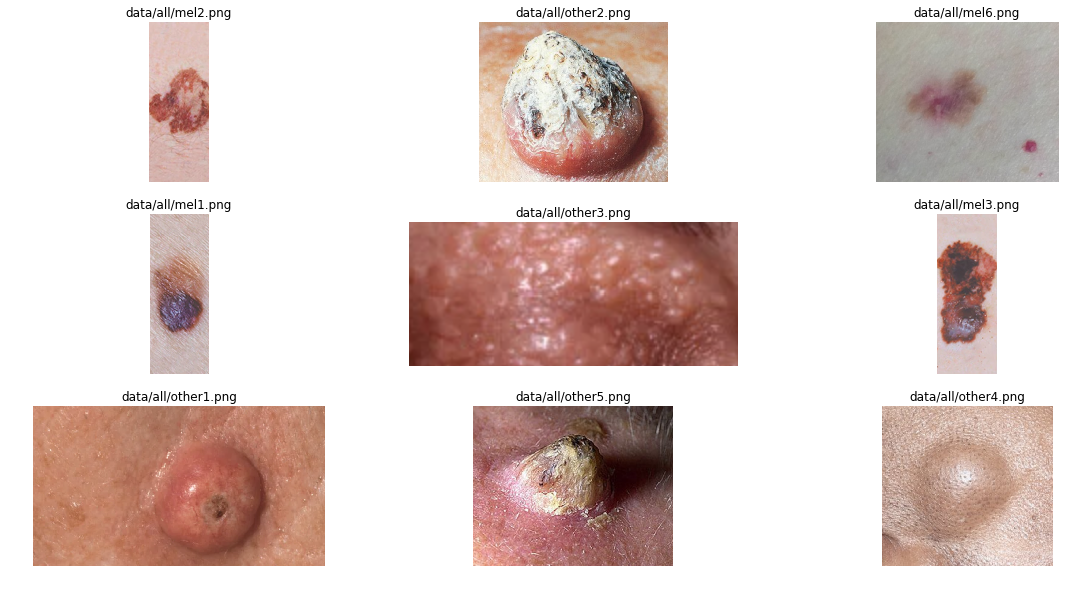

In [11]:
from matplotlib import pyplot as plt
import os
import random

#Get list of file names
_,_,skin_data = next(os.walk ('data/all'))
fig,ax = plt.subplots(3,3,figsize=(20,10))
#Randomly select and plot an image
for idx, img in enumerate(random.sample(skin_data,9)):
    img_read = plt.imread('data/all/'+img)
    ax[int(idx/3), idx%3].imshow(img_read)
    ax[int(idx/3), idx%3].axis('off')
    ax[int(idx/3), idx%3].set_title('data/all/'+img)
plt.show()


In [ ]:
#set out the training, separately the testing images


In [14]:
#The bootstrap method is a resampling technique use to estimate sttistics on a population by sampling a dataset with replacement. 
#It is used in machine learning to estaimte the skill of machine learning models,
#when making predictions not included in the training data.
#It is desirable that the result from estimating machine learning model skill be presented with confidence intervals,
#a feature not readily available with other methods, suc as cross-validation.
#see machineleariningmastery.com/a-gentle-introduction-to-the-bootstrap-method
#must choose the size of the sample (can be the number in the original data set, will be items chosen multiple times)
#and the number of repeats (minimum 20 to 30, could be 100s or 1000s)
#scikit-learn provides a function to be used to resample
#those items not chosen for the sample can be used as out of sample observations.
#Then, fit the model on the samples and evaluate the model on the out-of-sample (out-of-bag) obervations.
from sklearn.utils import resample
data=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
boot = resample(data, replace=True, n_samples=4, random_state=1)
print('Bootstrap sample: %s' % boot)
#out of bag
oob = [x for x in data if x not in boot]
print('Out of bag: %s' % oob)

Bootstrap sample: [0.6, 0.4, 0.5, 0.1]
Out of bag: [0.2, 0.3]


In [29]:
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
d='.'
file_list=os.listdir(d)
print (file_list)
#load dataset
data = pd.read_csv('pima-indians-diabetes.csv', header=None)
values = data.values
#configure bootstrap
n_iterations = 1000
n_size = int(len(data * 0.50))
#run bootstrap
stats = list()
for i in range(n_iterations):
    #prepare train and test sets
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    #fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])
    #evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    
print(score)    

['.ipynb_checkpoints', 'Archive.zip', 'data', 'firstImageClassification.ipynb', 'howToReadMe.tex', 'images', 'pima-indians-diabetes.csv']
0.6655052264808362


C:\Users\Therese\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
import numpy as np
import pandas as pd
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
d='./data/all'
file_list=os.listdir(d)
print (file_list)
n_files = len(file_list)
values = range(n_files)
print(values)
#load dataset
#data = pd.read_csv('pima-indians-diabetes.csv', header=None)
#values = data.values
#configure bootstrap
n_iterations = 5
n_size = int(n_files * 0.50)
#run bootstrap
stats = list()
for i in range(n_iterations):
    #prepare train and test sets
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x not in train])
    print('sample %s' % train)
    print('oob %s' % test)
    #here, the train and test lists identify indices into the file_list
    #so, if we are to use the train and test directories, this would be the information needed to place the files there
    #fit model
    # for augmenting the set of training images
from keras.preprocessing.image import ImageDataGenerator
#image_generator = ImageDataGenerator(rotation_range = 30,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode='nearest')
   # model = DecisionTreeClassifier()
   # model.fit(train[:,:-1], train[:,-1])
    #evaluate model
   # predictions = model.predict(test[:,:-1])
   # score = accuracy_score(test[:,-1], predictions)
    
#print(score)    

['mel1.png', 'mel2.png', 'mel3.png', 'mel4.png', 'mel5.png', 'mel6.png', 'mel7.png', 'other1.png', 'other2.png', 'other3.png', 'other4.png', 'other5.png', 'other6.png', 'other7.png']
range(0, 14)
sample [13, 9, 0, 1, 7, 9, 3]
oob [ 2  4  5  6  8 10 11 12]
sample [3, 9, 5, 8, 4, 5, 13]
oob [ 0  1  2  6  7 10 11 12]
sample [7, 0, 8, 6, 1, 4, 2]
oob [ 3  5  9 10 11 12 13]
sample [12, 4, 4, 0, 5, 1, 9]
oob [ 2  3  6  7  8 10 11 13]
sample [11, 2, 1, 4, 1, 10, 0]
oob [ 3  5  6  7  8  9 12 13]


In [66]:
#want to use the 17 pos and 17 neg training files,
#also the 4 pos and 4 neg test files
#however, will need the flow_from_directory eventually, so do that.

#There is a flow_from_directory method in keras
#it works with large databases, so that fitting all in main memory is not a problem
#to use flow_from_directory, the files need to be separated, according to melanoma vs. other
#want to process the description files one by one,
#find out whether the corresponding image is melanoma or other
#open a csv.
description_dir = 'ISIC-Archive-Downloader-master/Data/Descriptions'
image_dir = 'ISIC-Archive-Downloader-master/Data/Images'
file_list=os.listdir(description_dir)
#n_files = len(file_list)
#fileNums = list(range(n_files))
import csv
nMelanomaImages = 0
with open('melVsOtherSplit2.csv', 'w', newline='') as csvfile:
    fieldnames = ['file', 'melanoma=1']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for descFileName in file_list:
        #open the description file
        #fName = description_dir+'/ISIC_0000000'
        #replacen = len(str(index))
        #print (fName)
        #truncatedName = fName[0:len(fName)-replacen]
        #print (truncatedName)
        #fName = truncatedName+str(index)
        #there is some number of digits in index
        #want to replace that number of digits (from the right) with the index
        #print(fName)
        melanOrNot = 0
        imageFileName=descFileName+'.jpeg'
        #figure out whether melanoma or not
        pathName = description_dir+'/'+descFileName
        with open(pathName, newline='') as csvfile:
            descReader = csv.DictReader(csvfile)
            #there is a field clinical, which is a dict
            #within that dict there is a field diagnosis, which is a string
            #it might be melanoma
            
            for row in descReader:
                
#read a description file
#determine whether melanoma or not

                
                for key, value in row.items(): 
                    if('diagnosis' in value): #works but these are nested dicts, ought to do better
                        if('melanoma' in value):
                            #print(descFileName, count, key, value)
                            melanOrNot = 1
                            nMelanomaImages = nMelanomaImages+1
                            #want to copy corresponding file into the melanoma set
                            targetDir = 'Dataset/Melanoma'
                        else: #else want to copy corresponding file into other set
                            targetDir = 'Dataset/Other'
                        cmd = 'cp '+image_dir+'/'+imageFileName+' '+targetDir+'/'+imageFileName
                        print(cmd)

                        returned_value = os.system(cmd)  # returns the exit code in unix
                            
                        
                            
                            
#mark that row of csv output file with filename and melanoma or not.                            
        writer.writerow({'file': descFileName, 'melanoma=1': melanOrNot})

    
print('wrote it') 


cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000000.jpeg Dataset/Other/ISIC_0000000.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000000.jpeg Dataset/Other/ISIC_0000000.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000001.jpeg Dataset/Other/ISIC_0000001.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000001.jpeg Dataset/Other/ISIC_0000001.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000002.jpeg Dataset/Melanoma/ISIC_0000002.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000002.jpeg Dataset/Other/ISIC_0000002.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000003.jpeg Dataset/Other/ISIC_0000003.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000003.jpeg Dataset/Other/ISIC_0000003.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000004.jpeg Dataset/Melanoma/ISIC_0000004.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000004.jpeg Dataset/Other/ISIC_0000004.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000042.jpeg Dataset/Other/ISIC_0000042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000043.jpeg Dataset/Melanoma/ISIC_0000043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000043.jpeg Dataset/Other/ISIC_0000043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000044.jpeg Dataset/Other/ISIC_0000044.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000044.jpeg Dataset/Other/ISIC_0000044.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000045.jpeg Dataset/Other/ISIC_0000045.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000045.jpeg Dataset/Other/ISIC_0000045.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000046.jpeg Dataset/Melanoma/ISIC_0000046.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000046.jpeg Dataset/Other/ISIC_0000046.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000047.jpeg Dataset/Other/ISIC_0000047.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000086.jpeg Dataset/Other/ISIC_0000086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000087.jpeg Dataset/Other/ISIC_0000087.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000087.jpeg Dataset/Other/ISIC_0000087.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000088.jpeg Dataset/Other/ISIC_0000088.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000088.jpeg Dataset/Other/ISIC_0000088.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000089.jpeg Dataset/Other/ISIC_0000089.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000089.jpeg Dataset/Other/ISIC_0000089.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000090.jpeg Dataset/Other/ISIC_0000090.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000090.jpeg Dataset/Other/ISIC_0000090.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000091.jpeg Dataset/Other/ISIC_0000091.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000130.jpeg Dataset/Other/ISIC_0000130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000130.jpeg Dataset/Other/ISIC_0000130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000131.jpeg Dataset/Other/ISIC_0000131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000131.jpeg Dataset/Other/ISIC_0000131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000132.jpeg Dataset/Other/ISIC_0000132.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000132.jpeg Dataset/Other/ISIC_0000132.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000133.jpeg Dataset/Other/ISIC_0000133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000133.jpeg Dataset/Other/ISIC_0000133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000134.jpeg Dataset/Other/ISIC_0000134.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000134.jpeg Dataset/Other/ISIC_0000134.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000173.jpeg Dataset/Melanoma/ISIC_0000173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000173.jpeg Dataset/Other/ISIC_0000173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000174.jpeg Dataset/Melanoma/ISIC_0000174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000174.jpeg Dataset/Other/ISIC_0000174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000175.jpeg Dataset/Melanoma/ISIC_0000175.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000175.jpeg Dataset/Other/ISIC_0000175.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000176.jpeg Dataset/Melanoma/ISIC_0000176.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000176.jpeg Dataset/Other/ISIC_0000176.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000177.jpeg Dataset/Other/ISIC_0000177.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000177.jpeg Dataset/Other/ISIC_0000177.jpeg
cp ISIC-Archive-Downloader-m

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000216.jpeg Dataset/Other/ISIC_0000216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000216.jpeg Dataset/Other/ISIC_0000216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000217.jpeg Dataset/Other/ISIC_0000217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000217.jpeg Dataset/Other/ISIC_0000217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000218.jpeg Dataset/Other/ISIC_0000218.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000218.jpeg Dataset/Other/ISIC_0000218.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000219.jpeg Dataset/Other/ISIC_0000219.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000219.jpeg Dataset/Other/ISIC_0000219.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000220.jpeg Dataset/Other/ISIC_0000220.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000220.jpeg Dataset/Other/ISIC_0000220.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000259.jpeg Dataset/Other/ISIC_0000259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000260.jpeg Dataset/Other/ISIC_0000260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000260.jpeg Dataset/Other/ISIC_0000260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000261.jpeg Dataset/Other/ISIC_0000261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000261.jpeg Dataset/Other/ISIC_0000261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000262.jpeg Dataset/Other/ISIC_0000262.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000262.jpeg Dataset/Other/ISIC_0000262.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000263.jpeg Dataset/Other/ISIC_0000263.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000263.jpeg Dataset/Other/ISIC_0000263.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000264.jpeg Dataset/Other/ISIC_0000264.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000303.jpeg Dataset/Melanoma/ISIC_0000303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000303.jpeg Dataset/Other/ISIC_0000303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000304.jpeg Dataset/Melanoma/ISIC_0000304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000304.jpeg Dataset/Other/ISIC_0000304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000305.jpeg Dataset/Melanoma/ISIC_0000305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000305.jpeg Dataset/Other/ISIC_0000305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000306.jpeg Dataset/Melanoma/ISIC_0000306.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000306.jpeg Dataset/Other/ISIC_0000306.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000307.jpeg Dataset/Melanoma/ISIC_0000307.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000307.jpeg Dataset/Other/ISIC_0000307.jpeg
cp ISIC-Archive-Downloade

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000345.jpeg Dataset/Other/ISIC_0000345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000346.jpeg Dataset/Other/ISIC_0000346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000346.jpeg Dataset/Other/ISIC_0000346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000347.jpeg Dataset/Other/ISIC_0000347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000347.jpeg Dataset/Other/ISIC_0000347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000348.jpeg Dataset/Other/ISIC_0000348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000348.jpeg Dataset/Other/ISIC_0000348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000349.jpeg Dataset/Other/ISIC_0000349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000349.jpeg Dataset/Other/ISIC_0000349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000350.jpeg Dataset/Other/ISIC_0000350.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000389.jpeg Dataset/Other/ISIC_0000389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000390.jpeg Dataset/Melanoma/ISIC_0000390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000390.jpeg Dataset/Other/ISIC_0000390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000391.jpeg Dataset/Other/ISIC_0000391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000391.jpeg Dataset/Other/ISIC_0000391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000392.jpeg Dataset/Other/ISIC_0000392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000392.jpeg Dataset/Other/ISIC_0000392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000393.jpeg Dataset/Melanoma/ISIC_0000393.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000393.jpeg Dataset/Other/ISIC_0000393.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000394.jpeg Dataset/Melanoma/ISIC_0000394.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000432.jpeg Dataset/Melanoma/ISIC_0000432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000432.jpeg Dataset/Other/ISIC_0000432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000433.jpeg Dataset/Other/ISIC_0000433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000433.jpeg Dataset/Other/ISIC_0000433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000434.jpeg Dataset/Melanoma/ISIC_0000434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000434.jpeg Dataset/Other/ISIC_0000434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000435.jpeg Dataset/Other/ISIC_0000435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000435.jpeg Dataset/Other/ISIC_0000435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000436.jpeg Dataset/Other/ISIC_0000436.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000436.jpeg Dataset/Other/ISIC_0000436.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000475.jpeg Dataset/Other/ISIC_0000475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000476.jpeg Dataset/Other/ISIC_0000476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000476.jpeg Dataset/Other/ISIC_0000476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000477.jpeg Dataset/Other/ISIC_0000477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000477.jpeg Dataset/Other/ISIC_0000477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000478.jpeg Dataset/Other/ISIC_0000478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000478.jpeg Dataset/Other/ISIC_0000478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000479.jpeg Dataset/Other/ISIC_0000479.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000479.jpeg Dataset/Other/ISIC_0000479.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000480.jpeg Dataset/Other/ISIC_0000480.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000519.jpeg Dataset/Melanoma/ISIC_0000519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000519.jpeg Dataset/Other/ISIC_0000519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000520.jpeg Dataset/Melanoma/ISIC_0000520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000520.jpeg Dataset/Other/ISIC_0000520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000521.jpeg Dataset/Melanoma/ISIC_0000521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000521.jpeg Dataset/Other/ISIC_0000521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000522.jpeg Dataset/Melanoma/ISIC_0000522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000522.jpeg Dataset/Other/ISIC_0000522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000523.jpeg Dataset/Other/ISIC_0000523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000523.jpeg Dataset/Other/ISIC_0000523.jpeg
cp ISIC-Archive-Downloader-m

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000562.jpeg Dataset/Other/ISIC_0000562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000563.jpeg Dataset/Other/ISIC_0000563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000563.jpeg Dataset/Other/ISIC_0000563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000564.jpeg Dataset/Other/ISIC_0000564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000564.jpeg Dataset/Other/ISIC_0000564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000565.jpeg Dataset/Other/ISIC_0000565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000565.jpeg Dataset/Other/ISIC_0000565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000566.jpeg Dataset/Other/ISIC_0000566.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000566.jpeg Dataset/Other/ISIC_0000566.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000567.jpeg Dataset/Other/ISIC_0000567.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000606.jpeg Dataset/Other/ISIC_0000606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000607.jpeg Dataset/Other/ISIC_0000607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000607.jpeg Dataset/Other/ISIC_0000607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000608.jpeg Dataset/Other/ISIC_0000608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000608.jpeg Dataset/Other/ISIC_0000608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000609.jpeg Dataset/Other/ISIC_0000609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000609.jpeg Dataset/Other/ISIC_0000609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000610.jpeg Dataset/Other/ISIC_0000610.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000610.jpeg Dataset/Other/ISIC_0000610.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000611.jpeg Dataset/Other/ISIC_0000611.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000649.jpeg Dataset/Other/ISIC_0000649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000650.jpeg Dataset/Other/ISIC_0000650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000650.jpeg Dataset/Other/ISIC_0000650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000651.jpeg Dataset/Other/ISIC_0000651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000651.jpeg Dataset/Other/ISIC_0000651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000652.jpeg Dataset/Other/ISIC_0000652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000652.jpeg Dataset/Other/ISIC_0000652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000653.jpeg Dataset/Other/ISIC_0000653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000653.jpeg Dataset/Other/ISIC_0000653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000654.jpeg Dataset/Other/ISIC_0000654.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000693.jpeg Dataset/Other/ISIC_0000693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000694.jpeg Dataset/Other/ISIC_0000694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000694.jpeg Dataset/Other/ISIC_0000694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000695.jpeg Dataset/Other/ISIC_0000695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000695.jpeg Dataset/Other/ISIC_0000695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000696.jpeg Dataset/Other/ISIC_0000696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000696.jpeg Dataset/Other/ISIC_0000696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000697.jpeg Dataset/Other/ISIC_0000697.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000697.jpeg Dataset/Other/ISIC_0000697.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000698.jpeg Dataset/Other/ISIC_0000698.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000737.jpeg Dataset/Other/ISIC_0000737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000737.jpeg Dataset/Other/ISIC_0000737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000738.jpeg Dataset/Other/ISIC_0000738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000738.jpeg Dataset/Other/ISIC_0000738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000739.jpeg Dataset/Other/ISIC_0000739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000739.jpeg Dataset/Other/ISIC_0000739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000740.jpeg Dataset/Other/ISIC_0000740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000740.jpeg Dataset/Other/ISIC_0000740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000741.jpeg Dataset/Other/ISIC_0000741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000741.jpeg Dataset/Other/ISIC_0000741.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000780.jpeg Dataset/Other/ISIC_0000780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000780.jpeg Dataset/Other/ISIC_0000780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000781.jpeg Dataset/Other/ISIC_0000781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000781.jpeg Dataset/Other/ISIC_0000781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000782.jpeg Dataset/Other/ISIC_0000782.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000782.jpeg Dataset/Other/ISIC_0000782.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000783.jpeg Dataset/Other/ISIC_0000783.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000783.jpeg Dataset/Other/ISIC_0000783.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000784.jpeg Dataset/Other/ISIC_0000784.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000784.jpeg Dataset/Other/ISIC_0000784.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000823.jpeg Dataset/Other/ISIC_0000823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000823.jpeg Dataset/Other/ISIC_0000823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000824.jpeg Dataset/Other/ISIC_0000824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000824.jpeg Dataset/Other/ISIC_0000824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000825.jpeg Dataset/Other/ISIC_0000825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000825.jpeg Dataset/Other/ISIC_0000825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000826.jpeg Dataset/Other/ISIC_0000826.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000826.jpeg Dataset/Other/ISIC_0000826.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000827.jpeg Dataset/Other/ISIC_0000827.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000827.jpeg Dataset/Other/ISIC_0000827.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000866.jpeg Dataset/Other/ISIC_0000866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000867.jpeg Dataset/Other/ISIC_0000867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000867.jpeg Dataset/Other/ISIC_0000867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000868.jpeg Dataset/Other/ISIC_0000868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000868.jpeg Dataset/Other/ISIC_0000868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000869.jpeg Dataset/Other/ISIC_0000869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000869.jpeg Dataset/Other/ISIC_0000869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000870.jpeg Dataset/Other/ISIC_0000870.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000870.jpeg Dataset/Other/ISIC_0000870.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000871.jpeg Dataset/Other/ISIC_0000871.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000909.jpeg Dataset/Other/ISIC_0000909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000910.jpeg Dataset/Other/ISIC_0000910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000910.jpeg Dataset/Other/ISIC_0000910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000911.jpeg Dataset/Other/ISIC_0000911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000911.jpeg Dataset/Other/ISIC_0000911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000912.jpeg Dataset/Other/ISIC_0000912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000912.jpeg Dataset/Other/ISIC_0000912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000913.jpeg Dataset/Other/ISIC_0000913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000913.jpeg Dataset/Other/ISIC_0000913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000914.jpeg Dataset/Other/ISIC_0000914.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000952.jpeg Dataset/Other/ISIC_0000952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000953.jpeg Dataset/Other/ISIC_0000953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000953.jpeg Dataset/Other/ISIC_0000953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000954.jpeg Dataset/Other/ISIC_0000954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000954.jpeg Dataset/Other/ISIC_0000954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000955.jpeg Dataset/Other/ISIC_0000955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000955.jpeg Dataset/Other/ISIC_0000955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000956.jpeg Dataset/Other/ISIC_0000956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000956.jpeg Dataset/Other/ISIC_0000956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000957.jpeg Dataset/Other/ISIC_0000957.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000995.jpeg Dataset/Other/ISIC_0000995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000996.jpeg Dataset/Other/ISIC_0000996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000996.jpeg Dataset/Other/ISIC_0000996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000997.jpeg Dataset/Other/ISIC_0000997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000997.jpeg Dataset/Other/ISIC_0000997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000998.jpeg Dataset/Other/ISIC_0000998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000998.jpeg Dataset/Other/ISIC_0000998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000999.jpeg Dataset/Other/ISIC_0000999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000999.jpeg Dataset/Other/ISIC_0000999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001000.jpeg Dataset/Other/ISIC_0001000.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001039.jpeg Dataset/Other/ISIC_0001039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001039.jpeg Dataset/Other/ISIC_0001039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001040.jpeg Dataset/Other/ISIC_0001040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001040.jpeg Dataset/Other/ISIC_0001040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001041.jpeg Dataset/Other/ISIC_0001041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001041.jpeg Dataset/Other/ISIC_0001041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001042.jpeg Dataset/Other/ISIC_0001042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001042.jpeg Dataset/Other/ISIC_0001042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001043.jpeg Dataset/Other/ISIC_0001043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001043.jpeg Dataset/Other/ISIC_0001043.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001082.jpeg Dataset/Other/ISIC_0001082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001083.jpeg Dataset/Other/ISIC_0001083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001083.jpeg Dataset/Other/ISIC_0001083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001084.jpeg Dataset/Other/ISIC_0001084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001084.jpeg Dataset/Other/ISIC_0001084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001085.jpeg Dataset/Other/ISIC_0001085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001085.jpeg Dataset/Other/ISIC_0001085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001086.jpeg Dataset/Other/ISIC_0001086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001086.jpeg Dataset/Other/ISIC_0001086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001087.jpeg Dataset/Other/ISIC_0001087.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001126.jpeg Dataset/Other/ISIC_0001126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001127.jpeg Dataset/Melanoma/ISIC_0001127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001127.jpeg Dataset/Other/ISIC_0001127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001128.jpeg Dataset/Melanoma/ISIC_0001128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001128.jpeg Dataset/Other/ISIC_0001128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001129.jpeg Dataset/Other/ISIC_0001129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001129.jpeg Dataset/Other/ISIC_0001129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001130.jpeg Dataset/Other/ISIC_0001130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001130.jpeg Dataset/Other/ISIC_0001130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001131.jpeg Dataset/Melanoma/ISIC_0001131.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001169.jpeg Dataset/Other/ISIC_0001169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001169.jpeg Dataset/Other/ISIC_0001169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001170.jpeg Dataset/Other/ISIC_0001170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001170.jpeg Dataset/Other/ISIC_0001170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001171.jpeg Dataset/Other/ISIC_0001171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001171.jpeg Dataset/Other/ISIC_0001171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001172.jpeg Dataset/Other/ISIC_0001172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001172.jpeg Dataset/Other/ISIC_0001172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001173.jpeg Dataset/Other/ISIC_0001173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001173.jpeg Dataset/Other/ISIC_0001173.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001212.jpeg Dataset/Other/ISIC_0001212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001213.jpeg Dataset/Other/ISIC_0001213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001213.jpeg Dataset/Other/ISIC_0001213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001214.jpeg Dataset/Other/ISIC_0001214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001214.jpeg Dataset/Other/ISIC_0001214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001215.jpeg Dataset/Other/ISIC_0001215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001215.jpeg Dataset/Other/ISIC_0001215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001216.jpeg Dataset/Other/ISIC_0001216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001216.jpeg Dataset/Other/ISIC_0001216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001217.jpeg Dataset/Other/ISIC_0001217.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001256.jpeg Dataset/Other/ISIC_0001256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001256.jpeg Dataset/Other/ISIC_0001256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001257.jpeg Dataset/Other/ISIC_0001257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001257.jpeg Dataset/Other/ISIC_0001257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001258.jpeg Dataset/Other/ISIC_0001258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001258.jpeg Dataset/Other/ISIC_0001258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001259.jpeg Dataset/Other/ISIC_0001259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001259.jpeg Dataset/Other/ISIC_0001259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001260.jpeg Dataset/Other/ISIC_0001260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001260.jpeg Dataset/Other/ISIC_0001260.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001299.jpeg Dataset/Other/ISIC_0001299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001299.jpeg Dataset/Other/ISIC_0001299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001300.jpeg Dataset/Other/ISIC_0001300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001300.jpeg Dataset/Other/ISIC_0001300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001301.jpeg Dataset/Other/ISIC_0001301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001301.jpeg Dataset/Other/ISIC_0001301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001302.jpeg Dataset/Other/ISIC_0001302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001302.jpeg Dataset/Other/ISIC_0001302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001303.jpeg Dataset/Other/ISIC_0001303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001303.jpeg Dataset/Other/ISIC_0001303.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001342.jpeg Dataset/Other/ISIC_0001342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001343.jpeg Dataset/Other/ISIC_0001343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001343.jpeg Dataset/Other/ISIC_0001343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001344.jpeg Dataset/Other/ISIC_0001344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001344.jpeg Dataset/Other/ISIC_0001344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001345.jpeg Dataset/Other/ISIC_0001345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001345.jpeg Dataset/Other/ISIC_0001345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001346.jpeg Dataset/Other/ISIC_0001346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001346.jpeg Dataset/Other/ISIC_0001346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001347.jpeg Dataset/Other/ISIC_0001347.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001386.jpeg Dataset/Other/ISIC_0001386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001386.jpeg Dataset/Other/ISIC_0001386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001387.jpeg Dataset/Other/ISIC_0001387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001387.jpeg Dataset/Other/ISIC_0001387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001388.jpeg Dataset/Other/ISIC_0001388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001388.jpeg Dataset/Other/ISIC_0001388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001389.jpeg Dataset/Other/ISIC_0001389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001389.jpeg Dataset/Other/ISIC_0001389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001390.jpeg Dataset/Other/ISIC_0001390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001390.jpeg Dataset/Other/ISIC_0001390.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001429.jpeg Dataset/Other/ISIC_0001429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001429.jpeg Dataset/Other/ISIC_0001429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001430.jpeg Dataset/Other/ISIC_0001430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001430.jpeg Dataset/Other/ISIC_0001430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001431.jpeg Dataset/Other/ISIC_0001431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001431.jpeg Dataset/Other/ISIC_0001431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001432.jpeg Dataset/Other/ISIC_0001432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001432.jpeg Dataset/Other/ISIC_0001432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001433.jpeg Dataset/Other/ISIC_0001433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001433.jpeg Dataset/Other/ISIC_0001433.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001472.jpeg Dataset/Other/ISIC_0001472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001472.jpeg Dataset/Other/ISIC_0001472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001473.jpeg Dataset/Other/ISIC_0001473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001473.jpeg Dataset/Other/ISIC_0001473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001474.jpeg Dataset/Other/ISIC_0001474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001474.jpeg Dataset/Other/ISIC_0001474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001475.jpeg Dataset/Other/ISIC_0001475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001475.jpeg Dataset/Other/ISIC_0001475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001476.jpeg Dataset/Other/ISIC_0001476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001476.jpeg Dataset/Other/ISIC_0001476.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001515.jpeg Dataset/Other/ISIC_0001515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001516.jpeg Dataset/Other/ISIC_0001516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001516.jpeg Dataset/Other/ISIC_0001516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001517.jpeg Dataset/Other/ISIC_0001517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001517.jpeg Dataset/Other/ISIC_0001517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001518.jpeg Dataset/Other/ISIC_0001518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001518.jpeg Dataset/Other/ISIC_0001518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001519.jpeg Dataset/Other/ISIC_0001519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001519.jpeg Dataset/Other/ISIC_0001519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001520.jpeg Dataset/Other/ISIC_0001520.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001559.jpeg Dataset/Other/ISIC_0001559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001559.jpeg Dataset/Other/ISIC_0001559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001560.jpeg Dataset/Other/ISIC_0001560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001560.jpeg Dataset/Other/ISIC_0001560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001561.jpeg Dataset/Other/ISIC_0001561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001561.jpeg Dataset/Other/ISIC_0001561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001562.jpeg Dataset/Other/ISIC_0001562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001562.jpeg Dataset/Other/ISIC_0001562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001563.jpeg Dataset/Other/ISIC_0001563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001563.jpeg Dataset/Other/ISIC_0001563.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001603.jpeg Dataset/Other/ISIC_0001603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001603.jpeg Dataset/Other/ISIC_0001603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001604.jpeg Dataset/Other/ISIC_0001604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001604.jpeg Dataset/Other/ISIC_0001604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001605.jpeg Dataset/Other/ISIC_0001605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001605.jpeg Dataset/Other/ISIC_0001605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001606.jpeg Dataset/Other/ISIC_0001606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001606.jpeg Dataset/Other/ISIC_0001606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001607.jpeg Dataset/Other/ISIC_0001607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001607.jpeg Dataset/Other/ISIC_0001607.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001647.jpeg Dataset/Other/ISIC_0001647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001647.jpeg Dataset/Other/ISIC_0001647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001648.jpeg Dataset/Other/ISIC_0001648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001648.jpeg Dataset/Other/ISIC_0001648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001649.jpeg Dataset/Other/ISIC_0001649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001649.jpeg Dataset/Other/ISIC_0001649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001650.jpeg Dataset/Other/ISIC_0001650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001650.jpeg Dataset/Other/ISIC_0001650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001651.jpeg Dataset/Other/ISIC_0001651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001651.jpeg Dataset/Other/ISIC_0001651.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001690.jpeg Dataset/Other/ISIC_0001690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001691.jpeg Dataset/Other/ISIC_0001691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001691.jpeg Dataset/Other/ISIC_0001691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001692.jpeg Dataset/Other/ISIC_0001692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001692.jpeg Dataset/Other/ISIC_0001692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001693.jpeg Dataset/Other/ISIC_0001693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001693.jpeg Dataset/Other/ISIC_0001693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001694.jpeg Dataset/Other/ISIC_0001694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001694.jpeg Dataset/Other/ISIC_0001694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001695.jpeg Dataset/Other/ISIC_0001695.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001734.jpeg Dataset/Other/ISIC_0001734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001735.jpeg Dataset/Other/ISIC_0001735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001735.jpeg Dataset/Other/ISIC_0001735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001736.jpeg Dataset/Other/ISIC_0001736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001736.jpeg Dataset/Other/ISIC_0001736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001737.jpeg Dataset/Other/ISIC_0001737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001737.jpeg Dataset/Other/ISIC_0001737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001738.jpeg Dataset/Other/ISIC_0001738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001738.jpeg Dataset/Other/ISIC_0001738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001739.jpeg Dataset/Other/ISIC_0001739.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001778.jpeg Dataset/Other/ISIC_0001778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001778.jpeg Dataset/Other/ISIC_0001778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001779.jpeg Dataset/Other/ISIC_0001779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001779.jpeg Dataset/Other/ISIC_0001779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001780.jpeg Dataset/Other/ISIC_0001780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001780.jpeg Dataset/Other/ISIC_0001780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001781.jpeg Dataset/Other/ISIC_0001781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001781.jpeg Dataset/Other/ISIC_0001781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001782.jpeg Dataset/Other/ISIC_0001782.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001782.jpeg Dataset/Other/ISIC_0001782.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001822.jpeg Dataset/Other/ISIC_0001822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001822.jpeg Dataset/Other/ISIC_0001822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001823.jpeg Dataset/Other/ISIC_0001823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001823.jpeg Dataset/Other/ISIC_0001823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001824.jpeg Dataset/Other/ISIC_0001824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001824.jpeg Dataset/Other/ISIC_0001824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001825.jpeg Dataset/Other/ISIC_0001825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001825.jpeg Dataset/Other/ISIC_0001825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001826.jpeg Dataset/Other/ISIC_0001826.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001826.jpeg Dataset/Other/ISIC_0001826.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001866.jpeg Dataset/Other/ISIC_0001866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001866.jpeg Dataset/Other/ISIC_0001866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001867.jpeg Dataset/Other/ISIC_0001867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001867.jpeg Dataset/Other/ISIC_0001867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001868.jpeg Dataset/Other/ISIC_0001868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001868.jpeg Dataset/Other/ISIC_0001868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001869.jpeg Dataset/Other/ISIC_0001869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001869.jpeg Dataset/Other/ISIC_0001869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001870.jpeg Dataset/Other/ISIC_0001870.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001870.jpeg Dataset/Other/ISIC_0001870.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001910.jpeg Dataset/Other/ISIC_0001910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001910.jpeg Dataset/Other/ISIC_0001910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001911.jpeg Dataset/Other/ISIC_0001911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001911.jpeg Dataset/Other/ISIC_0001911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001912.jpeg Dataset/Other/ISIC_0001912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001912.jpeg Dataset/Other/ISIC_0001912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001913.jpeg Dataset/Other/ISIC_0001913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001913.jpeg Dataset/Other/ISIC_0001913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001914.jpeg Dataset/Other/ISIC_0001914.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001914.jpeg Dataset/Other/ISIC_0001914.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001953.jpeg Dataset/Other/ISIC_0001953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001954.jpeg Dataset/Other/ISIC_0001954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001954.jpeg Dataset/Other/ISIC_0001954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001955.jpeg Dataset/Other/ISIC_0001955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001955.jpeg Dataset/Other/ISIC_0001955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001956.jpeg Dataset/Other/ISIC_0001956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001956.jpeg Dataset/Other/ISIC_0001956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001957.jpeg Dataset/Other/ISIC_0001957.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001957.jpeg Dataset/Other/ISIC_0001957.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001958.jpeg Dataset/Other/ISIC_0001958.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001997.jpeg Dataset/Other/ISIC_0001997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001997.jpeg Dataset/Other/ISIC_0001997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001998.jpeg Dataset/Other/ISIC_0001998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001998.jpeg Dataset/Other/ISIC_0001998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001999.jpeg Dataset/Other/ISIC_0001999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0001999.jpeg Dataset/Other/ISIC_0001999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002000.jpeg Dataset/Other/ISIC_0002000.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002000.jpeg Dataset/Other/ISIC_0002000.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002001.jpeg Dataset/Other/ISIC_0002001.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002001.jpeg Dataset/Other/ISIC_0002001.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002040.jpeg Dataset/Other/ISIC_0002040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002040.jpeg Dataset/Other/ISIC_0002040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002041.jpeg Dataset/Other/ISIC_0002041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002041.jpeg Dataset/Other/ISIC_0002041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002042.jpeg Dataset/Other/ISIC_0002042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002042.jpeg Dataset/Other/ISIC_0002042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002043.jpeg Dataset/Other/ISIC_0002043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002043.jpeg Dataset/Other/ISIC_0002043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002044.jpeg Dataset/Other/ISIC_0002044.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002044.jpeg Dataset/Other/ISIC_0002044.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002083.jpeg Dataset/Other/ISIC_0002083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002083.jpeg Dataset/Other/ISIC_0002083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002084.jpeg Dataset/Other/ISIC_0002084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002084.jpeg Dataset/Other/ISIC_0002084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002085.jpeg Dataset/Other/ISIC_0002085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002085.jpeg Dataset/Other/ISIC_0002085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002086.jpeg Dataset/Other/ISIC_0002086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002086.jpeg Dataset/Other/ISIC_0002086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002087.jpeg Dataset/Other/ISIC_0002087.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002087.jpeg Dataset/Other/ISIC_0002087.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002127.jpeg Dataset/Other/ISIC_0002127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002127.jpeg Dataset/Other/ISIC_0002127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002128.jpeg Dataset/Other/ISIC_0002128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002128.jpeg Dataset/Other/ISIC_0002128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002129.jpeg Dataset/Other/ISIC_0002129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002129.jpeg Dataset/Other/ISIC_0002129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002130.jpeg Dataset/Other/ISIC_0002130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002130.jpeg Dataset/Other/ISIC_0002130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002131.jpeg Dataset/Other/ISIC_0002131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002131.jpeg Dataset/Other/ISIC_0002131.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002171.jpeg Dataset/Other/ISIC_0002171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002171.jpeg Dataset/Other/ISIC_0002171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002172.jpeg Dataset/Other/ISIC_0002172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002172.jpeg Dataset/Other/ISIC_0002172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002173.jpeg Dataset/Other/ISIC_0002173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002173.jpeg Dataset/Other/ISIC_0002173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002174.jpeg Dataset/Other/ISIC_0002174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002174.jpeg Dataset/Other/ISIC_0002174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002175.jpeg Dataset/Other/ISIC_0002175.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002175.jpeg Dataset/Other/ISIC_0002175.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002214.jpeg Dataset/Other/ISIC_0002214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002215.jpeg Dataset/Other/ISIC_0002215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002215.jpeg Dataset/Other/ISIC_0002215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002216.jpeg Dataset/Other/ISIC_0002216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002216.jpeg Dataset/Other/ISIC_0002216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002217.jpeg Dataset/Other/ISIC_0002217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002217.jpeg Dataset/Other/ISIC_0002217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002218.jpeg Dataset/Other/ISIC_0002218.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002218.jpeg Dataset/Other/ISIC_0002218.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002219.jpeg Dataset/Other/ISIC_0002219.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002258.jpeg Dataset/Other/ISIC_0002258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002259.jpeg Dataset/Other/ISIC_0002259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002259.jpeg Dataset/Other/ISIC_0002259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002260.jpeg Dataset/Other/ISIC_0002260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002260.jpeg Dataset/Other/ISIC_0002260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002261.jpeg Dataset/Other/ISIC_0002261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002261.jpeg Dataset/Other/ISIC_0002261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002262.jpeg Dataset/Other/ISIC_0002262.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002262.jpeg Dataset/Other/ISIC_0002262.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002263.jpeg Dataset/Other/ISIC_0002263.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002302.jpeg Dataset/Other/ISIC_0002302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002302.jpeg Dataset/Other/ISIC_0002302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002303.jpeg Dataset/Other/ISIC_0002303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002303.jpeg Dataset/Other/ISIC_0002303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002304.jpeg Dataset/Other/ISIC_0002304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002304.jpeg Dataset/Other/ISIC_0002304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002305.jpeg Dataset/Other/ISIC_0002305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002305.jpeg Dataset/Other/ISIC_0002305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002306.jpeg Dataset/Other/ISIC_0002306.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002306.jpeg Dataset/Other/ISIC_0002306.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002345.jpeg Dataset/Other/ISIC_0002345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002346.jpeg Dataset/Other/ISIC_0002346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002346.jpeg Dataset/Other/ISIC_0002346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002347.jpeg Dataset/Other/ISIC_0002347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002347.jpeg Dataset/Other/ISIC_0002347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002348.jpeg Dataset/Other/ISIC_0002348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002348.jpeg Dataset/Other/ISIC_0002348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002349.jpeg Dataset/Other/ISIC_0002349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002349.jpeg Dataset/Other/ISIC_0002349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002350.jpeg Dataset/Other/ISIC_0002350.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002388.jpeg Dataset/Other/ISIC_0002388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002389.jpeg Dataset/Other/ISIC_0002389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002389.jpeg Dataset/Other/ISIC_0002389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002390.jpeg Dataset/Other/ISIC_0002390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002390.jpeg Dataset/Other/ISIC_0002390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002391.jpeg Dataset/Other/ISIC_0002391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002391.jpeg Dataset/Other/ISIC_0002391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002392.jpeg Dataset/Other/ISIC_0002392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002392.jpeg Dataset/Other/ISIC_0002392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002393.jpeg Dataset/Other/ISIC_0002393.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002431.jpeg Dataset/Other/ISIC_0002431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002432.jpeg Dataset/Other/ISIC_0002432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002432.jpeg Dataset/Other/ISIC_0002432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002433.jpeg Dataset/Other/ISIC_0002433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002433.jpeg Dataset/Other/ISIC_0002433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002434.jpeg Dataset/Other/ISIC_0002434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002434.jpeg Dataset/Other/ISIC_0002434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002435.jpeg Dataset/Other/ISIC_0002435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002435.jpeg Dataset/Other/ISIC_0002435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002436.jpeg Dataset/Other/ISIC_0002436.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002474.jpeg Dataset/Other/ISIC_0002474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002475.jpeg Dataset/Other/ISIC_0002475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002475.jpeg Dataset/Other/ISIC_0002475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002476.jpeg Dataset/Other/ISIC_0002476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002476.jpeg Dataset/Other/ISIC_0002476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002477.jpeg Dataset/Other/ISIC_0002477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002477.jpeg Dataset/Other/ISIC_0002477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002478.jpeg Dataset/Other/ISIC_0002478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002478.jpeg Dataset/Other/ISIC_0002478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002479.jpeg Dataset/Other/ISIC_0002479.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002518.jpeg Dataset/Other/ISIC_0002518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002519.jpeg Dataset/Other/ISIC_0002519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002519.jpeg Dataset/Other/ISIC_0002519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002520.jpeg Dataset/Other/ISIC_0002520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002520.jpeg Dataset/Other/ISIC_0002520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002521.jpeg Dataset/Other/ISIC_0002521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002521.jpeg Dataset/Other/ISIC_0002521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002522.jpeg Dataset/Other/ISIC_0002522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002522.jpeg Dataset/Other/ISIC_0002522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002523.jpeg Dataset/Other/ISIC_0002523.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002562.jpeg Dataset/Other/ISIC_0002562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002562.jpeg Dataset/Other/ISIC_0002562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002563.jpeg Dataset/Other/ISIC_0002563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002563.jpeg Dataset/Other/ISIC_0002563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002564.jpeg Dataset/Other/ISIC_0002564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002564.jpeg Dataset/Other/ISIC_0002564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002565.jpeg Dataset/Other/ISIC_0002565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002565.jpeg Dataset/Other/ISIC_0002565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002566.jpeg Dataset/Other/ISIC_0002566.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002566.jpeg Dataset/Other/ISIC_0002566.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002605.jpeg Dataset/Other/ISIC_0002605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002605.jpeg Dataset/Other/ISIC_0002605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002606.jpeg Dataset/Other/ISIC_0002606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002606.jpeg Dataset/Other/ISIC_0002606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002607.jpeg Dataset/Other/ISIC_0002607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002607.jpeg Dataset/Other/ISIC_0002607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002608.jpeg Dataset/Other/ISIC_0002608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002608.jpeg Dataset/Other/ISIC_0002608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002609.jpeg Dataset/Other/ISIC_0002609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002609.jpeg Dataset/Other/ISIC_0002609.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002648.jpeg Dataset/Other/ISIC_0002648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002648.jpeg Dataset/Other/ISIC_0002648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002649.jpeg Dataset/Other/ISIC_0002649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002649.jpeg Dataset/Other/ISIC_0002649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002650.jpeg Dataset/Other/ISIC_0002650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002650.jpeg Dataset/Other/ISIC_0002650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002651.jpeg Dataset/Other/ISIC_0002651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002651.jpeg Dataset/Other/ISIC_0002651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002652.jpeg Dataset/Other/ISIC_0002652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002652.jpeg Dataset/Other/ISIC_0002652.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002691.jpeg Dataset/Other/ISIC_0002691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002691.jpeg Dataset/Other/ISIC_0002691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002692.jpeg Dataset/Other/ISIC_0002692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002692.jpeg Dataset/Other/ISIC_0002692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002693.jpeg Dataset/Other/ISIC_0002693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002693.jpeg Dataset/Other/ISIC_0002693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002694.jpeg Dataset/Other/ISIC_0002694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002694.jpeg Dataset/Other/ISIC_0002694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002695.jpeg Dataset/Other/ISIC_0002695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002695.jpeg Dataset/Other/ISIC_0002695.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002734.jpeg Dataset/Other/ISIC_0002734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002734.jpeg Dataset/Other/ISIC_0002734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002735.jpeg Dataset/Other/ISIC_0002735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002735.jpeg Dataset/Other/ISIC_0002735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002736.jpeg Dataset/Other/ISIC_0002736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002736.jpeg Dataset/Other/ISIC_0002736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002737.jpeg Dataset/Other/ISIC_0002737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002737.jpeg Dataset/Other/ISIC_0002737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002738.jpeg Dataset/Other/ISIC_0002738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002738.jpeg Dataset/Other/ISIC_0002738.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002777.jpeg Dataset/Other/ISIC_0002777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002777.jpeg Dataset/Other/ISIC_0002777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002778.jpeg Dataset/Other/ISIC_0002778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002778.jpeg Dataset/Other/ISIC_0002778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002779.jpeg Dataset/Other/ISIC_0002779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002779.jpeg Dataset/Other/ISIC_0002779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002780.jpeg Dataset/Other/ISIC_0002780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002780.jpeg Dataset/Other/ISIC_0002780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002781.jpeg Dataset/Other/ISIC_0002781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002781.jpeg Dataset/Other/ISIC_0002781.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002820.jpeg Dataset/Other/ISIC_0002820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002820.jpeg Dataset/Other/ISIC_0002820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002821.jpeg Dataset/Other/ISIC_0002821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002821.jpeg Dataset/Other/ISIC_0002821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002822.jpeg Dataset/Other/ISIC_0002822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002822.jpeg Dataset/Other/ISIC_0002822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002823.jpeg Dataset/Other/ISIC_0002823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002823.jpeg Dataset/Other/ISIC_0002823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002824.jpeg Dataset/Other/ISIC_0002824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002824.jpeg Dataset/Other/ISIC_0002824.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002863.jpeg Dataset/Other/ISIC_0002863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002863.jpeg Dataset/Other/ISIC_0002863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002864.jpeg Dataset/Other/ISIC_0002864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002864.jpeg Dataset/Other/ISIC_0002864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002865.jpeg Dataset/Other/ISIC_0002865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002865.jpeg Dataset/Other/ISIC_0002865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002866.jpeg Dataset/Other/ISIC_0002866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002866.jpeg Dataset/Other/ISIC_0002866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002867.jpeg Dataset/Other/ISIC_0002867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002867.jpeg Dataset/Other/ISIC_0002867.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002906.jpeg Dataset/Other/ISIC_0002906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002907.jpeg Dataset/Other/ISIC_0002907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002907.jpeg Dataset/Other/ISIC_0002907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002908.jpeg Dataset/Other/ISIC_0002908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002908.jpeg Dataset/Other/ISIC_0002908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002909.jpeg Dataset/Other/ISIC_0002909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002909.jpeg Dataset/Other/ISIC_0002909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002910.jpeg Dataset/Other/ISIC_0002910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002910.jpeg Dataset/Other/ISIC_0002910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002911.jpeg Dataset/Other/ISIC_0002911.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002950.jpeg Dataset/Other/ISIC_0002950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002951.jpeg Dataset/Other/ISIC_0002951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002951.jpeg Dataset/Other/ISIC_0002951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002952.jpeg Dataset/Other/ISIC_0002952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002952.jpeg Dataset/Other/ISIC_0002952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002953.jpeg Dataset/Other/ISIC_0002953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002953.jpeg Dataset/Other/ISIC_0002953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002954.jpeg Dataset/Other/ISIC_0002954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002954.jpeg Dataset/Other/ISIC_0002954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002955.jpeg Dataset/Other/ISIC_0002955.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002994.jpeg Dataset/Other/ISIC_0002994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002994.jpeg Dataset/Other/ISIC_0002994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002995.jpeg Dataset/Other/ISIC_0002995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002995.jpeg Dataset/Other/ISIC_0002995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002996.jpeg Dataset/Other/ISIC_0002996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002996.jpeg Dataset/Other/ISIC_0002996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002997.jpeg Dataset/Other/ISIC_0002997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002997.jpeg Dataset/Other/ISIC_0002997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002998.jpeg Dataset/Other/ISIC_0002998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0002998.jpeg Dataset/Other/ISIC_0002998.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003037.jpeg Dataset/Other/ISIC_0003037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003038.jpeg Dataset/Other/ISIC_0003038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003038.jpeg Dataset/Other/ISIC_0003038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003039.jpeg Dataset/Other/ISIC_0003039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003039.jpeg Dataset/Other/ISIC_0003039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003040.jpeg Dataset/Other/ISIC_0003040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003040.jpeg Dataset/Other/ISIC_0003040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003041.jpeg Dataset/Other/ISIC_0003041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003041.jpeg Dataset/Other/ISIC_0003041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003042.jpeg Dataset/Other/ISIC_0003042.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003081.jpeg Dataset/Other/ISIC_0003081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003081.jpeg Dataset/Other/ISIC_0003081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003082.jpeg Dataset/Other/ISIC_0003082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003082.jpeg Dataset/Other/ISIC_0003082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003083.jpeg Dataset/Other/ISIC_0003083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003083.jpeg Dataset/Other/ISIC_0003083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003084.jpeg Dataset/Other/ISIC_0003084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003084.jpeg Dataset/Other/ISIC_0003084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003085.jpeg Dataset/Other/ISIC_0003085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003085.jpeg Dataset/Other/ISIC_0003085.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003125.jpeg Dataset/Other/ISIC_0003125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003125.jpeg Dataset/Other/ISIC_0003125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003126.jpeg Dataset/Other/ISIC_0003126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003126.jpeg Dataset/Other/ISIC_0003126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003127.jpeg Dataset/Other/ISIC_0003127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003127.jpeg Dataset/Other/ISIC_0003127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003128.jpeg Dataset/Other/ISIC_0003128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003128.jpeg Dataset/Other/ISIC_0003128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003129.jpeg Dataset/Other/ISIC_0003129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003129.jpeg Dataset/Other/ISIC_0003129.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003169.jpeg Dataset/Other/ISIC_0003169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003170.jpeg Dataset/Other/ISIC_0003170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003170.jpeg Dataset/Other/ISIC_0003170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003171.jpeg Dataset/Other/ISIC_0003171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003171.jpeg Dataset/Other/ISIC_0003171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003172.jpeg Dataset/Other/ISIC_0003172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003172.jpeg Dataset/Other/ISIC_0003172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003173.jpeg Dataset/Other/ISIC_0003173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003173.jpeg Dataset/Other/ISIC_0003173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003174.jpeg Dataset/Other/ISIC_0003174.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003212.jpeg Dataset/Other/ISIC_0003212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003213.jpeg Dataset/Other/ISIC_0003213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003213.jpeg Dataset/Other/ISIC_0003213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003214.jpeg Dataset/Other/ISIC_0003214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003214.jpeg Dataset/Other/ISIC_0003214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003215.jpeg Dataset/Other/ISIC_0003215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003215.jpeg Dataset/Other/ISIC_0003215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003216.jpeg Dataset/Other/ISIC_0003216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003216.jpeg Dataset/Other/ISIC_0003216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003217.jpeg Dataset/Other/ISIC_0003217.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003255.jpeg Dataset/Other/ISIC_0003255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003256.jpeg Dataset/Other/ISIC_0003256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003256.jpeg Dataset/Other/ISIC_0003256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003257.jpeg Dataset/Other/ISIC_0003257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003257.jpeg Dataset/Other/ISIC_0003257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003258.jpeg Dataset/Other/ISIC_0003258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003258.jpeg Dataset/Other/ISIC_0003258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003259.jpeg Dataset/Other/ISIC_0003259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003259.jpeg Dataset/Other/ISIC_0003259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003260.jpeg Dataset/Other/ISIC_0003260.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003298.jpeg Dataset/Other/ISIC_0003298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003299.jpeg Dataset/Other/ISIC_0003299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003299.jpeg Dataset/Other/ISIC_0003299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003300.jpeg Dataset/Other/ISIC_0003300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003300.jpeg Dataset/Other/ISIC_0003300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003301.jpeg Dataset/Other/ISIC_0003301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003301.jpeg Dataset/Other/ISIC_0003301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003302.jpeg Dataset/Other/ISIC_0003302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003302.jpeg Dataset/Other/ISIC_0003302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003303.jpeg Dataset/Other/ISIC_0003303.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003341.jpeg Dataset/Other/ISIC_0003341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003342.jpeg Dataset/Other/ISIC_0003342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003342.jpeg Dataset/Other/ISIC_0003342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003343.jpeg Dataset/Other/ISIC_0003343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003343.jpeg Dataset/Other/ISIC_0003343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003344.jpeg Dataset/Other/ISIC_0003344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003344.jpeg Dataset/Other/ISIC_0003344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003345.jpeg Dataset/Other/ISIC_0003345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003345.jpeg Dataset/Other/ISIC_0003345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003346.jpeg Dataset/Other/ISIC_0003346.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003385.jpeg Dataset/Other/ISIC_0003385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003386.jpeg Dataset/Other/ISIC_0003386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003386.jpeg Dataset/Other/ISIC_0003386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003387.jpeg Dataset/Other/ISIC_0003387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003387.jpeg Dataset/Other/ISIC_0003387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003388.jpeg Dataset/Other/ISIC_0003388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003388.jpeg Dataset/Other/ISIC_0003388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003389.jpeg Dataset/Other/ISIC_0003389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003389.jpeg Dataset/Other/ISIC_0003389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003390.jpeg Dataset/Other/ISIC_0003390.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003429.jpeg Dataset/Other/ISIC_0003429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003430.jpeg Dataset/Other/ISIC_0003430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003430.jpeg Dataset/Other/ISIC_0003430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003431.jpeg Dataset/Other/ISIC_0003431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003431.jpeg Dataset/Other/ISIC_0003431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003432.jpeg Dataset/Other/ISIC_0003432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003432.jpeg Dataset/Other/ISIC_0003432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003433.jpeg Dataset/Other/ISIC_0003433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003433.jpeg Dataset/Other/ISIC_0003433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003434.jpeg Dataset/Other/ISIC_0003434.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003473.jpeg Dataset/Other/ISIC_0003473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003473.jpeg Dataset/Other/ISIC_0003473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003474.jpeg Dataset/Other/ISIC_0003474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003474.jpeg Dataset/Other/ISIC_0003474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003475.jpeg Dataset/Other/ISIC_0003475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003475.jpeg Dataset/Other/ISIC_0003475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003476.jpeg Dataset/Other/ISIC_0003476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003476.jpeg Dataset/Other/ISIC_0003476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003477.jpeg Dataset/Other/ISIC_0003477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003477.jpeg Dataset/Other/ISIC_0003477.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003516.jpeg Dataset/Other/ISIC_0003516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003516.jpeg Dataset/Other/ISIC_0003516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003517.jpeg Dataset/Other/ISIC_0003517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003517.jpeg Dataset/Other/ISIC_0003517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003518.jpeg Dataset/Other/ISIC_0003518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003518.jpeg Dataset/Other/ISIC_0003518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003519.jpeg Dataset/Other/ISIC_0003519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003519.jpeg Dataset/Other/ISIC_0003519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003520.jpeg Dataset/Other/ISIC_0003520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003520.jpeg Dataset/Other/ISIC_0003520.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003559.jpeg Dataset/Other/ISIC_0003559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003559.jpeg Dataset/Other/ISIC_0003559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003560.jpeg Dataset/Other/ISIC_0003560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003560.jpeg Dataset/Other/ISIC_0003560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003561.jpeg Dataset/Other/ISIC_0003561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003561.jpeg Dataset/Other/ISIC_0003561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003562.jpeg Dataset/Other/ISIC_0003562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003562.jpeg Dataset/Other/ISIC_0003562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003563.jpeg Dataset/Other/ISIC_0003563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003563.jpeg Dataset/Other/ISIC_0003563.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003603.jpeg Dataset/Other/ISIC_0003603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003603.jpeg Dataset/Other/ISIC_0003603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003604.jpeg Dataset/Other/ISIC_0003604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003604.jpeg Dataset/Other/ISIC_0003604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003605.jpeg Dataset/Other/ISIC_0003605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003605.jpeg Dataset/Other/ISIC_0003605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003606.jpeg Dataset/Other/ISIC_0003606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003606.jpeg Dataset/Other/ISIC_0003606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003607.jpeg Dataset/Other/ISIC_0003607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003607.jpeg Dataset/Other/ISIC_0003607.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003647.jpeg Dataset/Other/ISIC_0003647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003647.jpeg Dataset/Other/ISIC_0003647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003648.jpeg Dataset/Other/ISIC_0003648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003648.jpeg Dataset/Other/ISIC_0003648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003649.jpeg Dataset/Other/ISIC_0003649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003649.jpeg Dataset/Other/ISIC_0003649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003650.jpeg Dataset/Other/ISIC_0003650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003650.jpeg Dataset/Other/ISIC_0003650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003651.jpeg Dataset/Other/ISIC_0003651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003651.jpeg Dataset/Other/ISIC_0003651.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003690.jpeg Dataset/Other/ISIC_0003690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003690.jpeg Dataset/Other/ISIC_0003690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003691.jpeg Dataset/Other/ISIC_0003691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003691.jpeg Dataset/Other/ISIC_0003691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003692.jpeg Dataset/Other/ISIC_0003692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003692.jpeg Dataset/Other/ISIC_0003692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003693.jpeg Dataset/Other/ISIC_0003693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003693.jpeg Dataset/Other/ISIC_0003693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003694.jpeg Dataset/Other/ISIC_0003694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003694.jpeg Dataset/Other/ISIC_0003694.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003733.jpeg Dataset/Other/ISIC_0003733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003733.jpeg Dataset/Other/ISIC_0003733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003734.jpeg Dataset/Other/ISIC_0003734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003734.jpeg Dataset/Other/ISIC_0003734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003735.jpeg Dataset/Other/ISIC_0003735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003735.jpeg Dataset/Other/ISIC_0003735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003736.jpeg Dataset/Other/ISIC_0003736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003736.jpeg Dataset/Other/ISIC_0003736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003737.jpeg Dataset/Other/ISIC_0003737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003737.jpeg Dataset/Other/ISIC_0003737.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003776.jpeg Dataset/Other/ISIC_0003776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003776.jpeg Dataset/Other/ISIC_0003776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003777.jpeg Dataset/Other/ISIC_0003777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003777.jpeg Dataset/Other/ISIC_0003777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003778.jpeg Dataset/Other/ISIC_0003778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003778.jpeg Dataset/Other/ISIC_0003778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003779.jpeg Dataset/Other/ISIC_0003779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003779.jpeg Dataset/Other/ISIC_0003779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003780.jpeg Dataset/Other/ISIC_0003780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003780.jpeg Dataset/Other/ISIC_0003780.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003819.jpeg Dataset/Other/ISIC_0003819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003819.jpeg Dataset/Other/ISIC_0003819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003820.jpeg Dataset/Other/ISIC_0003820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003820.jpeg Dataset/Other/ISIC_0003820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003821.jpeg Dataset/Other/ISIC_0003821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003821.jpeg Dataset/Other/ISIC_0003821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003822.jpeg Dataset/Other/ISIC_0003822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003822.jpeg Dataset/Other/ISIC_0003822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003823.jpeg Dataset/Other/ISIC_0003823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003823.jpeg Dataset/Other/ISIC_0003823.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003863.jpeg Dataset/Other/ISIC_0003863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003863.jpeg Dataset/Other/ISIC_0003863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003864.jpeg Dataset/Other/ISIC_0003864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003864.jpeg Dataset/Other/ISIC_0003864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003865.jpeg Dataset/Other/ISIC_0003865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003865.jpeg Dataset/Other/ISIC_0003865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003866.jpeg Dataset/Other/ISIC_0003866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003866.jpeg Dataset/Other/ISIC_0003866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003867.jpeg Dataset/Other/ISIC_0003867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003867.jpeg Dataset/Other/ISIC_0003867.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003906.jpeg Dataset/Other/ISIC_0003906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003907.jpeg Dataset/Other/ISIC_0003907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003907.jpeg Dataset/Other/ISIC_0003907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003908.jpeg Dataset/Other/ISIC_0003908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003908.jpeg Dataset/Other/ISIC_0003908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003909.jpeg Dataset/Other/ISIC_0003909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003909.jpeg Dataset/Other/ISIC_0003909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003910.jpeg Dataset/Other/ISIC_0003910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003910.jpeg Dataset/Other/ISIC_0003910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003911.jpeg Dataset/Other/ISIC_0003911.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003949.jpeg Dataset/Other/ISIC_0003949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003950.jpeg Dataset/Other/ISIC_0003950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003950.jpeg Dataset/Other/ISIC_0003950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003951.jpeg Dataset/Other/ISIC_0003951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003951.jpeg Dataset/Other/ISIC_0003951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003952.jpeg Dataset/Other/ISIC_0003952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003952.jpeg Dataset/Other/ISIC_0003952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003953.jpeg Dataset/Other/ISIC_0003953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003953.jpeg Dataset/Other/ISIC_0003953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003954.jpeg Dataset/Other/ISIC_0003954.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003993.jpeg Dataset/Other/ISIC_0003993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003994.jpeg Dataset/Other/ISIC_0003994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003994.jpeg Dataset/Other/ISIC_0003994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003995.jpeg Dataset/Other/ISIC_0003995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003995.jpeg Dataset/Other/ISIC_0003995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003996.jpeg Dataset/Other/ISIC_0003996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003996.jpeg Dataset/Other/ISIC_0003996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003997.jpeg Dataset/Other/ISIC_0003997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003997.jpeg Dataset/Other/ISIC_0003997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0003998.jpeg Dataset/Other/ISIC_0003998.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004037.jpeg Dataset/Other/ISIC_0004037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004038.jpeg Dataset/Other/ISIC_0004038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004038.jpeg Dataset/Other/ISIC_0004038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004039.jpeg Dataset/Other/ISIC_0004039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004039.jpeg Dataset/Other/ISIC_0004039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004040.jpeg Dataset/Other/ISIC_0004040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004040.jpeg Dataset/Other/ISIC_0004040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004041.jpeg Dataset/Other/ISIC_0004041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004041.jpeg Dataset/Other/ISIC_0004041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004042.jpeg Dataset/Other/ISIC_0004042.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004081.jpeg Dataset/Other/ISIC_0004081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004081.jpeg Dataset/Other/ISIC_0004081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004082.jpeg Dataset/Other/ISIC_0004082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004082.jpeg Dataset/Other/ISIC_0004082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004083.jpeg Dataset/Other/ISIC_0004083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004083.jpeg Dataset/Other/ISIC_0004083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004084.jpeg Dataset/Other/ISIC_0004084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004084.jpeg Dataset/Other/ISIC_0004084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004085.jpeg Dataset/Other/ISIC_0004085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004085.jpeg Dataset/Other/ISIC_0004085.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004124.jpeg Dataset/Other/ISIC_0004124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004124.jpeg Dataset/Other/ISIC_0004124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004125.jpeg Dataset/Other/ISIC_0004125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004125.jpeg Dataset/Other/ISIC_0004125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004126.jpeg Dataset/Other/ISIC_0004126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004126.jpeg Dataset/Other/ISIC_0004126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004127.jpeg Dataset/Other/ISIC_0004127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004127.jpeg Dataset/Other/ISIC_0004127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004128.jpeg Dataset/Other/ISIC_0004128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004128.jpeg Dataset/Other/ISIC_0004128.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004167.jpeg Dataset/Other/ISIC_0004167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004168.jpeg Dataset/Other/ISIC_0004168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004168.jpeg Dataset/Other/ISIC_0004168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004169.jpeg Dataset/Other/ISIC_0004169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004169.jpeg Dataset/Other/ISIC_0004169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004170.jpeg Dataset/Other/ISIC_0004170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004170.jpeg Dataset/Other/ISIC_0004170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004171.jpeg Dataset/Other/ISIC_0004171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004171.jpeg Dataset/Other/ISIC_0004171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004172.jpeg Dataset/Other/ISIC_0004172.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004211.jpeg Dataset/Other/ISIC_0004211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004211.jpeg Dataset/Other/ISIC_0004211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004212.jpeg Dataset/Other/ISIC_0004212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004212.jpeg Dataset/Other/ISIC_0004212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004213.jpeg Dataset/Other/ISIC_0004213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004213.jpeg Dataset/Other/ISIC_0004213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004214.jpeg Dataset/Other/ISIC_0004214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004214.jpeg Dataset/Other/ISIC_0004214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004215.jpeg Dataset/Other/ISIC_0004215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004215.jpeg Dataset/Other/ISIC_0004215.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004254.jpeg Dataset/Other/ISIC_0004254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004254.jpeg Dataset/Other/ISIC_0004254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004255.jpeg Dataset/Other/ISIC_0004255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004255.jpeg Dataset/Other/ISIC_0004255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004256.jpeg Dataset/Other/ISIC_0004256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004256.jpeg Dataset/Other/ISIC_0004256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004257.jpeg Dataset/Other/ISIC_0004257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004257.jpeg Dataset/Other/ISIC_0004257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004258.jpeg Dataset/Other/ISIC_0004258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004258.jpeg Dataset/Other/ISIC_0004258.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004297.jpeg Dataset/Other/ISIC_0004297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004297.jpeg Dataset/Other/ISIC_0004297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004298.jpeg Dataset/Other/ISIC_0004298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004298.jpeg Dataset/Other/ISIC_0004298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004299.jpeg Dataset/Other/ISIC_0004299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004299.jpeg Dataset/Other/ISIC_0004299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004300.jpeg Dataset/Other/ISIC_0004300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004300.jpeg Dataset/Other/ISIC_0004300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004301.jpeg Dataset/Other/ISIC_0004301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004301.jpeg Dataset/Other/ISIC_0004301.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004341.jpeg Dataset/Other/ISIC_0004341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004341.jpeg Dataset/Other/ISIC_0004341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004342.jpeg Dataset/Other/ISIC_0004342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004342.jpeg Dataset/Other/ISIC_0004342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004343.jpeg Dataset/Other/ISIC_0004343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004343.jpeg Dataset/Other/ISIC_0004343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004344.jpeg Dataset/Other/ISIC_0004344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004344.jpeg Dataset/Other/ISIC_0004344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004345.jpeg Dataset/Other/ISIC_0004345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004345.jpeg Dataset/Other/ISIC_0004345.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004384.jpeg Dataset/Other/ISIC_0004384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004384.jpeg Dataset/Other/ISIC_0004384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004385.jpeg Dataset/Other/ISIC_0004385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004385.jpeg Dataset/Other/ISIC_0004385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004386.jpeg Dataset/Other/ISIC_0004386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004386.jpeg Dataset/Other/ISIC_0004386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004387.jpeg Dataset/Other/ISIC_0004387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004387.jpeg Dataset/Other/ISIC_0004387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004388.jpeg Dataset/Other/ISIC_0004388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004388.jpeg Dataset/Other/ISIC_0004388.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004427.jpeg Dataset/Other/ISIC_0004427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004427.jpeg Dataset/Other/ISIC_0004427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004428.jpeg Dataset/Other/ISIC_0004428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004428.jpeg Dataset/Other/ISIC_0004428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004429.jpeg Dataset/Other/ISIC_0004429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004429.jpeg Dataset/Other/ISIC_0004429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004430.jpeg Dataset/Other/ISIC_0004430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004430.jpeg Dataset/Other/ISIC_0004430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004431.jpeg Dataset/Other/ISIC_0004431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004431.jpeg Dataset/Other/ISIC_0004431.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004470.jpeg Dataset/Other/ISIC_0004470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004470.jpeg Dataset/Other/ISIC_0004470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004471.jpeg Dataset/Other/ISIC_0004471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004471.jpeg Dataset/Other/ISIC_0004471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004472.jpeg Dataset/Other/ISIC_0004472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004472.jpeg Dataset/Other/ISIC_0004472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004473.jpeg Dataset/Other/ISIC_0004473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004473.jpeg Dataset/Other/ISIC_0004473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004474.jpeg Dataset/Other/ISIC_0004474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004474.jpeg Dataset/Other/ISIC_0004474.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004513.jpeg Dataset/Other/ISIC_0004513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004513.jpeg Dataset/Other/ISIC_0004513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004514.jpeg Dataset/Other/ISIC_0004514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004514.jpeg Dataset/Other/ISIC_0004514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004515.jpeg Dataset/Other/ISIC_0004515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004515.jpeg Dataset/Other/ISIC_0004515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004516.jpeg Dataset/Other/ISIC_0004516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004516.jpeg Dataset/Other/ISIC_0004516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004517.jpeg Dataset/Other/ISIC_0004517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004517.jpeg Dataset/Other/ISIC_0004517.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004557.jpeg Dataset/Other/ISIC_0004557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004557.jpeg Dataset/Other/ISIC_0004557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004558.jpeg Dataset/Other/ISIC_0004558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004558.jpeg Dataset/Other/ISIC_0004558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004559.jpeg Dataset/Other/ISIC_0004559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004559.jpeg Dataset/Other/ISIC_0004559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004560.jpeg Dataset/Other/ISIC_0004560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004560.jpeg Dataset/Other/ISIC_0004560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004561.jpeg Dataset/Other/ISIC_0004561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004561.jpeg Dataset/Other/ISIC_0004561.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004601.jpeg Dataset/Other/ISIC_0004601.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004601.jpeg Dataset/Other/ISIC_0004601.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004602.jpeg Dataset/Other/ISIC_0004602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004602.jpeg Dataset/Other/ISIC_0004602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004603.jpeg Dataset/Other/ISIC_0004603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004603.jpeg Dataset/Other/ISIC_0004603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004604.jpeg Dataset/Other/ISIC_0004604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004604.jpeg Dataset/Other/ISIC_0004604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004605.jpeg Dataset/Other/ISIC_0004605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004605.jpeg Dataset/Other/ISIC_0004605.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004645.jpeg Dataset/Other/ISIC_0004645.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004645.jpeg Dataset/Other/ISIC_0004645.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004646.jpeg Dataset/Other/ISIC_0004646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004646.jpeg Dataset/Other/ISIC_0004646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004647.jpeg Dataset/Other/ISIC_0004647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004647.jpeg Dataset/Other/ISIC_0004647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004648.jpeg Dataset/Other/ISIC_0004648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004648.jpeg Dataset/Other/ISIC_0004648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004649.jpeg Dataset/Other/ISIC_0004649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004649.jpeg Dataset/Other/ISIC_0004649.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004689.jpeg Dataset/Other/ISIC_0004689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004690.jpeg Dataset/Other/ISIC_0004690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004690.jpeg Dataset/Other/ISIC_0004690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004691.jpeg Dataset/Other/ISIC_0004691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004691.jpeg Dataset/Other/ISIC_0004691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004692.jpeg Dataset/Other/ISIC_0004692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004692.jpeg Dataset/Other/ISIC_0004692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004693.jpeg Dataset/Other/ISIC_0004693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004693.jpeg Dataset/Other/ISIC_0004693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004694.jpeg Dataset/Other/ISIC_0004694.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004733.jpeg Dataset/Other/ISIC_0004733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004733.jpeg Dataset/Other/ISIC_0004733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004734.jpeg Dataset/Other/ISIC_0004734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004734.jpeg Dataset/Other/ISIC_0004734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004735.jpeg Dataset/Other/ISIC_0004735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004735.jpeg Dataset/Other/ISIC_0004735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004736.jpeg Dataset/Other/ISIC_0004736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004736.jpeg Dataset/Other/ISIC_0004736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004737.jpeg Dataset/Other/ISIC_0004737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004737.jpeg Dataset/Other/ISIC_0004737.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004777.jpeg Dataset/Other/ISIC_0004777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004777.jpeg Dataset/Other/ISIC_0004777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004778.jpeg Dataset/Other/ISIC_0004778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004778.jpeg Dataset/Other/ISIC_0004778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004779.jpeg Dataset/Other/ISIC_0004779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004779.jpeg Dataset/Other/ISIC_0004779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004780.jpeg Dataset/Other/ISIC_0004780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004780.jpeg Dataset/Other/ISIC_0004780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004781.jpeg Dataset/Other/ISIC_0004781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004781.jpeg Dataset/Other/ISIC_0004781.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004820.jpeg Dataset/Other/ISIC_0004820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004820.jpeg Dataset/Other/ISIC_0004820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004821.jpeg Dataset/Other/ISIC_0004821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004821.jpeg Dataset/Other/ISIC_0004821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004822.jpeg Dataset/Other/ISIC_0004822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004822.jpeg Dataset/Other/ISIC_0004822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004823.jpeg Dataset/Other/ISIC_0004823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004823.jpeg Dataset/Other/ISIC_0004823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004824.jpeg Dataset/Other/ISIC_0004824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004824.jpeg Dataset/Other/ISIC_0004824.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004863.jpeg Dataset/Other/ISIC_0004863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004863.jpeg Dataset/Other/ISIC_0004863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004864.jpeg Dataset/Other/ISIC_0004864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004864.jpeg Dataset/Other/ISIC_0004864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004865.jpeg Dataset/Other/ISIC_0004865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004865.jpeg Dataset/Other/ISIC_0004865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004866.jpeg Dataset/Other/ISIC_0004866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004866.jpeg Dataset/Other/ISIC_0004866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004867.jpeg Dataset/Other/ISIC_0004867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004867.jpeg Dataset/Other/ISIC_0004867.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004907.jpeg Dataset/Other/ISIC_0004907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004907.jpeg Dataset/Other/ISIC_0004907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004908.jpeg Dataset/Other/ISIC_0004908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004908.jpeg Dataset/Other/ISIC_0004908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004909.jpeg Dataset/Other/ISIC_0004909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004909.jpeg Dataset/Other/ISIC_0004909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004910.jpeg Dataset/Other/ISIC_0004910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004910.jpeg Dataset/Other/ISIC_0004910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004911.jpeg Dataset/Other/ISIC_0004911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004911.jpeg Dataset/Other/ISIC_0004911.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004950.jpeg Dataset/Other/ISIC_0004950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004951.jpeg Dataset/Other/ISIC_0004951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004951.jpeg Dataset/Other/ISIC_0004951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004952.jpeg Dataset/Other/ISIC_0004952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004952.jpeg Dataset/Other/ISIC_0004952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004953.jpeg Dataset/Other/ISIC_0004953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004953.jpeg Dataset/Other/ISIC_0004953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004954.jpeg Dataset/Other/ISIC_0004954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004954.jpeg Dataset/Other/ISIC_0004954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004955.jpeg Dataset/Other/ISIC_0004955.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004994.jpeg Dataset/Other/ISIC_0004994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004995.jpeg Dataset/Other/ISIC_0004995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004995.jpeg Dataset/Other/ISIC_0004995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004996.jpeg Dataset/Other/ISIC_0004996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004996.jpeg Dataset/Other/ISIC_0004996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004997.jpeg Dataset/Other/ISIC_0004997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004997.jpeg Dataset/Other/ISIC_0004997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004998.jpeg Dataset/Other/ISIC_0004998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004998.jpeg Dataset/Other/ISIC_0004998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0004999.jpeg Dataset/Other/ISIC_0004999.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005038.jpeg Dataset/Other/ISIC_0005038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005039.jpeg Dataset/Other/ISIC_0005039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005039.jpeg Dataset/Other/ISIC_0005039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005040.jpeg Dataset/Other/ISIC_0005040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005040.jpeg Dataset/Other/ISIC_0005040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005041.jpeg Dataset/Other/ISIC_0005041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005041.jpeg Dataset/Other/ISIC_0005041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005042.jpeg Dataset/Other/ISIC_0005042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005042.jpeg Dataset/Other/ISIC_0005042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005043.jpeg Dataset/Other/ISIC_0005043.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005083.jpeg Dataset/Other/ISIC_0005083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005083.jpeg Dataset/Other/ISIC_0005083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005084.jpeg Dataset/Other/ISIC_0005084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005084.jpeg Dataset/Other/ISIC_0005084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005085.jpeg Dataset/Other/ISIC_0005085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005085.jpeg Dataset/Other/ISIC_0005085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005086.jpeg Dataset/Other/ISIC_0005086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005086.jpeg Dataset/Other/ISIC_0005086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005087.jpeg Dataset/Other/ISIC_0005087.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005087.jpeg Dataset/Other/ISIC_0005087.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005126.jpeg Dataset/Other/ISIC_0005126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005127.jpeg Dataset/Other/ISIC_0005127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005127.jpeg Dataset/Other/ISIC_0005127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005128.jpeg Dataset/Other/ISIC_0005128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005128.jpeg Dataset/Other/ISIC_0005128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005129.jpeg Dataset/Other/ISIC_0005129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005129.jpeg Dataset/Other/ISIC_0005129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005130.jpeg Dataset/Other/ISIC_0005130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005130.jpeg Dataset/Other/ISIC_0005130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005131.jpeg Dataset/Other/ISIC_0005131.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005169.jpeg Dataset/Other/ISIC_0005169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005170.jpeg Dataset/Other/ISIC_0005170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005170.jpeg Dataset/Other/ISIC_0005170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005171.jpeg Dataset/Other/ISIC_0005171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005171.jpeg Dataset/Other/ISIC_0005171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005172.jpeg Dataset/Other/ISIC_0005172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005172.jpeg Dataset/Other/ISIC_0005172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005173.jpeg Dataset/Other/ISIC_0005173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005173.jpeg Dataset/Other/ISIC_0005173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005174.jpeg Dataset/Other/ISIC_0005174.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005213.jpeg Dataset/Other/ISIC_0005213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005214.jpeg Dataset/Other/ISIC_0005214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005214.jpeg Dataset/Other/ISIC_0005214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005215.jpeg Dataset/Other/ISIC_0005215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005215.jpeg Dataset/Other/ISIC_0005215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005216.jpeg Dataset/Other/ISIC_0005216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005216.jpeg Dataset/Other/ISIC_0005216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005217.jpeg Dataset/Other/ISIC_0005217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005217.jpeg Dataset/Other/ISIC_0005217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005218.jpeg Dataset/Other/ISIC_0005218.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005257.jpeg Dataset/Other/ISIC_0005257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005258.jpeg Dataset/Other/ISIC_0005258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005258.jpeg Dataset/Other/ISIC_0005258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005259.jpeg Dataset/Other/ISIC_0005259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005259.jpeg Dataset/Other/ISIC_0005259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005260.jpeg Dataset/Other/ISIC_0005260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005260.jpeg Dataset/Other/ISIC_0005260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005261.jpeg Dataset/Other/ISIC_0005261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005261.jpeg Dataset/Other/ISIC_0005261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005262.jpeg Dataset/Other/ISIC_0005262.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005300.jpeg Dataset/Other/ISIC_0005300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005301.jpeg Dataset/Other/ISIC_0005301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005301.jpeg Dataset/Other/ISIC_0005301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005302.jpeg Dataset/Other/ISIC_0005302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005302.jpeg Dataset/Other/ISIC_0005302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005303.jpeg Dataset/Other/ISIC_0005303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005303.jpeg Dataset/Other/ISIC_0005303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005304.jpeg Dataset/Other/ISIC_0005304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005304.jpeg Dataset/Other/ISIC_0005304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005305.jpeg Dataset/Other/ISIC_0005305.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005343.jpeg Dataset/Other/ISIC_0005343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005344.jpeg Dataset/Other/ISIC_0005344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005344.jpeg Dataset/Other/ISIC_0005344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005345.jpeg Dataset/Other/ISIC_0005345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005345.jpeg Dataset/Other/ISIC_0005345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005346.jpeg Dataset/Other/ISIC_0005346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005346.jpeg Dataset/Other/ISIC_0005346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005347.jpeg Dataset/Other/ISIC_0005347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005347.jpeg Dataset/Other/ISIC_0005347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005348.jpeg Dataset/Other/ISIC_0005348.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005386.jpeg Dataset/Other/ISIC_0005386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005387.jpeg Dataset/Other/ISIC_0005387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005387.jpeg Dataset/Other/ISIC_0005387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005388.jpeg Dataset/Other/ISIC_0005388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005388.jpeg Dataset/Other/ISIC_0005388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005389.jpeg Dataset/Other/ISIC_0005389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005389.jpeg Dataset/Other/ISIC_0005389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005390.jpeg Dataset/Other/ISIC_0005390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005390.jpeg Dataset/Other/ISIC_0005390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005391.jpeg Dataset/Other/ISIC_0005391.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005429.jpeg Dataset/Other/ISIC_0005429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005430.jpeg Dataset/Other/ISIC_0005430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005430.jpeg Dataset/Other/ISIC_0005430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005431.jpeg Dataset/Other/ISIC_0005431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005431.jpeg Dataset/Other/ISIC_0005431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005432.jpeg Dataset/Other/ISIC_0005432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005432.jpeg Dataset/Other/ISIC_0005432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005433.jpeg Dataset/Other/ISIC_0005433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005433.jpeg Dataset/Other/ISIC_0005433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005434.jpeg Dataset/Other/ISIC_0005434.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005473.jpeg Dataset/Other/ISIC_0005473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005473.jpeg Dataset/Other/ISIC_0005473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005474.jpeg Dataset/Other/ISIC_0005474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005474.jpeg Dataset/Other/ISIC_0005474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005475.jpeg Dataset/Other/ISIC_0005475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005475.jpeg Dataset/Other/ISIC_0005475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005476.jpeg Dataset/Other/ISIC_0005476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005476.jpeg Dataset/Other/ISIC_0005476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005477.jpeg Dataset/Other/ISIC_0005477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005477.jpeg Dataset/Other/ISIC_0005477.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005516.jpeg Dataset/Other/ISIC_0005516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005516.jpeg Dataset/Other/ISIC_0005516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005517.jpeg Dataset/Other/ISIC_0005517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005517.jpeg Dataset/Other/ISIC_0005517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005518.jpeg Dataset/Other/ISIC_0005518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005518.jpeg Dataset/Other/ISIC_0005518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005519.jpeg Dataset/Other/ISIC_0005519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005519.jpeg Dataset/Other/ISIC_0005519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005520.jpeg Dataset/Other/ISIC_0005520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005520.jpeg Dataset/Other/ISIC_0005520.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005560.jpeg Dataset/Other/ISIC_0005560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005561.jpeg Dataset/Other/ISIC_0005561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005561.jpeg Dataset/Other/ISIC_0005561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005562.jpeg Dataset/Other/ISIC_0005562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005562.jpeg Dataset/Other/ISIC_0005562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005563.jpeg Dataset/Other/ISIC_0005563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005563.jpeg Dataset/Other/ISIC_0005563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005564.jpeg Dataset/Other/ISIC_0005564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005564.jpeg Dataset/Other/ISIC_0005564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005565.jpeg Dataset/Other/ISIC_0005565.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005603.jpeg Dataset/Other/ISIC_0005603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005604.jpeg Dataset/Other/ISIC_0005604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005604.jpeg Dataset/Other/ISIC_0005604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005605.jpeg Dataset/Other/ISIC_0005605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005605.jpeg Dataset/Other/ISIC_0005605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005606.jpeg Dataset/Other/ISIC_0005606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005606.jpeg Dataset/Other/ISIC_0005606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005607.jpeg Dataset/Other/ISIC_0005607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005607.jpeg Dataset/Other/ISIC_0005607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005608.jpeg Dataset/Other/ISIC_0005608.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005646.jpeg Dataset/Other/ISIC_0005646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005647.jpeg Dataset/Other/ISIC_0005647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005647.jpeg Dataset/Other/ISIC_0005647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005648.jpeg Dataset/Other/ISIC_0005648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005648.jpeg Dataset/Other/ISIC_0005648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005649.jpeg Dataset/Other/ISIC_0005649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005649.jpeg Dataset/Other/ISIC_0005649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005650.jpeg Dataset/Other/ISIC_0005650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005650.jpeg Dataset/Other/ISIC_0005650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005651.jpeg Dataset/Other/ISIC_0005651.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005690.jpeg Dataset/Other/ISIC_0005690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005690.jpeg Dataset/Other/ISIC_0005690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005691.jpeg Dataset/Other/ISIC_0005691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005691.jpeg Dataset/Other/ISIC_0005691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005692.jpeg Dataset/Other/ISIC_0005692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005692.jpeg Dataset/Other/ISIC_0005692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005693.jpeg Dataset/Other/ISIC_0005693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005693.jpeg Dataset/Other/ISIC_0005693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005694.jpeg Dataset/Other/ISIC_0005694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005694.jpeg Dataset/Other/ISIC_0005694.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005734.jpeg Dataset/Other/ISIC_0005734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005734.jpeg Dataset/Other/ISIC_0005734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005735.jpeg Dataset/Other/ISIC_0005735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005735.jpeg Dataset/Other/ISIC_0005735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005736.jpeg Dataset/Other/ISIC_0005736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005736.jpeg Dataset/Other/ISIC_0005736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005737.jpeg Dataset/Other/ISIC_0005737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005737.jpeg Dataset/Other/ISIC_0005737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005738.jpeg Dataset/Other/ISIC_0005738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005738.jpeg Dataset/Other/ISIC_0005738.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005777.jpeg Dataset/Other/ISIC_0005777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005777.jpeg Dataset/Other/ISIC_0005777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005778.jpeg Dataset/Other/ISIC_0005778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005778.jpeg Dataset/Other/ISIC_0005778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005779.jpeg Dataset/Other/ISIC_0005779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005779.jpeg Dataset/Other/ISIC_0005779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005780.jpeg Dataset/Other/ISIC_0005780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005780.jpeg Dataset/Other/ISIC_0005780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005781.jpeg Dataset/Other/ISIC_0005781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005781.jpeg Dataset/Other/ISIC_0005781.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005821.jpeg Dataset/Other/ISIC_0005821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005821.jpeg Dataset/Other/ISIC_0005821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005822.jpeg Dataset/Other/ISIC_0005822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005822.jpeg Dataset/Other/ISIC_0005822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005823.jpeg Dataset/Other/ISIC_0005823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005823.jpeg Dataset/Other/ISIC_0005823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005824.jpeg Dataset/Other/ISIC_0005824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005824.jpeg Dataset/Other/ISIC_0005824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005825.jpeg Dataset/Other/ISIC_0005825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005825.jpeg Dataset/Other/ISIC_0005825.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005865.jpeg Dataset/Other/ISIC_0005865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005866.jpeg Dataset/Other/ISIC_0005866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005866.jpeg Dataset/Other/ISIC_0005866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005867.jpeg Dataset/Other/ISIC_0005867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005867.jpeg Dataset/Other/ISIC_0005867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005868.jpeg Dataset/Other/ISIC_0005868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005868.jpeg Dataset/Other/ISIC_0005868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005869.jpeg Dataset/Other/ISIC_0005869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005869.jpeg Dataset/Other/ISIC_0005869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005870.jpeg Dataset/Other/ISIC_0005870.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005909.jpeg Dataset/Other/ISIC_0005909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005910.jpeg Dataset/Other/ISIC_0005910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005910.jpeg Dataset/Other/ISIC_0005910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005911.jpeg Dataset/Other/ISIC_0005911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005911.jpeg Dataset/Other/ISIC_0005911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005912.jpeg Dataset/Other/ISIC_0005912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005912.jpeg Dataset/Other/ISIC_0005912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005913.jpeg Dataset/Other/ISIC_0005913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005913.jpeg Dataset/Other/ISIC_0005913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005914.jpeg Dataset/Other/ISIC_0005914.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005953.jpeg Dataset/Other/ISIC_0005953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005954.jpeg Dataset/Other/ISIC_0005954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005954.jpeg Dataset/Other/ISIC_0005954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005955.jpeg Dataset/Other/ISIC_0005955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005955.jpeg Dataset/Other/ISIC_0005955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005956.jpeg Dataset/Other/ISIC_0005956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005956.jpeg Dataset/Other/ISIC_0005956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005957.jpeg Dataset/Other/ISIC_0005957.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005957.jpeg Dataset/Other/ISIC_0005957.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005958.jpeg Dataset/Other/ISIC_0005958.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005996.jpeg Dataset/Other/ISIC_0005996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005997.jpeg Dataset/Other/ISIC_0005997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005997.jpeg Dataset/Other/ISIC_0005997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005998.jpeg Dataset/Other/ISIC_0005998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005998.jpeg Dataset/Other/ISIC_0005998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005999.jpeg Dataset/Other/ISIC_0005999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0005999.jpeg Dataset/Other/ISIC_0005999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006000.jpeg Dataset/Other/ISIC_0006000.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006000.jpeg Dataset/Other/ISIC_0006000.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006001.jpeg Dataset/Other/ISIC_0006001.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006040.jpeg Dataset/Other/ISIC_0006040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006040.jpeg Dataset/Other/ISIC_0006040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006041.jpeg Dataset/Other/ISIC_0006041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006041.jpeg Dataset/Other/ISIC_0006041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006042.jpeg Dataset/Other/ISIC_0006042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006042.jpeg Dataset/Other/ISIC_0006042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006043.jpeg Dataset/Other/ISIC_0006043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006043.jpeg Dataset/Other/ISIC_0006043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006044.jpeg Dataset/Other/ISIC_0006044.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006044.jpeg Dataset/Other/ISIC_0006044.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006084.jpeg Dataset/Other/ISIC_0006084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006085.jpeg Dataset/Other/ISIC_0006085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006085.jpeg Dataset/Other/ISIC_0006085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006086.jpeg Dataset/Other/ISIC_0006086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006086.jpeg Dataset/Other/ISIC_0006086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006087.jpeg Dataset/Other/ISIC_0006087.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006087.jpeg Dataset/Other/ISIC_0006087.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006088.jpeg Dataset/Other/ISIC_0006088.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006088.jpeg Dataset/Other/ISIC_0006088.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006089.jpeg Dataset/Other/ISIC_0006089.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006127.jpeg Dataset/Other/ISIC_0006127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006128.jpeg Dataset/Other/ISIC_0006128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006128.jpeg Dataset/Other/ISIC_0006128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006129.jpeg Dataset/Other/ISIC_0006129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006129.jpeg Dataset/Other/ISIC_0006129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006130.jpeg Dataset/Other/ISIC_0006130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006130.jpeg Dataset/Other/ISIC_0006130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006131.jpeg Dataset/Other/ISIC_0006131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006131.jpeg Dataset/Other/ISIC_0006131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006132.jpeg Dataset/Other/ISIC_0006132.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006170.jpeg Dataset/Other/ISIC_0006170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006171.jpeg Dataset/Other/ISIC_0006171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006171.jpeg Dataset/Other/ISIC_0006171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006172.jpeg Dataset/Other/ISIC_0006172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006172.jpeg Dataset/Other/ISIC_0006172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006173.jpeg Dataset/Other/ISIC_0006173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006173.jpeg Dataset/Other/ISIC_0006173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006174.jpeg Dataset/Other/ISIC_0006174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006174.jpeg Dataset/Other/ISIC_0006174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006175.jpeg Dataset/Other/ISIC_0006175.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006213.jpeg Dataset/Other/ISIC_0006213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006214.jpeg Dataset/Other/ISIC_0006214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006214.jpeg Dataset/Other/ISIC_0006214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006215.jpeg Dataset/Other/ISIC_0006215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006215.jpeg Dataset/Other/ISIC_0006215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006216.jpeg Dataset/Other/ISIC_0006216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006216.jpeg Dataset/Other/ISIC_0006216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006217.jpeg Dataset/Other/ISIC_0006217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006217.jpeg Dataset/Other/ISIC_0006217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006218.jpeg Dataset/Other/ISIC_0006218.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006257.jpeg Dataset/Other/ISIC_0006257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006258.jpeg Dataset/Other/ISIC_0006258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006258.jpeg Dataset/Other/ISIC_0006258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006259.jpeg Dataset/Other/ISIC_0006259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006259.jpeg Dataset/Other/ISIC_0006259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006260.jpeg Dataset/Other/ISIC_0006260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006260.jpeg Dataset/Other/ISIC_0006260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006261.jpeg Dataset/Other/ISIC_0006261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006261.jpeg Dataset/Other/ISIC_0006261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006262.jpeg Dataset/Other/ISIC_0006262.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006301.jpeg Dataset/Other/ISIC_0006301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006302.jpeg Dataset/Other/ISIC_0006302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006302.jpeg Dataset/Other/ISIC_0006302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006303.jpeg Dataset/Other/ISIC_0006303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006303.jpeg Dataset/Other/ISIC_0006303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006304.jpeg Dataset/Other/ISIC_0006304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006304.jpeg Dataset/Other/ISIC_0006304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006305.jpeg Dataset/Other/ISIC_0006305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006305.jpeg Dataset/Other/ISIC_0006305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006306.jpeg Dataset/Other/ISIC_0006306.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006345.jpeg Dataset/Other/ISIC_0006345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006346.jpeg Dataset/Other/ISIC_0006346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006346.jpeg Dataset/Other/ISIC_0006346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006347.jpeg Dataset/Other/ISIC_0006347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006347.jpeg Dataset/Other/ISIC_0006347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006348.jpeg Dataset/Other/ISIC_0006348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006348.jpeg Dataset/Other/ISIC_0006348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006349.jpeg Dataset/Other/ISIC_0006349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006349.jpeg Dataset/Other/ISIC_0006349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006350.jpeg Dataset/Other/ISIC_0006350.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006388.jpeg Dataset/Other/ISIC_0006388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006389.jpeg Dataset/Other/ISIC_0006389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006389.jpeg Dataset/Other/ISIC_0006389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006390.jpeg Dataset/Other/ISIC_0006390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006390.jpeg Dataset/Other/ISIC_0006390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006391.jpeg Dataset/Other/ISIC_0006391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006391.jpeg Dataset/Other/ISIC_0006391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006392.jpeg Dataset/Other/ISIC_0006392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006392.jpeg Dataset/Other/ISIC_0006392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006393.jpeg Dataset/Other/ISIC_0006393.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006431.jpeg Dataset/Other/ISIC_0006431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006432.jpeg Dataset/Other/ISIC_0006432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006432.jpeg Dataset/Other/ISIC_0006432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006433.jpeg Dataset/Other/ISIC_0006433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006433.jpeg Dataset/Other/ISIC_0006433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006434.jpeg Dataset/Other/ISIC_0006434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006434.jpeg Dataset/Other/ISIC_0006434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006435.jpeg Dataset/Other/ISIC_0006435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006435.jpeg Dataset/Other/ISIC_0006435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006436.jpeg Dataset/Other/ISIC_0006436.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006474.jpeg Dataset/Other/ISIC_0006474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006475.jpeg Dataset/Other/ISIC_0006475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006475.jpeg Dataset/Other/ISIC_0006475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006476.jpeg Dataset/Other/ISIC_0006476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006476.jpeg Dataset/Other/ISIC_0006476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006477.jpeg Dataset/Other/ISIC_0006477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006477.jpeg Dataset/Other/ISIC_0006477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006478.jpeg Dataset/Other/ISIC_0006478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006478.jpeg Dataset/Other/ISIC_0006478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006479.jpeg Dataset/Other/ISIC_0006479.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006517.jpeg Dataset/Other/ISIC_0006517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006518.jpeg Dataset/Other/ISIC_0006518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006518.jpeg Dataset/Other/ISIC_0006518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006519.jpeg Dataset/Other/ISIC_0006519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006519.jpeg Dataset/Other/ISIC_0006519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006520.jpeg Dataset/Other/ISIC_0006520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006520.jpeg Dataset/Other/ISIC_0006520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006521.jpeg Dataset/Other/ISIC_0006521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006521.jpeg Dataset/Other/ISIC_0006521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006522.jpeg Dataset/Other/ISIC_0006522.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006561.jpeg Dataset/Other/ISIC_0006561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006562.jpeg Dataset/Other/ISIC_0006562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006562.jpeg Dataset/Other/ISIC_0006562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006563.jpeg Dataset/Other/ISIC_0006563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006563.jpeg Dataset/Other/ISIC_0006563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006564.jpeg Dataset/Other/ISIC_0006564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006564.jpeg Dataset/Other/ISIC_0006564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006565.jpeg Dataset/Other/ISIC_0006565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006565.jpeg Dataset/Other/ISIC_0006565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006566.jpeg Dataset/Other/ISIC_0006566.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006605.jpeg Dataset/Other/ISIC_0006605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006605.jpeg Dataset/Other/ISIC_0006605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006606.jpeg Dataset/Other/ISIC_0006606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006606.jpeg Dataset/Other/ISIC_0006606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006607.jpeg Dataset/Other/ISIC_0006607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006607.jpeg Dataset/Other/ISIC_0006607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006608.jpeg Dataset/Other/ISIC_0006608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006608.jpeg Dataset/Other/ISIC_0006608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006609.jpeg Dataset/Other/ISIC_0006609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006609.jpeg Dataset/Other/ISIC_0006609.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006649.jpeg Dataset/Other/ISIC_0006649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006649.jpeg Dataset/Other/ISIC_0006649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006650.jpeg Dataset/Other/ISIC_0006650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006650.jpeg Dataset/Other/ISIC_0006650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006651.jpeg Dataset/Other/ISIC_0006651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006651.jpeg Dataset/Other/ISIC_0006651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006652.jpeg Dataset/Other/ISIC_0006652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006652.jpeg Dataset/Other/ISIC_0006652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006653.jpeg Dataset/Other/ISIC_0006653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006653.jpeg Dataset/Other/ISIC_0006653.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006692.jpeg Dataset/Other/ISIC_0006692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006692.jpeg Dataset/Other/ISIC_0006692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006693.jpeg Dataset/Other/ISIC_0006693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006693.jpeg Dataset/Other/ISIC_0006693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006694.jpeg Dataset/Other/ISIC_0006694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006694.jpeg Dataset/Other/ISIC_0006694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006695.jpeg Dataset/Other/ISIC_0006695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006695.jpeg Dataset/Other/ISIC_0006695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006696.jpeg Dataset/Other/ISIC_0006696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006696.jpeg Dataset/Other/ISIC_0006696.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006735.jpeg Dataset/Other/ISIC_0006735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006735.jpeg Dataset/Other/ISIC_0006735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006736.jpeg Dataset/Other/ISIC_0006736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006736.jpeg Dataset/Other/ISIC_0006736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006737.jpeg Dataset/Other/ISIC_0006737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006737.jpeg Dataset/Other/ISIC_0006737.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006738.jpeg Dataset/Other/ISIC_0006738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006738.jpeg Dataset/Other/ISIC_0006738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006739.jpeg Dataset/Other/ISIC_0006739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006739.jpeg Dataset/Other/ISIC_0006739.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006779.jpeg Dataset/Other/ISIC_0006779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006779.jpeg Dataset/Other/ISIC_0006779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006780.jpeg Dataset/Other/ISIC_0006780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006780.jpeg Dataset/Other/ISIC_0006780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006781.jpeg Dataset/Other/ISIC_0006781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006781.jpeg Dataset/Other/ISIC_0006781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006782.jpeg Dataset/Other/ISIC_0006782.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006782.jpeg Dataset/Other/ISIC_0006782.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006783.jpeg Dataset/Other/ISIC_0006783.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006783.jpeg Dataset/Other/ISIC_0006783.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006822.jpeg Dataset/Other/ISIC_0006822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006823.jpeg Dataset/Other/ISIC_0006823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006823.jpeg Dataset/Other/ISIC_0006823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006824.jpeg Dataset/Other/ISIC_0006824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006824.jpeg Dataset/Other/ISIC_0006824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006825.jpeg Dataset/Other/ISIC_0006825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006825.jpeg Dataset/Other/ISIC_0006825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006826.jpeg Dataset/Other/ISIC_0006826.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006826.jpeg Dataset/Other/ISIC_0006826.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006827.jpeg Dataset/Other/ISIC_0006827.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006865.jpeg Dataset/Other/ISIC_0006865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006866.jpeg Dataset/Other/ISIC_0006866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006866.jpeg Dataset/Other/ISIC_0006866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006867.jpeg Dataset/Other/ISIC_0006867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006867.jpeg Dataset/Other/ISIC_0006867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006868.jpeg Dataset/Other/ISIC_0006868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006868.jpeg Dataset/Other/ISIC_0006868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006869.jpeg Dataset/Other/ISIC_0006869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006869.jpeg Dataset/Other/ISIC_0006869.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006870.jpeg Dataset/Other/ISIC_0006870.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006909.jpeg Dataset/Other/ISIC_0006909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006910.jpeg Dataset/Other/ISIC_0006910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006910.jpeg Dataset/Other/ISIC_0006910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006911.jpeg Dataset/Other/ISIC_0006911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006911.jpeg Dataset/Other/ISIC_0006911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006912.jpeg Dataset/Other/ISIC_0006912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006912.jpeg Dataset/Other/ISIC_0006912.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006913.jpeg Dataset/Other/ISIC_0006913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006913.jpeg Dataset/Other/ISIC_0006913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006914.jpeg Dataset/Other/ISIC_0006914.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006952.jpeg Dataset/Other/ISIC_0006952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006953.jpeg Dataset/Other/ISIC_0006953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006953.jpeg Dataset/Other/ISIC_0006953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006954.jpeg Dataset/Other/ISIC_0006954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006954.jpeg Dataset/Other/ISIC_0006954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006955.jpeg Dataset/Other/ISIC_0006955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006955.jpeg Dataset/Other/ISIC_0006955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006956.jpeg Dataset/Other/ISIC_0006956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006956.jpeg Dataset/Other/ISIC_0006956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006957.jpeg Dataset/Other/ISIC_0006957.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006995.jpeg Dataset/Other/ISIC_0006995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006996.jpeg Dataset/Other/ISIC_0006996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006996.jpeg Dataset/Other/ISIC_0006996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006997.jpeg Dataset/Other/ISIC_0006997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006997.jpeg Dataset/Other/ISIC_0006997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006998.jpeg Dataset/Other/ISIC_0006998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006998.jpeg Dataset/Other/ISIC_0006998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006999.jpeg Dataset/Other/ISIC_0006999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0006999.jpeg Dataset/Other/ISIC_0006999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007000.jpeg Dataset/Other/ISIC_0007000.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007039.jpeg Dataset/Other/ISIC_0007039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007039.jpeg Dataset/Other/ISIC_0007039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007040.jpeg Dataset/Other/ISIC_0007040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007040.jpeg Dataset/Other/ISIC_0007040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007041.jpeg Dataset/Other/ISIC_0007041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007041.jpeg Dataset/Other/ISIC_0007041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007042.jpeg Dataset/Other/ISIC_0007042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007042.jpeg Dataset/Other/ISIC_0007042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007043.jpeg Dataset/Other/ISIC_0007043.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007043.jpeg Dataset/Other/ISIC_0007043.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007082.jpeg Dataset/Other/ISIC_0007082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007083.jpeg Dataset/Other/ISIC_0007083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007083.jpeg Dataset/Other/ISIC_0007083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007084.jpeg Dataset/Other/ISIC_0007084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007084.jpeg Dataset/Other/ISIC_0007084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007085.jpeg Dataset/Other/ISIC_0007085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007085.jpeg Dataset/Other/ISIC_0007085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007086.jpeg Dataset/Other/ISIC_0007086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007086.jpeg Dataset/Other/ISIC_0007086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007087.jpeg Dataset/Other/ISIC_0007087.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007125.jpeg Dataset/Other/ISIC_0007125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007126.jpeg Dataset/Other/ISIC_0007126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007126.jpeg Dataset/Other/ISIC_0007126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007127.jpeg Dataset/Other/ISIC_0007127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007127.jpeg Dataset/Other/ISIC_0007127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007128.jpeg Dataset/Other/ISIC_0007128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007128.jpeg Dataset/Other/ISIC_0007128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007129.jpeg Dataset/Other/ISIC_0007129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007129.jpeg Dataset/Other/ISIC_0007129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007130.jpeg Dataset/Other/ISIC_0007130.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007169.jpeg Dataset/Other/ISIC_0007169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007170.jpeg Dataset/Other/ISIC_0007170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007170.jpeg Dataset/Other/ISIC_0007170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007171.jpeg Dataset/Other/ISIC_0007171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007171.jpeg Dataset/Other/ISIC_0007171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007172.jpeg Dataset/Other/ISIC_0007172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007172.jpeg Dataset/Other/ISIC_0007172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007173.jpeg Dataset/Other/ISIC_0007173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007173.jpeg Dataset/Other/ISIC_0007173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007174.jpeg Dataset/Other/ISIC_0007174.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007212.jpeg Dataset/Other/ISIC_0007212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007213.jpeg Dataset/Other/ISIC_0007213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007213.jpeg Dataset/Other/ISIC_0007213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007214.jpeg Dataset/Other/ISIC_0007214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007214.jpeg Dataset/Other/ISIC_0007214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007215.jpeg Dataset/Other/ISIC_0007215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007215.jpeg Dataset/Other/ISIC_0007215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007216.jpeg Dataset/Other/ISIC_0007216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007216.jpeg Dataset/Other/ISIC_0007216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007217.jpeg Dataset/Other/ISIC_0007217.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007256.jpeg Dataset/Other/ISIC_0007256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007256.jpeg Dataset/Other/ISIC_0007256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007257.jpeg Dataset/Other/ISIC_0007257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007257.jpeg Dataset/Other/ISIC_0007257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007258.jpeg Dataset/Other/ISIC_0007258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007258.jpeg Dataset/Other/ISIC_0007258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007259.jpeg Dataset/Other/ISIC_0007259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007259.jpeg Dataset/Other/ISIC_0007259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007260.jpeg Dataset/Other/ISIC_0007260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007260.jpeg Dataset/Other/ISIC_0007260.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007300.jpeg Dataset/Other/ISIC_0007300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007300.jpeg Dataset/Other/ISIC_0007300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007301.jpeg Dataset/Other/ISIC_0007301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007301.jpeg Dataset/Other/ISIC_0007301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007302.jpeg Dataset/Other/ISIC_0007302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007302.jpeg Dataset/Other/ISIC_0007302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007303.jpeg Dataset/Other/ISIC_0007303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007303.jpeg Dataset/Other/ISIC_0007303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007304.jpeg Dataset/Other/ISIC_0007304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007304.jpeg Dataset/Other/ISIC_0007304.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007343.jpeg Dataset/Other/ISIC_0007343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007343.jpeg Dataset/Other/ISIC_0007343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007344.jpeg Dataset/Other/ISIC_0007344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007344.jpeg Dataset/Other/ISIC_0007344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007345.jpeg Dataset/Other/ISIC_0007345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007345.jpeg Dataset/Other/ISIC_0007345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007346.jpeg Dataset/Other/ISIC_0007346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007346.jpeg Dataset/Other/ISIC_0007346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007347.jpeg Dataset/Other/ISIC_0007347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007347.jpeg Dataset/Other/ISIC_0007347.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007386.jpeg Dataset/Other/ISIC_0007386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007387.jpeg Dataset/Other/ISIC_0007387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007387.jpeg Dataset/Other/ISIC_0007387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007388.jpeg Dataset/Other/ISIC_0007388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007388.jpeg Dataset/Other/ISIC_0007388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007389.jpeg Dataset/Other/ISIC_0007389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007389.jpeg Dataset/Other/ISIC_0007389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007390.jpeg Dataset/Other/ISIC_0007390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007390.jpeg Dataset/Other/ISIC_0007390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007391.jpeg Dataset/Other/ISIC_0007391.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007429.jpeg Dataset/Other/ISIC_0007429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007430.jpeg Dataset/Other/ISIC_0007430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007430.jpeg Dataset/Other/ISIC_0007430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007431.jpeg Dataset/Other/ISIC_0007431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007431.jpeg Dataset/Other/ISIC_0007431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007432.jpeg Dataset/Other/ISIC_0007432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007432.jpeg Dataset/Other/ISIC_0007432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007433.jpeg Dataset/Other/ISIC_0007433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007433.jpeg Dataset/Other/ISIC_0007433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007434.jpeg Dataset/Other/ISIC_0007434.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007472.jpeg Dataset/Other/ISIC_0007472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007473.jpeg Dataset/Other/ISIC_0007473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007473.jpeg Dataset/Other/ISIC_0007473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007474.jpeg Dataset/Other/ISIC_0007474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007474.jpeg Dataset/Other/ISIC_0007474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007475.jpeg Dataset/Other/ISIC_0007475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007475.jpeg Dataset/Other/ISIC_0007475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007476.jpeg Dataset/Other/ISIC_0007476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007476.jpeg Dataset/Other/ISIC_0007476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007477.jpeg Dataset/Other/ISIC_0007477.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007516.jpeg Dataset/Other/ISIC_0007516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007516.jpeg Dataset/Other/ISIC_0007516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007517.jpeg Dataset/Other/ISIC_0007517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007517.jpeg Dataset/Other/ISIC_0007517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007518.jpeg Dataset/Other/ISIC_0007518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007518.jpeg Dataset/Other/ISIC_0007518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007519.jpeg Dataset/Other/ISIC_0007519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007519.jpeg Dataset/Other/ISIC_0007519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007520.jpeg Dataset/Other/ISIC_0007520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007520.jpeg Dataset/Other/ISIC_0007520.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007559.jpeg Dataset/Other/ISIC_0007559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007560.jpeg Dataset/Other/ISIC_0007560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007560.jpeg Dataset/Other/ISIC_0007560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007561.jpeg Dataset/Other/ISIC_0007561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007561.jpeg Dataset/Other/ISIC_0007561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007562.jpeg Dataset/Other/ISIC_0007562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007562.jpeg Dataset/Other/ISIC_0007562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007563.jpeg Dataset/Other/ISIC_0007563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007563.jpeg Dataset/Other/ISIC_0007563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007564.jpeg Dataset/Other/ISIC_0007564.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007602.jpeg Dataset/Other/ISIC_0007602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007603.jpeg Dataset/Other/ISIC_0007603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007603.jpeg Dataset/Other/ISIC_0007603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007604.jpeg Dataset/Other/ISIC_0007604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007604.jpeg Dataset/Other/ISIC_0007604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007605.jpeg Dataset/Other/ISIC_0007605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007605.jpeg Dataset/Other/ISIC_0007605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007606.jpeg Dataset/Other/ISIC_0007606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007606.jpeg Dataset/Other/ISIC_0007606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007607.jpeg Dataset/Other/ISIC_0007607.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007646.jpeg Dataset/Other/ISIC_0007646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007646.jpeg Dataset/Other/ISIC_0007646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007647.jpeg Dataset/Other/ISIC_0007647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007647.jpeg Dataset/Other/ISIC_0007647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007648.jpeg Dataset/Other/ISIC_0007648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007648.jpeg Dataset/Other/ISIC_0007648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007649.jpeg Dataset/Other/ISIC_0007649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007649.jpeg Dataset/Other/ISIC_0007649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007650.jpeg Dataset/Other/ISIC_0007650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007650.jpeg Dataset/Other/ISIC_0007650.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007689.jpeg Dataset/Other/ISIC_0007689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007689.jpeg Dataset/Other/ISIC_0007689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007690.jpeg Dataset/Other/ISIC_0007690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007690.jpeg Dataset/Other/ISIC_0007690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007691.jpeg Dataset/Other/ISIC_0007691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007691.jpeg Dataset/Other/ISIC_0007691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007692.jpeg Dataset/Other/ISIC_0007692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007692.jpeg Dataset/Other/ISIC_0007692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007693.jpeg Dataset/Other/ISIC_0007693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007693.jpeg Dataset/Other/ISIC_0007693.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007732.jpeg Dataset/Other/ISIC_0007732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007733.jpeg Dataset/Other/ISIC_0007733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007733.jpeg Dataset/Other/ISIC_0007733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007734.jpeg Dataset/Other/ISIC_0007734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007734.jpeg Dataset/Other/ISIC_0007734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007735.jpeg Dataset/Other/ISIC_0007735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007735.jpeg Dataset/Other/ISIC_0007735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007736.jpeg Dataset/Other/ISIC_0007736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007736.jpeg Dataset/Other/ISIC_0007736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007737.jpeg Dataset/Other/ISIC_0007737.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007775.jpeg Dataset/Other/ISIC_0007775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007776.jpeg Dataset/Other/ISIC_0007776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007776.jpeg Dataset/Other/ISIC_0007776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007777.jpeg Dataset/Other/ISIC_0007777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007777.jpeg Dataset/Other/ISIC_0007777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007778.jpeg Dataset/Other/ISIC_0007778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007778.jpeg Dataset/Other/ISIC_0007778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007779.jpeg Dataset/Other/ISIC_0007779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007779.jpeg Dataset/Other/ISIC_0007779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007780.jpeg Dataset/Other/ISIC_0007780.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007818.jpeg Dataset/Other/ISIC_0007818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007819.jpeg Dataset/Other/ISIC_0007819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007819.jpeg Dataset/Other/ISIC_0007819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007820.jpeg Dataset/Other/ISIC_0007820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007820.jpeg Dataset/Other/ISIC_0007820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007821.jpeg Dataset/Other/ISIC_0007821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007821.jpeg Dataset/Other/ISIC_0007821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007822.jpeg Dataset/Other/ISIC_0007822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007822.jpeg Dataset/Other/ISIC_0007822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007823.jpeg Dataset/Other/ISIC_0007823.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007862.jpeg Dataset/Other/ISIC_0007862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007862.jpeg Dataset/Other/ISIC_0007862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007863.jpeg Dataset/Other/ISIC_0007863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007863.jpeg Dataset/Other/ISIC_0007863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007864.jpeg Dataset/Other/ISIC_0007864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007864.jpeg Dataset/Other/ISIC_0007864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007865.jpeg Dataset/Other/ISIC_0007865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007865.jpeg Dataset/Other/ISIC_0007865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007866.jpeg Dataset/Other/ISIC_0007866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007866.jpeg Dataset/Other/ISIC_0007866.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007905.jpeg Dataset/Other/ISIC_0007905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007906.jpeg Dataset/Other/ISIC_0007906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007906.jpeg Dataset/Other/ISIC_0007906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007907.jpeg Dataset/Other/ISIC_0007907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007907.jpeg Dataset/Other/ISIC_0007907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007908.jpeg Dataset/Other/ISIC_0007908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007908.jpeg Dataset/Other/ISIC_0007908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007909.jpeg Dataset/Other/ISIC_0007909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007909.jpeg Dataset/Other/ISIC_0007909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007910.jpeg Dataset/Other/ISIC_0007910.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007949.jpeg Dataset/Other/ISIC_0007949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007949.jpeg Dataset/Other/ISIC_0007949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007950.jpeg Dataset/Other/ISIC_0007950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007950.jpeg Dataset/Other/ISIC_0007950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007951.jpeg Dataset/Other/ISIC_0007951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007951.jpeg Dataset/Other/ISIC_0007951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007952.jpeg Dataset/Other/ISIC_0007952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007952.jpeg Dataset/Other/ISIC_0007952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007953.jpeg Dataset/Other/ISIC_0007953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007953.jpeg Dataset/Other/ISIC_0007953.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007992.jpeg Dataset/Other/ISIC_0007992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007992.jpeg Dataset/Other/ISIC_0007992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007993.jpeg Dataset/Other/ISIC_0007993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007993.jpeg Dataset/Other/ISIC_0007993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007994.jpeg Dataset/Other/ISIC_0007994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007994.jpeg Dataset/Other/ISIC_0007994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007995.jpeg Dataset/Other/ISIC_0007995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007995.jpeg Dataset/Other/ISIC_0007995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007996.jpeg Dataset/Other/ISIC_0007996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0007996.jpeg Dataset/Other/ISIC_0007996.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008035.jpeg Dataset/Other/ISIC_0008035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008035.jpeg Dataset/Other/ISIC_0008035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008036.jpeg Dataset/Other/ISIC_0008036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008036.jpeg Dataset/Other/ISIC_0008036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008037.jpeg Dataset/Other/ISIC_0008037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008037.jpeg Dataset/Other/ISIC_0008037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008038.jpeg Dataset/Other/ISIC_0008038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008038.jpeg Dataset/Other/ISIC_0008038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008039.jpeg Dataset/Other/ISIC_0008039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008039.jpeg Dataset/Other/ISIC_0008039.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008078.jpeg Dataset/Other/ISIC_0008078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008078.jpeg Dataset/Other/ISIC_0008078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008079.jpeg Dataset/Other/ISIC_0008079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008079.jpeg Dataset/Other/ISIC_0008079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008080.jpeg Dataset/Other/ISIC_0008080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008080.jpeg Dataset/Other/ISIC_0008080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008081.jpeg Dataset/Other/ISIC_0008081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008081.jpeg Dataset/Other/ISIC_0008081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008082.jpeg Dataset/Other/ISIC_0008082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008082.jpeg Dataset/Other/ISIC_0008082.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008121.jpeg Dataset/Other/ISIC_0008121.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008122.jpeg Dataset/Other/ISIC_0008122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008122.jpeg Dataset/Other/ISIC_0008122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008123.jpeg Dataset/Other/ISIC_0008123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008123.jpeg Dataset/Other/ISIC_0008123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008124.jpeg Dataset/Other/ISIC_0008124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008124.jpeg Dataset/Other/ISIC_0008124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008125.jpeg Dataset/Other/ISIC_0008125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008125.jpeg Dataset/Other/ISIC_0008125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008126.jpeg Dataset/Other/ISIC_0008126.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008164.jpeg Dataset/Other/ISIC_0008164.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008165.jpeg Dataset/Other/ISIC_0008165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008165.jpeg Dataset/Other/ISIC_0008165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008166.jpeg Dataset/Other/ISIC_0008166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008166.jpeg Dataset/Other/ISIC_0008166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008167.jpeg Dataset/Other/ISIC_0008167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008167.jpeg Dataset/Other/ISIC_0008167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008168.jpeg Dataset/Other/ISIC_0008168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008168.jpeg Dataset/Other/ISIC_0008168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008169.jpeg Dataset/Other/ISIC_0008169.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008208.jpeg Dataset/Other/ISIC_0008208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008208.jpeg Dataset/Other/ISIC_0008208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008209.jpeg Dataset/Other/ISIC_0008209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008209.jpeg Dataset/Other/ISIC_0008209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008210.jpeg Dataset/Other/ISIC_0008210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008210.jpeg Dataset/Other/ISIC_0008210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008211.jpeg Dataset/Other/ISIC_0008211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008211.jpeg Dataset/Other/ISIC_0008211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008212.jpeg Dataset/Other/ISIC_0008212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008212.jpeg Dataset/Other/ISIC_0008212.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008251.jpeg Dataset/Other/ISIC_0008251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008252.jpeg Dataset/Other/ISIC_0008252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008252.jpeg Dataset/Other/ISIC_0008252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008253.jpeg Dataset/Other/ISIC_0008253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008253.jpeg Dataset/Other/ISIC_0008253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008254.jpeg Dataset/Other/ISIC_0008254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008254.jpeg Dataset/Other/ISIC_0008254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008255.jpeg Dataset/Other/ISIC_0008255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008255.jpeg Dataset/Other/ISIC_0008255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008256.jpeg Dataset/Other/ISIC_0008256.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008294.jpeg Dataset/Other/ISIC_0008294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008295.jpeg Dataset/Other/ISIC_0008295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008295.jpeg Dataset/Other/ISIC_0008295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008296.jpeg Dataset/Other/ISIC_0008296.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008296.jpeg Dataset/Other/ISIC_0008296.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008297.jpeg Dataset/Other/ISIC_0008297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008297.jpeg Dataset/Other/ISIC_0008297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008298.jpeg Dataset/Other/ISIC_0008298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008298.jpeg Dataset/Other/ISIC_0008298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008299.jpeg Dataset/Other/ISIC_0008299.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008338.jpeg Dataset/Other/ISIC_0008338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008338.jpeg Dataset/Other/ISIC_0008338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008339.jpeg Dataset/Other/ISIC_0008339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008339.jpeg Dataset/Other/ISIC_0008339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008340.jpeg Dataset/Other/ISIC_0008340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008340.jpeg Dataset/Other/ISIC_0008340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008341.jpeg Dataset/Other/ISIC_0008341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008341.jpeg Dataset/Other/ISIC_0008341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008342.jpeg Dataset/Other/ISIC_0008342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008342.jpeg Dataset/Other/ISIC_0008342.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008382.jpeg Dataset/Other/ISIC_0008382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008382.jpeg Dataset/Other/ISIC_0008382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008383.jpeg Dataset/Other/ISIC_0008383.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008383.jpeg Dataset/Other/ISIC_0008383.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008384.jpeg Dataset/Other/ISIC_0008384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008384.jpeg Dataset/Other/ISIC_0008384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008385.jpeg Dataset/Other/ISIC_0008385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008385.jpeg Dataset/Other/ISIC_0008385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008386.jpeg Dataset/Other/ISIC_0008386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008386.jpeg Dataset/Other/ISIC_0008386.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008425.jpeg Dataset/Other/ISIC_0008425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008425.jpeg Dataset/Other/ISIC_0008425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008426.jpeg Dataset/Other/ISIC_0008426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008426.jpeg Dataset/Other/ISIC_0008426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008427.jpeg Dataset/Other/ISIC_0008427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008427.jpeg Dataset/Other/ISIC_0008427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008428.jpeg Dataset/Other/ISIC_0008428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008428.jpeg Dataset/Other/ISIC_0008428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008429.jpeg Dataset/Other/ISIC_0008429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008429.jpeg Dataset/Other/ISIC_0008429.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008469.jpeg Dataset/Other/ISIC_0008469.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008469.jpeg Dataset/Other/ISIC_0008469.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008470.jpeg Dataset/Other/ISIC_0008470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008470.jpeg Dataset/Other/ISIC_0008470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008471.jpeg Dataset/Other/ISIC_0008471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008471.jpeg Dataset/Other/ISIC_0008471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008472.jpeg Dataset/Other/ISIC_0008472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008472.jpeg Dataset/Other/ISIC_0008472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008473.jpeg Dataset/Other/ISIC_0008473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008473.jpeg Dataset/Other/ISIC_0008473.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008512.jpeg Dataset/Other/ISIC_0008512.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008512.jpeg Dataset/Other/ISIC_0008512.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008513.jpeg Dataset/Other/ISIC_0008513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008513.jpeg Dataset/Other/ISIC_0008513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008514.jpeg Dataset/Other/ISIC_0008514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008514.jpeg Dataset/Other/ISIC_0008514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008515.jpeg Dataset/Other/ISIC_0008515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008515.jpeg Dataset/Other/ISIC_0008515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008516.jpeg Dataset/Other/ISIC_0008516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008516.jpeg Dataset/Other/ISIC_0008516.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008555.jpeg Dataset/Other/ISIC_0008555.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008555.jpeg Dataset/Other/ISIC_0008555.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008556.jpeg Dataset/Other/ISIC_0008556.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008556.jpeg Dataset/Other/ISIC_0008556.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008557.jpeg Dataset/Other/ISIC_0008557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008557.jpeg Dataset/Other/ISIC_0008557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008558.jpeg Dataset/Other/ISIC_0008558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008558.jpeg Dataset/Other/ISIC_0008558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008559.jpeg Dataset/Other/ISIC_0008559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008559.jpeg Dataset/Other/ISIC_0008559.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008599.jpeg Dataset/Other/ISIC_0008599.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008599.jpeg Dataset/Other/ISIC_0008599.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008600.jpeg Dataset/Other/ISIC_0008600.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008600.jpeg Dataset/Other/ISIC_0008600.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008601.jpeg Dataset/Other/ISIC_0008601.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008601.jpeg Dataset/Other/ISIC_0008601.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008602.jpeg Dataset/Other/ISIC_0008602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008602.jpeg Dataset/Other/ISIC_0008602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008603.jpeg Dataset/Other/ISIC_0008603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008603.jpeg Dataset/Other/ISIC_0008603.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008643.jpeg Dataset/Other/ISIC_0008643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008643.jpeg Dataset/Other/ISIC_0008643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008644.jpeg Dataset/Other/ISIC_0008644.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008644.jpeg Dataset/Other/ISIC_0008644.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008645.jpeg Dataset/Other/ISIC_0008645.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008645.jpeg Dataset/Other/ISIC_0008645.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008646.jpeg Dataset/Other/ISIC_0008646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008646.jpeg Dataset/Other/ISIC_0008646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008647.jpeg Dataset/Other/ISIC_0008647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008647.jpeg Dataset/Other/ISIC_0008647.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008686.jpeg Dataset/Other/ISIC_0008686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008687.jpeg Dataset/Other/ISIC_0008687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008687.jpeg Dataset/Other/ISIC_0008687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008688.jpeg Dataset/Other/ISIC_0008688.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008688.jpeg Dataset/Other/ISIC_0008688.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008689.jpeg Dataset/Other/ISIC_0008689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008689.jpeg Dataset/Other/ISIC_0008689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008690.jpeg Dataset/Other/ISIC_0008690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008690.jpeg Dataset/Other/ISIC_0008690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008691.jpeg Dataset/Other/ISIC_0008691.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008729.jpeg Dataset/Other/ISIC_0008729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008730.jpeg Dataset/Other/ISIC_0008730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008730.jpeg Dataset/Other/ISIC_0008730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008731.jpeg Dataset/Other/ISIC_0008731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008731.jpeg Dataset/Other/ISIC_0008731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008732.jpeg Dataset/Other/ISIC_0008732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008732.jpeg Dataset/Other/ISIC_0008732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008733.jpeg Dataset/Other/ISIC_0008733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008733.jpeg Dataset/Other/ISIC_0008733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008734.jpeg Dataset/Other/ISIC_0008734.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008772.jpeg Dataset/Other/ISIC_0008772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008773.jpeg Dataset/Other/ISIC_0008773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008773.jpeg Dataset/Other/ISIC_0008773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008774.jpeg Dataset/Other/ISIC_0008774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008774.jpeg Dataset/Other/ISIC_0008774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008775.jpeg Dataset/Other/ISIC_0008775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008775.jpeg Dataset/Other/ISIC_0008775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008776.jpeg Dataset/Other/ISIC_0008776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008776.jpeg Dataset/Other/ISIC_0008776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008777.jpeg Dataset/Other/ISIC_0008777.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008816.jpeg Dataset/Other/ISIC_0008816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008817.jpeg Dataset/Other/ISIC_0008817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008817.jpeg Dataset/Other/ISIC_0008817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008818.jpeg Dataset/Other/ISIC_0008818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008818.jpeg Dataset/Other/ISIC_0008818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008819.jpeg Dataset/Other/ISIC_0008819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008819.jpeg Dataset/Other/ISIC_0008819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008820.jpeg Dataset/Other/ISIC_0008820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008820.jpeg Dataset/Other/ISIC_0008820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008821.jpeg Dataset/Other/ISIC_0008821.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008859.jpeg Dataset/Other/ISIC_0008859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008860.jpeg Dataset/Other/ISIC_0008860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008860.jpeg Dataset/Other/ISIC_0008860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008861.jpeg Dataset/Other/ISIC_0008861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008861.jpeg Dataset/Other/ISIC_0008861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008862.jpeg Dataset/Other/ISIC_0008862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008862.jpeg Dataset/Other/ISIC_0008862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008863.jpeg Dataset/Other/ISIC_0008863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008863.jpeg Dataset/Other/ISIC_0008863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008864.jpeg Dataset/Other/ISIC_0008864.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008903.jpeg Dataset/Other/ISIC_0008903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008904.jpeg Dataset/Other/ISIC_0008904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008904.jpeg Dataset/Other/ISIC_0008904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008905.jpeg Dataset/Other/ISIC_0008905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008905.jpeg Dataset/Other/ISIC_0008905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008906.jpeg Dataset/Other/ISIC_0008906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008906.jpeg Dataset/Other/ISIC_0008906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008907.jpeg Dataset/Other/ISIC_0008907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008907.jpeg Dataset/Other/ISIC_0008907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008908.jpeg Dataset/Other/ISIC_0008908.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008946.jpeg Dataset/Other/ISIC_0008946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008947.jpeg Dataset/Other/ISIC_0008947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008947.jpeg Dataset/Other/ISIC_0008947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008948.jpeg Dataset/Other/ISIC_0008948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008948.jpeg Dataset/Other/ISIC_0008948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008949.jpeg Dataset/Other/ISIC_0008949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008949.jpeg Dataset/Other/ISIC_0008949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008950.jpeg Dataset/Other/ISIC_0008950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008950.jpeg Dataset/Other/ISIC_0008950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008951.jpeg Dataset/Other/ISIC_0008951.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008990.jpeg Dataset/Other/ISIC_0008990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008991.jpeg Dataset/Other/ISIC_0008991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008991.jpeg Dataset/Other/ISIC_0008991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008992.jpeg Dataset/Other/ISIC_0008992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008992.jpeg Dataset/Other/ISIC_0008992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008993.jpeg Dataset/Other/ISIC_0008993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008993.jpeg Dataset/Other/ISIC_0008993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008994.jpeg Dataset/Other/ISIC_0008994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008994.jpeg Dataset/Other/ISIC_0008994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0008995.jpeg Dataset/Other/ISIC_0008995.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009034.jpeg Dataset/Other/ISIC_0009034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009034.jpeg Dataset/Other/ISIC_0009034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009035.jpeg Dataset/Other/ISIC_0009035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009035.jpeg Dataset/Other/ISIC_0009035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009036.jpeg Dataset/Other/ISIC_0009036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009036.jpeg Dataset/Other/ISIC_0009036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009037.jpeg Dataset/Other/ISIC_0009037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009037.jpeg Dataset/Other/ISIC_0009037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009038.jpeg Dataset/Other/ISIC_0009038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009038.jpeg Dataset/Other/ISIC_0009038.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009078.jpeg Dataset/Other/ISIC_0009078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009078.jpeg Dataset/Other/ISIC_0009078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009079.jpeg Dataset/Other/ISIC_0009079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009079.jpeg Dataset/Other/ISIC_0009079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009080.jpeg Dataset/Other/ISIC_0009080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009080.jpeg Dataset/Other/ISIC_0009080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009081.jpeg Dataset/Other/ISIC_0009081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009081.jpeg Dataset/Other/ISIC_0009081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009082.jpeg Dataset/Other/ISIC_0009082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009082.jpeg Dataset/Other/ISIC_0009082.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009122.jpeg Dataset/Other/ISIC_0009122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009122.jpeg Dataset/Other/ISIC_0009122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009123.jpeg Dataset/Other/ISIC_0009123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009123.jpeg Dataset/Other/ISIC_0009123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009124.jpeg Dataset/Other/ISIC_0009124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009124.jpeg Dataset/Other/ISIC_0009124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009125.jpeg Dataset/Other/ISIC_0009125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009125.jpeg Dataset/Other/ISIC_0009125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009126.jpeg Dataset/Other/ISIC_0009126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009126.jpeg Dataset/Other/ISIC_0009126.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009165.jpeg Dataset/Other/ISIC_0009165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009165.jpeg Dataset/Other/ISIC_0009165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009166.jpeg Dataset/Other/ISIC_0009166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009166.jpeg Dataset/Other/ISIC_0009166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009167.jpeg Dataset/Other/ISIC_0009167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009167.jpeg Dataset/Other/ISIC_0009167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009168.jpeg Dataset/Other/ISIC_0009168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009168.jpeg Dataset/Other/ISIC_0009168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009169.jpeg Dataset/Other/ISIC_0009169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009169.jpeg Dataset/Other/ISIC_0009169.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009208.jpeg Dataset/Other/ISIC_0009208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009208.jpeg Dataset/Other/ISIC_0009208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009209.jpeg Dataset/Other/ISIC_0009209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009209.jpeg Dataset/Other/ISIC_0009209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009210.jpeg Dataset/Other/ISIC_0009210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009210.jpeg Dataset/Other/ISIC_0009210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009211.jpeg Dataset/Other/ISIC_0009211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009211.jpeg Dataset/Other/ISIC_0009211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009212.jpeg Dataset/Other/ISIC_0009212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009212.jpeg Dataset/Other/ISIC_0009212.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009251.jpeg Dataset/Other/ISIC_0009251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009251.jpeg Dataset/Other/ISIC_0009251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009252.jpeg Dataset/Other/ISIC_0009252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009252.jpeg Dataset/Other/ISIC_0009252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009253.jpeg Dataset/Other/ISIC_0009253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009253.jpeg Dataset/Other/ISIC_0009253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009254.jpeg Dataset/Other/ISIC_0009254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009254.jpeg Dataset/Other/ISIC_0009254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009255.jpeg Dataset/Other/ISIC_0009255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009255.jpeg Dataset/Other/ISIC_0009255.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009294.jpeg Dataset/Other/ISIC_0009294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009294.jpeg Dataset/Other/ISIC_0009294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009295.jpeg Dataset/Other/ISIC_0009295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009295.jpeg Dataset/Other/ISIC_0009295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009296.jpeg Dataset/Other/ISIC_0009296.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009296.jpeg Dataset/Other/ISIC_0009296.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009297.jpeg Dataset/Other/ISIC_0009297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009297.jpeg Dataset/Other/ISIC_0009297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009298.jpeg Dataset/Other/ISIC_0009298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009298.jpeg Dataset/Other/ISIC_0009298.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009337.jpeg Dataset/Other/ISIC_0009337.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009338.jpeg Dataset/Other/ISIC_0009338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009338.jpeg Dataset/Other/ISIC_0009338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009339.jpeg Dataset/Other/ISIC_0009339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009339.jpeg Dataset/Other/ISIC_0009339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009340.jpeg Dataset/Other/ISIC_0009340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009340.jpeg Dataset/Other/ISIC_0009340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009341.jpeg Dataset/Other/ISIC_0009341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009341.jpeg Dataset/Other/ISIC_0009341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009342.jpeg Dataset/Other/ISIC_0009342.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009381.jpeg Dataset/Other/ISIC_0009381.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009382.jpeg Dataset/Other/ISIC_0009382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009382.jpeg Dataset/Other/ISIC_0009382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009383.jpeg Dataset/Other/ISIC_0009383.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009383.jpeg Dataset/Other/ISIC_0009383.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009384.jpeg Dataset/Other/ISIC_0009384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009384.jpeg Dataset/Other/ISIC_0009384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009385.jpeg Dataset/Other/ISIC_0009385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009385.jpeg Dataset/Other/ISIC_0009385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009386.jpeg Dataset/Other/ISIC_0009386.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009425.jpeg Dataset/Other/ISIC_0009425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009425.jpeg Dataset/Other/ISIC_0009425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009426.jpeg Dataset/Other/ISIC_0009426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009426.jpeg Dataset/Other/ISIC_0009426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009427.jpeg Dataset/Other/ISIC_0009427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009427.jpeg Dataset/Other/ISIC_0009427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009428.jpeg Dataset/Other/ISIC_0009428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009428.jpeg Dataset/Other/ISIC_0009428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009429.jpeg Dataset/Other/ISIC_0009429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009429.jpeg Dataset/Other/ISIC_0009429.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009468.jpeg Dataset/Other/ISIC_0009468.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009469.jpeg Dataset/Other/ISIC_0009469.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009469.jpeg Dataset/Other/ISIC_0009469.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009470.jpeg Dataset/Other/ISIC_0009470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009470.jpeg Dataset/Other/ISIC_0009470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009471.jpeg Dataset/Other/ISIC_0009471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009471.jpeg Dataset/Other/ISIC_0009471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009472.jpeg Dataset/Other/ISIC_0009472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009472.jpeg Dataset/Other/ISIC_0009472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009473.jpeg Dataset/Other/ISIC_0009473.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009511.jpeg Dataset/Other/ISIC_0009511.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009512.jpeg Dataset/Other/ISIC_0009512.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009512.jpeg Dataset/Other/ISIC_0009512.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009513.jpeg Dataset/Other/ISIC_0009513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009513.jpeg Dataset/Other/ISIC_0009513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009514.jpeg Dataset/Other/ISIC_0009514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009514.jpeg Dataset/Other/ISIC_0009514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009515.jpeg Dataset/Other/ISIC_0009515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009515.jpeg Dataset/Other/ISIC_0009515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009516.jpeg Dataset/Other/ISIC_0009516.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009554.jpeg Dataset/Other/ISIC_0009554.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009555.jpeg Dataset/Other/ISIC_0009555.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009555.jpeg Dataset/Other/ISIC_0009555.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009556.jpeg Dataset/Other/ISIC_0009556.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009556.jpeg Dataset/Other/ISIC_0009556.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009557.jpeg Dataset/Other/ISIC_0009557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009557.jpeg Dataset/Other/ISIC_0009557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009558.jpeg Dataset/Other/ISIC_0009558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009558.jpeg Dataset/Other/ISIC_0009558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009559.jpeg Dataset/Other/ISIC_0009559.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009597.jpeg Dataset/Other/ISIC_0009597.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009598.jpeg Dataset/Other/ISIC_0009598.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009598.jpeg Dataset/Other/ISIC_0009598.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009599.jpeg Dataset/Other/ISIC_0009599.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009599.jpeg Dataset/Other/ISIC_0009599.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009600.jpeg Dataset/Other/ISIC_0009600.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009600.jpeg Dataset/Other/ISIC_0009600.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009601.jpeg Dataset/Other/ISIC_0009601.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009601.jpeg Dataset/Other/ISIC_0009601.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009602.jpeg Dataset/Other/ISIC_0009602.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009640.jpeg Dataset/Other/ISIC_0009640.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009641.jpeg Dataset/Other/ISIC_0009641.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009641.jpeg Dataset/Other/ISIC_0009641.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009642.jpeg Dataset/Other/ISIC_0009642.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009642.jpeg Dataset/Other/ISIC_0009642.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009643.jpeg Dataset/Other/ISIC_0009643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009643.jpeg Dataset/Other/ISIC_0009643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009644.jpeg Dataset/Other/ISIC_0009644.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009644.jpeg Dataset/Other/ISIC_0009644.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009645.jpeg Dataset/Other/ISIC_0009645.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009683.jpeg Dataset/Other/ISIC_0009683.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009684.jpeg Dataset/Other/ISIC_0009684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009684.jpeg Dataset/Other/ISIC_0009684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009685.jpeg Dataset/Other/ISIC_0009685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009685.jpeg Dataset/Other/ISIC_0009685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009686.jpeg Dataset/Other/ISIC_0009686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009686.jpeg Dataset/Other/ISIC_0009686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009687.jpeg Dataset/Other/ISIC_0009687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009687.jpeg Dataset/Other/ISIC_0009687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009688.jpeg Dataset/Other/ISIC_0009688.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009727.jpeg Dataset/Other/ISIC_0009727.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009728.jpeg Dataset/Other/ISIC_0009728.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009728.jpeg Dataset/Other/ISIC_0009728.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009729.jpeg Dataset/Other/ISIC_0009729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009729.jpeg Dataset/Other/ISIC_0009729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009730.jpeg Dataset/Other/ISIC_0009730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009730.jpeg Dataset/Other/ISIC_0009730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009731.jpeg Dataset/Other/ISIC_0009731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009731.jpeg Dataset/Other/ISIC_0009731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009732.jpeg Dataset/Other/ISIC_0009732.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009771.jpeg Dataset/Other/ISIC_0009771.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009771.jpeg Dataset/Other/ISIC_0009771.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009772.jpeg Dataset/Other/ISIC_0009772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009772.jpeg Dataset/Other/ISIC_0009772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009773.jpeg Dataset/Other/ISIC_0009773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009773.jpeg Dataset/Other/ISIC_0009773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009774.jpeg Dataset/Other/ISIC_0009774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009774.jpeg Dataset/Other/ISIC_0009774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009775.jpeg Dataset/Other/ISIC_0009775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009775.jpeg Dataset/Other/ISIC_0009775.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009814.jpeg Dataset/Other/ISIC_0009814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009814.jpeg Dataset/Other/ISIC_0009814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009815.jpeg Dataset/Other/ISIC_0009815.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009815.jpeg Dataset/Other/ISIC_0009815.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009816.jpeg Dataset/Other/ISIC_0009816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009816.jpeg Dataset/Other/ISIC_0009816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009817.jpeg Dataset/Other/ISIC_0009817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009817.jpeg Dataset/Other/ISIC_0009817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009818.jpeg Dataset/Other/ISIC_0009818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009818.jpeg Dataset/Other/ISIC_0009818.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009857.jpeg Dataset/Other/ISIC_0009857.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009857.jpeg Dataset/Other/ISIC_0009857.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009858.jpeg Dataset/Other/ISIC_0009858.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009858.jpeg Dataset/Other/ISIC_0009858.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009859.jpeg Dataset/Other/ISIC_0009859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009859.jpeg Dataset/Other/ISIC_0009859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009860.jpeg Dataset/Other/ISIC_0009860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009860.jpeg Dataset/Other/ISIC_0009860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009861.jpeg Dataset/Other/ISIC_0009861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009861.jpeg Dataset/Other/ISIC_0009861.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009900.jpeg Dataset/Other/ISIC_0009900.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009900.jpeg Dataset/Other/ISIC_0009900.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009901.jpeg Dataset/Other/ISIC_0009901.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009901.jpeg Dataset/Other/ISIC_0009901.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009902.jpeg Dataset/Other/ISIC_0009902.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009902.jpeg Dataset/Other/ISIC_0009902.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009903.jpeg Dataset/Other/ISIC_0009903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009903.jpeg Dataset/Other/ISIC_0009903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009904.jpeg Dataset/Other/ISIC_0009904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009904.jpeg Dataset/Other/ISIC_0009904.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009943.jpeg Dataset/Other/ISIC_0009943.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009944.jpeg Dataset/Other/ISIC_0009944.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009944.jpeg Dataset/Other/ISIC_0009944.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009945.jpeg Dataset/Other/ISIC_0009945.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009945.jpeg Dataset/Other/ISIC_0009945.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009946.jpeg Dataset/Other/ISIC_0009946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009946.jpeg Dataset/Other/ISIC_0009946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009947.jpeg Dataset/Other/ISIC_0009947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009947.jpeg Dataset/Other/ISIC_0009947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009948.jpeg Dataset/Other/ISIC_0009948.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009988.jpeg Dataset/Other/ISIC_0009988.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009988.jpeg Dataset/Other/ISIC_0009988.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009989.jpeg Dataset/Melanoma/ISIC_0009989.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009989.jpeg Dataset/Other/ISIC_0009989.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009990.jpeg Dataset/Other/ISIC_0009990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009990.jpeg Dataset/Other/ISIC_0009990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009991.jpeg Dataset/Other/ISIC_0009991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009991.jpeg Dataset/Other/ISIC_0009991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009992.jpeg Dataset/Melanoma/ISIC_0009992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0009992.jpeg Dataset/Other/ISIC_0009992.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010031.jpeg Dataset/Other/ISIC_0010031.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010032.jpeg Dataset/Other/ISIC_0010032.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010032.jpeg Dataset/Other/ISIC_0010032.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010033.jpeg Dataset/Other/ISIC_0010033.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010033.jpeg Dataset/Other/ISIC_0010033.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010034.jpeg Dataset/Melanoma/ISIC_0010034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010034.jpeg Dataset/Other/ISIC_0010034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010035.jpeg Dataset/Other/ISIC_0010035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010035.jpeg Dataset/Other/ISIC_0010035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010036.jpeg Dataset/Melanoma/ISIC_0010036.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010075.jpeg Dataset/Other/ISIC_0010075.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010076.jpeg Dataset/Other/ISIC_0010076.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010076.jpeg Dataset/Other/ISIC_0010076.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010077.jpeg Dataset/Other/ISIC_0010077.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010077.jpeg Dataset/Other/ISIC_0010077.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010078.jpeg Dataset/Other/ISIC_0010078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010078.jpeg Dataset/Other/ISIC_0010078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010079.jpeg Dataset/Other/ISIC_0010079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010079.jpeg Dataset/Other/ISIC_0010079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010080.jpeg Dataset/Melanoma/ISIC_0010080.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010118.jpeg Dataset/Other/ISIC_0010118.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010119.jpeg Dataset/Melanoma/ISIC_0010119.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010119.jpeg Dataset/Other/ISIC_0010119.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010120.jpeg Dataset/Melanoma/ISIC_0010120.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010120.jpeg Dataset/Other/ISIC_0010120.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010121.jpeg Dataset/Other/ISIC_0010121.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010121.jpeg Dataset/Other/ISIC_0010121.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010122.jpeg Dataset/Melanoma/ISIC_0010122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010122.jpeg Dataset/Other/ISIC_0010122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010123.jpeg Dataset/Other/ISIC_0010123.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010162.jpeg Dataset/Other/ISIC_0010162.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010163.jpeg Dataset/Other/ISIC_0010163.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010163.jpeg Dataset/Other/ISIC_0010163.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010164.jpeg Dataset/Melanoma/ISIC_0010164.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010164.jpeg Dataset/Other/ISIC_0010164.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010165.jpeg Dataset/Melanoma/ISIC_0010165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010165.jpeg Dataset/Other/ISIC_0010165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010166.jpeg Dataset/Other/ISIC_0010166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010166.jpeg Dataset/Other/ISIC_0010166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010167.jpeg Dataset/Other/ISIC_0010167.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010205.jpeg Dataset/Other/ISIC_0010205.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010206.jpeg Dataset/Other/ISIC_0010206.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010206.jpeg Dataset/Other/ISIC_0010206.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010207.jpeg Dataset/Melanoma/ISIC_0010207.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010207.jpeg Dataset/Other/ISIC_0010207.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010208.jpeg Dataset/Melanoma/ISIC_0010208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010208.jpeg Dataset/Other/ISIC_0010208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010209.jpeg Dataset/Melanoma/ISIC_0010209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010209.jpeg Dataset/Other/ISIC_0010209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010210.jpeg Dataset/Melanoma/ISIC_0010210.jpeg
cp ISIC-Archive-Downloader-m

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010248.jpeg Dataset/Other/ISIC_0010248.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010249.jpeg Dataset/Other/ISIC_0010249.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010249.jpeg Dataset/Other/ISIC_0010249.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010250.jpeg Dataset/Other/ISIC_0010250.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010250.jpeg Dataset/Other/ISIC_0010250.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010251.jpeg Dataset/Melanoma/ISIC_0010251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010251.jpeg Dataset/Other/ISIC_0010251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010252.jpeg Dataset/Other/ISIC_0010252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010252.jpeg Dataset/Other/ISIC_0010252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010253.jpeg Dataset/Other/ISIC_0010253.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010291.jpeg Dataset/Other/ISIC_0010291.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010292.jpeg Dataset/Other/ISIC_0010292.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010292.jpeg Dataset/Other/ISIC_0010292.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010293.jpeg Dataset/Other/ISIC_0010293.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010293.jpeg Dataset/Other/ISIC_0010293.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010294.jpeg Dataset/Other/ISIC_0010294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010294.jpeg Dataset/Other/ISIC_0010294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010295.jpeg Dataset/Melanoma/ISIC_0010295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010295.jpeg Dataset/Other/ISIC_0010295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010296.jpeg Dataset/Other/ISIC_0010296.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010335.jpeg Dataset/Other/ISIC_0010335.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010336.jpeg Dataset/Other/ISIC_0010336.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010336.jpeg Dataset/Other/ISIC_0010336.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010337.jpeg Dataset/Other/ISIC_0010337.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010337.jpeg Dataset/Other/ISIC_0010337.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010338.jpeg Dataset/Other/ISIC_0010338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010338.jpeg Dataset/Other/ISIC_0010338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010339.jpeg Dataset/Other/ISIC_0010339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010339.jpeg Dataset/Other/ISIC_0010339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010340.jpeg Dataset/Other/ISIC_0010340.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010380.jpeg Dataset/Melanoma/ISIC_0010380.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010380.jpeg Dataset/Other/ISIC_0010380.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010381.jpeg Dataset/Other/ISIC_0010381.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010381.jpeg Dataset/Other/ISIC_0010381.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010382.jpeg Dataset/Other/ISIC_0010382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010382.jpeg Dataset/Other/ISIC_0010382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010383.jpeg Dataset/Other/ISIC_0010383.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010383.jpeg Dataset/Other/ISIC_0010383.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010384.jpeg Dataset/Other/ISIC_0010384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010384.jpeg Dataset/Other/ISIC_0010384.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010424.jpeg Dataset/Other/ISIC_0010424.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010424.jpeg Dataset/Other/ISIC_0010424.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010425.jpeg Dataset/Other/ISIC_0010425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010425.jpeg Dataset/Other/ISIC_0010425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010426.jpeg Dataset/Melanoma/ISIC_0010426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010426.jpeg Dataset/Other/ISIC_0010426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010427.jpeg Dataset/Other/ISIC_0010427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010427.jpeg Dataset/Other/ISIC_0010427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010428.jpeg Dataset/Other/ISIC_0010428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010428.jpeg Dataset/Other/ISIC_0010428.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010467.jpeg Dataset/Other/ISIC_0010467.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010467.jpeg Dataset/Other/ISIC_0010467.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010468.jpeg Dataset/Melanoma/ISIC_0010468.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010468.jpeg Dataset/Other/ISIC_0010468.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010469.jpeg Dataset/Melanoma/ISIC_0010469.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010469.jpeg Dataset/Other/ISIC_0010469.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010470.jpeg Dataset/Melanoma/ISIC_0010470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010470.jpeg Dataset/Other/ISIC_0010470.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010471.jpeg Dataset/Other/ISIC_0010471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010471.jpeg Dataset/Other/ISIC_0010471.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010510.jpeg Dataset/Other/ISIC_0010510.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010511.jpeg Dataset/Other/ISIC_0010511.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010511.jpeg Dataset/Other/ISIC_0010511.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010512.jpeg Dataset/Other/ISIC_0010512.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010512.jpeg Dataset/Other/ISIC_0010512.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010513.jpeg Dataset/Other/ISIC_0010513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010513.jpeg Dataset/Other/ISIC_0010513.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010514.jpeg Dataset/Melanoma/ISIC_0010514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010514.jpeg Dataset/Other/ISIC_0010514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010515.jpeg Dataset/Other/ISIC_0010515.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010553.jpeg Dataset/Other/ISIC_0010553.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010554.jpeg Dataset/Other/ISIC_0010554.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010554.jpeg Dataset/Other/ISIC_0010554.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010555.jpeg Dataset/Melanoma/ISIC_0010555.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010555.jpeg Dataset/Other/ISIC_0010555.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010556.jpeg Dataset/Other/ISIC_0010556.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010556.jpeg Dataset/Other/ISIC_0010556.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010557.jpeg Dataset/Other/ISIC_0010557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010557.jpeg Dataset/Other/ISIC_0010557.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010558.jpeg Dataset/Other/ISIC_0010558.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010596.jpeg Dataset/Other/ISIC_0010596.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010597.jpeg Dataset/Melanoma/ISIC_0010597.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010597.jpeg Dataset/Other/ISIC_0010597.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010598.jpeg Dataset/Other/ISIC_0010598.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010598.jpeg Dataset/Other/ISIC_0010598.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010599.jpeg Dataset/Other/ISIC_0010599.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010599.jpeg Dataset/Other/ISIC_0010599.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010600.jpeg Dataset/Other/ISIC_0010600.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010600.jpeg Dataset/Other/ISIC_0010600.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010601.jpeg Dataset/Other/ISIC_0010601.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010640.jpeg Dataset/Other/ISIC_0010640.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010641.jpeg Dataset/Other/ISIC_0010641.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010641.jpeg Dataset/Other/ISIC_0010641.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010642.jpeg Dataset/Other/ISIC_0010642.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010642.jpeg Dataset/Other/ISIC_0010642.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010643.jpeg Dataset/Other/ISIC_0010643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010643.jpeg Dataset/Other/ISIC_0010643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010644.jpeg Dataset/Melanoma/ISIC_0010644.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010644.jpeg Dataset/Other/ISIC_0010644.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010645.jpeg Dataset/Other/ISIC_0010645.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010684.jpeg Dataset/Other/ISIC_0010684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010685.jpeg Dataset/Other/ISIC_0010685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010685.jpeg Dataset/Other/ISIC_0010685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010686.jpeg Dataset/Other/ISIC_0010686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010686.jpeg Dataset/Other/ISIC_0010686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010687.jpeg Dataset/Other/ISIC_0010687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010687.jpeg Dataset/Other/ISIC_0010687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010688.jpeg Dataset/Other/ISIC_0010688.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010688.jpeg Dataset/Other/ISIC_0010688.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010689.jpeg Dataset/Other/ISIC_0010689.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010728.jpeg Dataset/Other/ISIC_0010728.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010729.jpeg Dataset/Melanoma/ISIC_0010729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010729.jpeg Dataset/Other/ISIC_0010729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010730.jpeg Dataset/Melanoma/ISIC_0010730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010730.jpeg Dataset/Other/ISIC_0010730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010731.jpeg Dataset/Other/ISIC_0010731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010731.jpeg Dataset/Other/ISIC_0010731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010732.jpeg Dataset/Other/ISIC_0010732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010732.jpeg Dataset/Other/ISIC_0010732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010733.jpeg Dataset/Other/ISIC_0010733.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010771.jpeg Dataset/Other/ISIC_0010771.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010772.jpeg Dataset/Melanoma/ISIC_0010772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010772.jpeg Dataset/Other/ISIC_0010772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010773.jpeg Dataset/Other/ISIC_0010773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010773.jpeg Dataset/Other/ISIC_0010773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010774.jpeg Dataset/Other/ISIC_0010774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010774.jpeg Dataset/Other/ISIC_0010774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010775.jpeg Dataset/Other/ISIC_0010775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010775.jpeg Dataset/Other/ISIC_0010775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010776.jpeg Dataset/Other/ISIC_0010776.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010814.jpeg Dataset/Other/ISIC_0010814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010815.jpeg Dataset/Other/ISIC_0010815.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010815.jpeg Dataset/Other/ISIC_0010815.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010816.jpeg Dataset/Other/ISIC_0010816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010816.jpeg Dataset/Other/ISIC_0010816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010817.jpeg Dataset/Other/ISIC_0010817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010817.jpeg Dataset/Other/ISIC_0010817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010818.jpeg Dataset/Other/ISIC_0010818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010818.jpeg Dataset/Other/ISIC_0010818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010819.jpeg Dataset/Other/ISIC_0010819.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010858.jpeg Dataset/Other/ISIC_0010858.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010859.jpeg Dataset/Other/ISIC_0010859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010859.jpeg Dataset/Other/ISIC_0010859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010860.jpeg Dataset/Melanoma/ISIC_0010860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010860.jpeg Dataset/Other/ISIC_0010860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010861.jpeg Dataset/Other/ISIC_0010861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010861.jpeg Dataset/Other/ISIC_0010861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010862.jpeg Dataset/Melanoma/ISIC_0010862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010862.jpeg Dataset/Other/ISIC_0010862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010863.jpeg Dataset/Melanoma/ISIC_0010863.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010902.jpeg Dataset/Other/ISIC_0010902.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010902.jpeg Dataset/Other/ISIC_0010902.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010903.jpeg Dataset/Other/ISIC_0010903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010903.jpeg Dataset/Other/ISIC_0010903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010904.jpeg Dataset/Other/ISIC_0010904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010904.jpeg Dataset/Other/ISIC_0010904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010905.jpeg Dataset/Other/ISIC_0010905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010905.jpeg Dataset/Other/ISIC_0010905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010906.jpeg Dataset/Other/ISIC_0010906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010906.jpeg Dataset/Other/ISIC_0010906.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010945.jpeg Dataset/Other/ISIC_0010945.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010945.jpeg Dataset/Other/ISIC_0010945.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010946.jpeg Dataset/Other/ISIC_0010946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010946.jpeg Dataset/Other/ISIC_0010946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010947.jpeg Dataset/Other/ISIC_0010947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010947.jpeg Dataset/Other/ISIC_0010947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010948.jpeg Dataset/Other/ISIC_0010948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010948.jpeg Dataset/Other/ISIC_0010948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010949.jpeg Dataset/Other/ISIC_0010949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010949.jpeg Dataset/Other/ISIC_0010949.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010989.jpeg Dataset/Other/ISIC_0010989.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010990.jpeg Dataset/Melanoma/ISIC_0010990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010990.jpeg Dataset/Other/ISIC_0010990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010991.jpeg Dataset/Other/ISIC_0010991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010991.jpeg Dataset/Other/ISIC_0010991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010992.jpeg Dataset/Other/ISIC_0010992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010992.jpeg Dataset/Other/ISIC_0010992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010993.jpeg Dataset/Melanoma/ISIC_0010993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010993.jpeg Dataset/Other/ISIC_0010993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0010994.jpeg Dataset/Other/ISIC_0010994.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011033.jpeg Dataset/Other/ISIC_0011033.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011033.jpeg Dataset/Other/ISIC_0011033.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011034.jpeg Dataset/Other/ISIC_0011034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011034.jpeg Dataset/Other/ISIC_0011034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011035.jpeg Dataset/Other/ISIC_0011035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011035.jpeg Dataset/Other/ISIC_0011035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011036.jpeg Dataset/Other/ISIC_0011036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011036.jpeg Dataset/Other/ISIC_0011036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011037.jpeg Dataset/Other/ISIC_0011037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011037.jpeg Dataset/Other/ISIC_0011037.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011076.jpeg Dataset/Other/ISIC_0011076.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011077.jpeg Dataset/Melanoma/ISIC_0011077.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011077.jpeg Dataset/Other/ISIC_0011077.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011078.jpeg Dataset/Other/ISIC_0011078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011078.jpeg Dataset/Other/ISIC_0011078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011079.jpeg Dataset/Other/ISIC_0011079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011079.jpeg Dataset/Other/ISIC_0011079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011080.jpeg Dataset/Other/ISIC_0011080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011080.jpeg Dataset/Other/ISIC_0011080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011081.jpeg Dataset/Other/ISIC_0011081.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011119.jpeg Dataset/Other/ISIC_0011119.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011120.jpeg Dataset/Other/ISIC_0011120.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011120.jpeg Dataset/Other/ISIC_0011120.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011121.jpeg Dataset/Melanoma/ISIC_0011121.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011121.jpeg Dataset/Other/ISIC_0011121.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011122.jpeg Dataset/Other/ISIC_0011122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011122.jpeg Dataset/Other/ISIC_0011122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011123.jpeg Dataset/Other/ISIC_0011123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011123.jpeg Dataset/Other/ISIC_0011123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011124.jpeg Dataset/Other/ISIC_0011124.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011162.jpeg Dataset/Other/ISIC_0011162.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011163.jpeg Dataset/Melanoma/ISIC_0011163.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011163.jpeg Dataset/Other/ISIC_0011163.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011164.jpeg Dataset/Other/ISIC_0011164.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011164.jpeg Dataset/Other/ISIC_0011164.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011165.jpeg Dataset/Other/ISIC_0011165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011165.jpeg Dataset/Other/ISIC_0011165.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011166.jpeg Dataset/Melanoma/ISIC_0011166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011166.jpeg Dataset/Other/ISIC_0011166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011167.jpeg Dataset/Other/ISIC_0011167.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011205.jpeg Dataset/Other/ISIC_0011205.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011205.jpeg Dataset/Other/ISIC_0011205.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011206.jpeg Dataset/Other/ISIC_0011206.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011206.jpeg Dataset/Other/ISIC_0011206.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011207.jpeg Dataset/Other/ISIC_0011207.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011207.jpeg Dataset/Other/ISIC_0011207.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011208.jpeg Dataset/Other/ISIC_0011208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011208.jpeg Dataset/Other/ISIC_0011208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011209.jpeg Dataset/Melanoma/ISIC_0011209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011209.jpeg Dataset/Other/ISIC_0011209.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011248.jpeg Dataset/Other/ISIC_0011248.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011249.jpeg Dataset/Other/ISIC_0011249.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011249.jpeg Dataset/Other/ISIC_0011249.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011250.jpeg Dataset/Other/ISIC_0011250.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011250.jpeg Dataset/Other/ISIC_0011250.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011251.jpeg Dataset/Other/ISIC_0011251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011251.jpeg Dataset/Other/ISIC_0011251.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011252.jpeg Dataset/Other/ISIC_0011252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011252.jpeg Dataset/Other/ISIC_0011252.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011253.jpeg Dataset/Other/ISIC_0011253.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011291.jpeg Dataset/Other/ISIC_0011291.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011291.jpeg Dataset/Other/ISIC_0011291.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011292.jpeg Dataset/Other/ISIC_0011292.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011292.jpeg Dataset/Other/ISIC_0011292.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011293.jpeg Dataset/Other/ISIC_0011293.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011293.jpeg Dataset/Other/ISIC_0011293.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011294.jpeg Dataset/Other/ISIC_0011294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011294.jpeg Dataset/Other/ISIC_0011294.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011295.jpeg Dataset/Melanoma/ISIC_0011295.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011295.jpeg Dataset/Other/ISIC_0011295.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011335.jpeg Dataset/Other/ISIC_0011335.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011336.jpeg Dataset/Other/ISIC_0011336.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011336.jpeg Dataset/Other/ISIC_0011336.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011337.jpeg Dataset/Melanoma/ISIC_0011337.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011337.jpeg Dataset/Other/ISIC_0011337.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011338.jpeg Dataset/Other/ISIC_0011338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011338.jpeg Dataset/Other/ISIC_0011338.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011339.jpeg Dataset/Other/ISIC_0011339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011339.jpeg Dataset/Other/ISIC_0011339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011340.jpeg Dataset/Melanoma/ISIC_0011340.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011378.jpeg Dataset/Other/ISIC_0011378.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011379.jpeg Dataset/Other/ISIC_0011379.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011379.jpeg Dataset/Other/ISIC_0011379.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011380.jpeg Dataset/Other/ISIC_0011380.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011380.jpeg Dataset/Other/ISIC_0011380.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011381.jpeg Dataset/Melanoma/ISIC_0011381.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011381.jpeg Dataset/Other/ISIC_0011381.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011382.jpeg Dataset/Other/ISIC_0011382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011382.jpeg Dataset/Other/ISIC_0011382.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011383.jpeg Dataset/Other/ISIC_0011383.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011424.jpeg Dataset/Other/ISIC_0011424.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011425.jpeg Dataset/Other/ISIC_0011425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011426.jpeg Dataset/Other/ISIC_0011426.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011427.jpeg Dataset/Other/ISIC_0011427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011428.jpeg Dataset/Melanoma/ISIC_0011428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011428.jpeg Dataset/Other/ISIC_0011428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011429.jpeg Dataset/Melanoma/ISIC_0011429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011429.jpeg Dataset/Other/ISIC_0011429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011430.jpeg Dataset/Melanoma/ISIC_0011430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011430.jpeg Dataset/Other/ISIC_0011430.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011479.jpeg Dataset/Other/ISIC_0011479.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011480.jpeg Dataset/Melanoma/ISIC_0011480.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011480.jpeg Dataset/Other/ISIC_0011480.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011481.jpeg Dataset/Melanoma/ISIC_0011481.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011481.jpeg Dataset/Other/ISIC_0011481.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011482.jpeg Dataset/Melanoma/ISIC_0011482.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011482.jpeg Dataset/Other/ISIC_0011482.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011483.jpeg Dataset/Melanoma/ISIC_0011483.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011483.jpeg Dataset/Other/ISIC_0011483.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011484.jpeg Dataset/Melanoma/ISIC_0011484.jpeg
cp ISIC-Archive-Downloade

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011522.jpeg Dataset/Other/ISIC_0011522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011522.jpeg Dataset/Other/ISIC_0011522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011523.jpeg Dataset/Other/ISIC_0011523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011523.jpeg Dataset/Other/ISIC_0011523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011524.jpeg Dataset/Melanoma/ISIC_0011524.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011524.jpeg Dataset/Other/ISIC_0011524.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011525.jpeg Dataset/Other/ISIC_0011525.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011526.jpeg Dataset/Melanoma/ISIC_0011526.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011526.jpeg Dataset/Other/ISIC_0011526.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011527.jpeg Dataset/Melanoma/ISIC_0011527.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011571.jpeg Dataset/Other/ISIC_0011571.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011572.jpeg Dataset/Other/ISIC_0011572.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011572.jpeg Dataset/Other/ISIC_0011572.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011573.jpeg Dataset/Other/ISIC_0011573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011573.jpeg Dataset/Other/ISIC_0011573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011574.jpeg Dataset/Other/ISIC_0011574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011574.jpeg Dataset/Other/ISIC_0011574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011575.jpeg Dataset/Other/ISIC_0011575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011575.jpeg Dataset/Other/ISIC_0011575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011576.jpeg Dataset/Other/ISIC_0011576.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011619.jpeg Dataset/Other/ISIC_0011619.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011619.jpeg Dataset/Other/ISIC_0011619.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011620.jpeg Dataset/Other/ISIC_0011620.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011620.jpeg Dataset/Other/ISIC_0011620.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011621.jpeg Dataset/Other/ISIC_0011621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011621.jpeg Dataset/Other/ISIC_0011621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011622.jpeg Dataset/Other/ISIC_0011622.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011622.jpeg Dataset/Other/ISIC_0011622.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011623.jpeg Dataset/Other/ISIC_0011623.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011624.jpeg Dataset/Other/ISIC_0011624.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011668.jpeg Dataset/Other/ISIC_0011668.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011669.jpeg Dataset/Other/ISIC_0011669.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011669.jpeg Dataset/Other/ISIC_0011669.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011670.jpeg Dataset/Other/ISIC_0011670.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011670.jpeg Dataset/Other/ISIC_0011670.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011671.jpeg Dataset/Other/ISIC_0011671.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011671.jpeg Dataset/Other/ISIC_0011671.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011672.jpeg Dataset/Other/ISIC_0011672.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011672.jpeg Dataset/Other/ISIC_0011672.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011673.jpeg Dataset/Other/ISIC_0011673.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011715.jpeg Dataset/Other/ISIC_0011715.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011716.jpeg Dataset/Other/ISIC_0011716.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011716.jpeg Dataset/Other/ISIC_0011716.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011717.jpeg Dataset/Other/ISIC_0011717.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011718.jpeg Dataset/Other/ISIC_0011718.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011718.jpeg Dataset/Other/ISIC_0011718.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011719.jpeg Dataset/Other/ISIC_0011719.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011719.jpeg Dataset/Other/ISIC_0011719.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011720.jpeg Dataset/Other/ISIC_0011720.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011721.jpeg Dataset/Other/ISIC_0011721.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011762.jpeg Dataset/Other/ISIC_0011762.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011762.jpeg Dataset/Other/ISIC_0011762.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011763.jpeg Dataset/Other/ISIC_0011763.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011764.jpeg Dataset/Melanoma/ISIC_0011764.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011764.jpeg Dataset/Other/ISIC_0011764.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011765.jpeg Dataset/Other/ISIC_0011765.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011765.jpeg Dataset/Other/ISIC_0011765.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011766.jpeg Dataset/Other/ISIC_0011766.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011766.jpeg Dataset/Other/ISIC_0011766.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011767.jpeg Dataset/Other/ISIC_0011767.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011810.jpeg Dataset/Other/ISIC_0011810.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011811.jpeg Dataset/Melanoma/ISIC_0011811.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011811.jpeg Dataset/Other/ISIC_0011811.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011812.jpeg Dataset/Melanoma/ISIC_0011812.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011812.jpeg Dataset/Other/ISIC_0011812.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011813.jpeg Dataset/Other/ISIC_0011813.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011813.jpeg Dataset/Other/ISIC_0011813.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011814.jpeg Dataset/Other/ISIC_0011814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011814.jpeg Dataset/Other/ISIC_0011814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011815.jpeg Dataset/Other/ISIC_0011815.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011859.jpeg Dataset/Other/ISIC_0011859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011860.jpeg Dataset/Other/ISIC_0011860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011861.jpeg Dataset/Other/ISIC_0011861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011862.jpeg Dataset/Melanoma/ISIC_0011862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011862.jpeg Dataset/Other/ISIC_0011862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011863.jpeg Dataset/Melanoma/ISIC_0011863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011863.jpeg Dataset/Other/ISIC_0011863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011864.jpeg Dataset/Other/ISIC_0011864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011864.jpeg Dataset/Other/ISIC_0011864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011865.jpeg Dataset/Other/ISIC_0011865.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011903.jpeg Dataset/Other/ISIC_0011903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011903.jpeg Dataset/Other/ISIC_0011903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011904.jpeg Dataset/Melanoma/ISIC_0011904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011904.jpeg Dataset/Other/ISIC_0011904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011905.jpeg Dataset/Other/ISIC_0011905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011905.jpeg Dataset/Other/ISIC_0011905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011906.jpeg Dataset/Other/ISIC_0011906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011906.jpeg Dataset/Other/ISIC_0011906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011907.jpeg Dataset/Other/ISIC_0011907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011908.jpeg Dataset/Other/ISIC_0011908.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011956.jpeg Dataset/Other/ISIC_0011956.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011957.jpeg Dataset/Melanoma/ISIC_0011957.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011957.jpeg Dataset/Other/ISIC_0011957.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011958.jpeg Dataset/Melanoma/ISIC_0011958.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011958.jpeg Dataset/Other/ISIC_0011958.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011959.jpeg Dataset/Other/ISIC_0011959.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011960.jpeg Dataset/Other/ISIC_0011960.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011960.jpeg Dataset/Other/ISIC_0011960.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011961.jpeg Dataset/Other/ISIC_0011961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0011962.jpeg Dataset/Other/ISIC_0011962.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012007.jpeg Dataset/Other/ISIC_0012007.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012007.jpeg Dataset/Other/ISIC_0012007.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012008.jpeg Dataset/Other/ISIC_0012008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012008.jpeg Dataset/Other/ISIC_0012008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012009.jpeg Dataset/Other/ISIC_0012009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012009.jpeg Dataset/Other/ISIC_0012009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012010.jpeg Dataset/Other/ISIC_0012010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012011.jpeg Dataset/Other/ISIC_0012011.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012012.jpeg Dataset/Other/ISIC_0012012.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012013.jpeg Dataset/Other/ISIC_0012013.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012065.jpeg Dataset/Melanoma/ISIC_0012065.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012065.jpeg Dataset/Other/ISIC_0012065.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012066.jpeg Dataset/Melanoma/ISIC_0012066.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012066.jpeg Dataset/Other/ISIC_0012066.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012067.jpeg Dataset/Melanoma/ISIC_0012067.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012067.jpeg Dataset/Other/ISIC_0012067.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012068.jpeg Dataset/Melanoma/ISIC_0012068.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012068.jpeg Dataset/Other/ISIC_0012068.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012069.jpeg Dataset/Melanoma/ISIC_0012069.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012069.jpeg Dataset/Other/ISIC_0012069.jpeg
cp ISIC-Archive-Downloade

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012137.jpeg Dataset/Other/ISIC_0012137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012141.jpeg Dataset/Other/ISIC_0012141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012141.jpeg Dataset/Other/ISIC_0012141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012143.jpeg Dataset/Other/ISIC_0012143.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012143.jpeg Dataset/Other/ISIC_0012143.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012147.jpeg Dataset/Other/ISIC_0012147.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012147.jpeg Dataset/Other/ISIC_0012147.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012148.jpeg Dataset/Other/ISIC_0012148.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012148.jpeg Dataset/Other/ISIC_0012148.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012149.jpeg Dataset/Other/ISIC_0012149.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012221.jpeg Dataset/Other/ISIC_0012221.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012222.jpeg Dataset/Other/ISIC_0012222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012222.jpeg Dataset/Other/ISIC_0012222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012223.jpeg Dataset/Other/ISIC_0012223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012223.jpeg Dataset/Other/ISIC_0012223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012224.jpeg Dataset/Other/ISIC_0012224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012224.jpeg Dataset/Other/ISIC_0012224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012227.jpeg Dataset/Other/ISIC_0012227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012227.jpeg Dataset/Other/ISIC_0012227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012228.jpeg Dataset/Other/ISIC_0012228.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012303.jpeg Dataset/Other/ISIC_0012303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012303.jpeg Dataset/Other/ISIC_0012303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012306.jpeg Dataset/Other/ISIC_0012306.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012306.jpeg Dataset/Other/ISIC_0012306.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012309.jpeg Dataset/Other/ISIC_0012309.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012309.jpeg Dataset/Other/ISIC_0012309.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012311.jpeg Dataset/Other/ISIC_0012311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012311.jpeg Dataset/Other/ISIC_0012311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012313.jpeg Dataset/Other/ISIC_0012313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012313.jpeg Dataset/Other/ISIC_0012313.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012386.jpeg Dataset/Other/ISIC_0012386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012386.jpeg Dataset/Other/ISIC_0012386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012387.jpeg Dataset/Other/ISIC_0012387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012387.jpeg Dataset/Other/ISIC_0012387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012388.jpeg Dataset/Other/ISIC_0012388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012388.jpeg Dataset/Other/ISIC_0012388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012390.jpeg Dataset/Other/ISIC_0012390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012390.jpeg Dataset/Other/ISIC_0012390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012391.jpeg Dataset/Melanoma/ISIC_0012391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012391.jpeg Dataset/Other/ISIC_0012391.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012496.jpeg Dataset/Other/ISIC_0012496.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012496.jpeg Dataset/Other/ISIC_0012496.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012501.jpeg Dataset/Other/ISIC_0012501.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012501.jpeg Dataset/Other/ISIC_0012501.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012503.jpeg Dataset/Other/ISIC_0012503.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012503.jpeg Dataset/Other/ISIC_0012503.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012506.jpeg Dataset/Other/ISIC_0012506.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012506.jpeg Dataset/Other/ISIC_0012506.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012508.jpeg Dataset/Other/ISIC_0012508.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012508.jpeg Dataset/Other/ISIC_0012508.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012669.jpeg Dataset/Other/ISIC_0012669.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012670.jpeg Dataset/Other/ISIC_0012670.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012670.jpeg Dataset/Other/ISIC_0012670.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012671.jpeg Dataset/Other/ISIC_0012671.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012671.jpeg Dataset/Other/ISIC_0012671.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012672.jpeg Dataset/Other/ISIC_0012672.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012672.jpeg Dataset/Other/ISIC_0012672.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012673.jpeg Dataset/Other/ISIC_0012673.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012673.jpeg Dataset/Other/ISIC_0012673.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012674.jpeg Dataset/Other/ISIC_0012674.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012739.jpeg Dataset/Other/ISIC_0012739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012740.jpeg Dataset/Other/ISIC_0012740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012740.jpeg Dataset/Other/ISIC_0012740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012741.jpeg Dataset/Other/ISIC_0012741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012741.jpeg Dataset/Other/ISIC_0012741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012742.jpeg Dataset/Other/ISIC_0012742.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012742.jpeg Dataset/Other/ISIC_0012742.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012744.jpeg Dataset/Other/ISIC_0012744.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012744.jpeg Dataset/Other/ISIC_0012744.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012746.jpeg Dataset/Other/ISIC_0012746.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012851.jpeg Dataset/Other/ISIC_0012851.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012852.jpeg Dataset/Other/ISIC_0012852.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012852.jpeg Dataset/Other/ISIC_0012852.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012854.jpeg Dataset/Other/ISIC_0012854.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012854.jpeg Dataset/Other/ISIC_0012854.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012855.jpeg Dataset/Other/ISIC_0012855.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012855.jpeg Dataset/Other/ISIC_0012855.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012856.jpeg Dataset/Other/ISIC_0012856.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012856.jpeg Dataset/Other/ISIC_0012856.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012865.jpeg Dataset/Other/ISIC_0012865.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012959.jpeg Dataset/Other/ISIC_0012959.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012961.jpeg Dataset/Other/ISIC_0012961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012961.jpeg Dataset/Other/ISIC_0012961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012962.jpeg Dataset/Other/ISIC_0012962.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012962.jpeg Dataset/Other/ISIC_0012962.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012965.jpeg Dataset/Other/ISIC_0012965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012965.jpeg Dataset/Other/ISIC_0012965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012966.jpeg Dataset/Other/ISIC_0012966.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012966.jpeg Dataset/Other/ISIC_0012966.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0012967.jpeg Dataset/Other/ISIC_0012967.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013052.jpeg Dataset/Other/ISIC_0013052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013053.jpeg Dataset/Other/ISIC_0013053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013053.jpeg Dataset/Other/ISIC_0013053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013054.jpeg Dataset/Other/ISIC_0013054.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013054.jpeg Dataset/Other/ISIC_0013054.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013055.jpeg Dataset/Other/ISIC_0013055.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013055.jpeg Dataset/Other/ISIC_0013055.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013056.jpeg Dataset/Other/ISIC_0013056.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013056.jpeg Dataset/Other/ISIC_0013056.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013059.jpeg Dataset/Other/ISIC_0013059.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013140.jpeg Dataset/Other/ISIC_0013140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013141.jpeg Dataset/Melanoma/ISIC_0013141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013141.jpeg Dataset/Other/ISIC_0013141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013146.jpeg Dataset/Other/ISIC_0013146.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013146.jpeg Dataset/Other/ISIC_0013146.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013147.jpeg Dataset/Other/ISIC_0013147.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013147.jpeg Dataset/Other/ISIC_0013147.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013150.jpeg Dataset/Other/ISIC_0013150.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013150.jpeg Dataset/Other/ISIC_0013150.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013155.jpeg Dataset/Other/ISIC_0013155.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013216.jpeg Dataset/Other/ISIC_0013216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013217.jpeg Dataset/Other/ISIC_0013217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013217.jpeg Dataset/Other/ISIC_0013217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013219.jpeg Dataset/Other/ISIC_0013219.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013219.jpeg Dataset/Other/ISIC_0013219.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013220.jpeg Dataset/Other/ISIC_0013220.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013220.jpeg Dataset/Other/ISIC_0013220.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013222.jpeg Dataset/Other/ISIC_0013222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013222.jpeg Dataset/Other/ISIC_0013222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013223.jpeg Dataset/Other/ISIC_0013223.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013319.jpeg Dataset/Other/ISIC_0013319.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013320.jpeg Dataset/Other/ISIC_0013320.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013320.jpeg Dataset/Other/ISIC_0013320.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013321.jpeg Dataset/Melanoma/ISIC_0013321.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013321.jpeg Dataset/Other/ISIC_0013321.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013325.jpeg Dataset/Other/ISIC_0013325.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013325.jpeg Dataset/Other/ISIC_0013325.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013326.jpeg Dataset/Other/ISIC_0013326.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013326.jpeg Dataset/Other/ISIC_0013326.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013329.jpeg Dataset/Other/ISIC_0013329.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013421.jpeg Dataset/Other/ISIC_0013421.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013423.jpeg Dataset/Other/ISIC_0013423.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013423.jpeg Dataset/Other/ISIC_0013423.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013424.jpeg Dataset/Other/ISIC_0013424.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013424.jpeg Dataset/Other/ISIC_0013424.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013425.jpeg Dataset/Other/ISIC_0013425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013425.jpeg Dataset/Other/ISIC_0013425.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013427.jpeg Dataset/Melanoma/ISIC_0013427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013427.jpeg Dataset/Other/ISIC_0013427.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013428.jpeg Dataset/Other/ISIC_0013428.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013517.jpeg Dataset/Other/ISIC_0013517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013517.jpeg Dataset/Other/ISIC_0013517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013518.jpeg Dataset/Melanoma/ISIC_0013518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013518.jpeg Dataset/Other/ISIC_0013518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013523.jpeg Dataset/Other/ISIC_0013523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013523.jpeg Dataset/Other/ISIC_0013523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013525.jpeg Dataset/Melanoma/ISIC_0013525.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013525.jpeg Dataset/Other/ISIC_0013525.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013526.jpeg Dataset/Other/ISIC_0013526.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013526.jpeg Dataset/Other/ISIC_0013526.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013618.jpeg Dataset/Melanoma/ISIC_0013618.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013618.jpeg Dataset/Other/ISIC_0013618.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013621.jpeg Dataset/Other/ISIC_0013621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013621.jpeg Dataset/Other/ISIC_0013621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013625.jpeg Dataset/Other/ISIC_0013625.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013625.jpeg Dataset/Other/ISIC_0013625.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013626.jpeg Dataset/Melanoma/ISIC_0013626.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013626.jpeg Dataset/Other/ISIC_0013626.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013632.jpeg Dataset/Other/ISIC_0013632.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013632.jpeg Dataset/Other/ISIC_0013632.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013712.jpeg Dataset/Other/ISIC_0013712.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013713.jpeg Dataset/Other/ISIC_0013713.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013713.jpeg Dataset/Other/ISIC_0013713.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013719.jpeg Dataset/Other/ISIC_0013719.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013719.jpeg Dataset/Other/ISIC_0013719.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013721.jpeg Dataset/Other/ISIC_0013721.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013721.jpeg Dataset/Other/ISIC_0013721.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013725.jpeg Dataset/Other/ISIC_0013725.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013725.jpeg Dataset/Other/ISIC_0013725.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013731.jpeg Dataset/Other/ISIC_0013731.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013806.jpeg Dataset/Other/ISIC_0013806.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013807.jpeg Dataset/Other/ISIC_0013807.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013807.jpeg Dataset/Other/ISIC_0013807.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013808.jpeg Dataset/Other/ISIC_0013808.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013808.jpeg Dataset/Other/ISIC_0013808.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013809.jpeg Dataset/Other/ISIC_0013809.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013809.jpeg Dataset/Other/ISIC_0013809.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013813.jpeg Dataset/Melanoma/ISIC_0013813.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013813.jpeg Dataset/Other/ISIC_0013813.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013814.jpeg Dataset/Melanoma/ISIC_0013814.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013911.jpeg Dataset/Other/ISIC_0013911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013911.jpeg Dataset/Other/ISIC_0013911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013917.jpeg Dataset/Melanoma/ISIC_0013917.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013917.jpeg Dataset/Other/ISIC_0013917.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013918.jpeg Dataset/Other/ISIC_0013918.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013918.jpeg Dataset/Other/ISIC_0013918.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013921.jpeg Dataset/Other/ISIC_0013921.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013921.jpeg Dataset/Other/ISIC_0013921.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013922.jpeg Dataset/Other/ISIC_0013922.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0013922.jpeg Dataset/Other/ISIC_0013922.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014006.jpeg Dataset/Other/ISIC_0014006.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014013.jpeg Dataset/Melanoma/ISIC_0014013.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014013.jpeg Dataset/Other/ISIC_0014013.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014026.jpeg Dataset/Other/ISIC_0014026.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014026.jpeg Dataset/Other/ISIC_0014026.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014027.jpeg Dataset/Melanoma/ISIC_0014027.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014027.jpeg Dataset/Other/ISIC_0014027.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014028.jpeg Dataset/Other/ISIC_0014028.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014028.jpeg Dataset/Other/ISIC_0014028.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014029.jpeg Dataset/Other/ISIC_0014029.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014127.jpeg Dataset/Melanoma/ISIC_0014127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014127.jpeg Dataset/Other/ISIC_0014127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014129.jpeg Dataset/Melanoma/ISIC_0014129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014129.jpeg Dataset/Other/ISIC_0014129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014131.jpeg Dataset/Other/ISIC_0014131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014131.jpeg Dataset/Other/ISIC_0014131.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014132.jpeg Dataset/Melanoma/ISIC_0014132.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014132.jpeg Dataset/Other/ISIC_0014132.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014133.jpeg Dataset/Melanoma/ISIC_0014133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014133.jpeg Dataset/Other/ISIC_0014133.jpeg
cp ISIC-Archive-Downloader-m

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014222.jpeg Dataset/Melanoma/ISIC_0014222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014222.jpeg Dataset/Other/ISIC_0014222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014225.jpeg Dataset/Other/ISIC_0014225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014225.jpeg Dataset/Other/ISIC_0014225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014229.jpeg Dataset/Melanoma/ISIC_0014229.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014229.jpeg Dataset/Other/ISIC_0014229.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014233.jpeg Dataset/Melanoma/ISIC_0014233.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014233.jpeg Dataset/Other/ISIC_0014233.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014238.jpeg Dataset/Melanoma/ISIC_0014238.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014238.jpeg Dataset/Other/ISIC_0014238.jpeg
cp ISIC-Archive-Downloader-m

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014353.jpeg Dataset/Other/ISIC_0014353.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014357.jpeg Dataset/Melanoma/ISIC_0014357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014357.jpeg Dataset/Other/ISIC_0014357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014360.jpeg Dataset/Melanoma/ISIC_0014360.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014360.jpeg Dataset/Other/ISIC_0014360.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014361.jpeg Dataset/Melanoma/ISIC_0014361.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014361.jpeg Dataset/Other/ISIC_0014361.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014365.jpeg Dataset/Other/ISIC_0014365.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014365.jpeg Dataset/Other/ISIC_0014365.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014366.jpeg Dataset/Melanoma/ISIC_0014366.jpeg
cp ISIC-Archive-Downloader-m

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014489.jpeg Dataset/Other/ISIC_0014489.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014490.jpeg Dataset/Other/ISIC_0014490.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014490.jpeg Dataset/Other/ISIC_0014490.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014498.jpeg Dataset/Other/ISIC_0014498.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014498.jpeg Dataset/Other/ISIC_0014498.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014500.jpeg Dataset/Other/ISIC_0014500.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014500.jpeg Dataset/Other/ISIC_0014500.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014501.jpeg Dataset/Melanoma/ISIC_0014501.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014501.jpeg Dataset/Other/ISIC_0014501.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014502.jpeg Dataset/Other/ISIC_0014502.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014577.jpeg Dataset/Other/ISIC_0014577.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014578.jpeg Dataset/Other/ISIC_0014578.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014578.jpeg Dataset/Other/ISIC_0014578.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014579.jpeg Dataset/Other/ISIC_0014579.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014579.jpeg Dataset/Other/ISIC_0014579.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014580.jpeg Dataset/Other/ISIC_0014580.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014580.jpeg Dataset/Other/ISIC_0014580.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014581.jpeg Dataset/Other/ISIC_0014581.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014581.jpeg Dataset/Other/ISIC_0014581.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014582.jpeg Dataset/Other/ISIC_0014582.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014621.jpeg Dataset/Other/ISIC_0014621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014622.jpeg Dataset/Other/ISIC_0014622.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014622.jpeg Dataset/Other/ISIC_0014622.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014623.jpeg Dataset/Other/ISIC_0014623.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014623.jpeg Dataset/Other/ISIC_0014623.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014624.jpeg Dataset/Other/ISIC_0014624.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014624.jpeg Dataset/Other/ISIC_0014624.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014625.jpeg Dataset/Other/ISIC_0014625.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014625.jpeg Dataset/Other/ISIC_0014625.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014626.jpeg Dataset/Other/ISIC_0014626.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014680.jpeg Dataset/Other/ISIC_0014680.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014680.jpeg Dataset/Other/ISIC_0014680.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014682.jpeg Dataset/Other/ISIC_0014682.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014682.jpeg Dataset/Other/ISIC_0014682.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014683.jpeg Dataset/Other/ISIC_0014683.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014683.jpeg Dataset/Other/ISIC_0014683.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014684.jpeg Dataset/Other/ISIC_0014684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014684.jpeg Dataset/Other/ISIC_0014684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014685.jpeg Dataset/Other/ISIC_0014685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014685.jpeg Dataset/Other/ISIC_0014685.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014748.jpeg Dataset/Other/ISIC_0014748.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014748.jpeg Dataset/Other/ISIC_0014748.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014749.jpeg Dataset/Other/ISIC_0014749.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014749.jpeg Dataset/Other/ISIC_0014749.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014753.jpeg Dataset/Other/ISIC_0014753.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014753.jpeg Dataset/Other/ISIC_0014753.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014754.jpeg Dataset/Other/ISIC_0014754.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014754.jpeg Dataset/Other/ISIC_0014754.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014755.jpeg Dataset/Other/ISIC_0014755.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014755.jpeg Dataset/Other/ISIC_0014755.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014808.jpeg Dataset/Other/ISIC_0014808.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014808.jpeg Dataset/Other/ISIC_0014808.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014809.jpeg Dataset/Melanoma/ISIC_0014809.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014809.jpeg Dataset/Other/ISIC_0014809.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014811.jpeg Dataset/Other/ISIC_0014811.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014811.jpeg Dataset/Other/ISIC_0014811.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014812.jpeg Dataset/Other/ISIC_0014812.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014812.jpeg Dataset/Other/ISIC_0014812.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014814.jpeg Dataset/Other/ISIC_0014814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014814.jpeg Dataset/Other/ISIC_0014814.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014872.jpeg Dataset/Melanoma/ISIC_0014872.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014872.jpeg Dataset/Other/ISIC_0014872.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014876.jpeg Dataset/Other/ISIC_0014876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014876.jpeg Dataset/Other/ISIC_0014876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014879.jpeg Dataset/Other/ISIC_0014879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014879.jpeg Dataset/Other/ISIC_0014879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014883.jpeg Dataset/Melanoma/ISIC_0014883.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014883.jpeg Dataset/Other/ISIC_0014883.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014890.jpeg Dataset/Other/ISIC_0014890.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014890.jpeg Dataset/Other/ISIC_0014890.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014947.jpeg Dataset/Other/ISIC_0014947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014948.jpeg Dataset/Other/ISIC_0014948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014948.jpeg Dataset/Other/ISIC_0014948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014949.jpeg Dataset/Other/ISIC_0014949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014949.jpeg Dataset/Other/ISIC_0014949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014951.jpeg Dataset/Melanoma/ISIC_0014951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014951.jpeg Dataset/Other/ISIC_0014951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014952.jpeg Dataset/Other/ISIC_0014952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014952.jpeg Dataset/Other/ISIC_0014952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0014955.jpeg Dataset/Other/ISIC_0014955.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015020.jpeg Dataset/Other/ISIC_0015020.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015020.jpeg Dataset/Other/ISIC_0015020.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015021.jpeg Dataset/Other/ISIC_0015021.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015021.jpeg Dataset/Other/ISIC_0015021.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015023.jpeg Dataset/Other/ISIC_0015023.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015023.jpeg Dataset/Other/ISIC_0015023.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015026.jpeg Dataset/Other/ISIC_0015026.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015026.jpeg Dataset/Other/ISIC_0015026.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015030.jpeg Dataset/Other/ISIC_0015030.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015030.jpeg Dataset/Other/ISIC_0015030.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015130.jpeg Dataset/Other/ISIC_0015130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015132.jpeg Dataset/Melanoma/ISIC_0015132.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015132.jpeg Dataset/Other/ISIC_0015132.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015133.jpeg Dataset/Melanoma/ISIC_0015133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015133.jpeg Dataset/Other/ISIC_0015133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015136.jpeg Dataset/Melanoma/ISIC_0015136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015136.jpeg Dataset/Other/ISIC_0015136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015139.jpeg Dataset/Other/ISIC_0015139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015139.jpeg Dataset/Other/ISIC_0015139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015140.jpeg Dataset/Other/ISIC_0015140.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015206.jpeg Dataset/Melanoma/ISIC_0015206.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015206.jpeg Dataset/Other/ISIC_0015206.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015207.jpeg Dataset/Other/ISIC_0015207.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015207.jpeg Dataset/Other/ISIC_0015207.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015208.jpeg Dataset/Other/ISIC_0015208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015208.jpeg Dataset/Other/ISIC_0015208.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015211.jpeg Dataset/Other/ISIC_0015211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015211.jpeg Dataset/Other/ISIC_0015211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015212.jpeg Dataset/Other/ISIC_0015212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015212.jpeg Dataset/Other/ISIC_0015212.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015311.jpeg Dataset/Other/ISIC_0015311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015312.jpeg Dataset/Other/ISIC_0015312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015312.jpeg Dataset/Other/ISIC_0015312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015313.jpeg Dataset/Other/ISIC_0015313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015313.jpeg Dataset/Other/ISIC_0015313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015330.jpeg Dataset/Other/ISIC_0015330.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015330.jpeg Dataset/Other/ISIC_0015330.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015331.jpeg Dataset/Other/ISIC_0015331.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015331.jpeg Dataset/Other/ISIC_0015331.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015347.jpeg Dataset/Other/ISIC_0015347.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015510.jpeg Dataset/Other/ISIC_0015510.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015526.jpeg Dataset/Other/ISIC_0015526.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015526.jpeg Dataset/Other/ISIC_0015526.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015537.jpeg Dataset/Other/ISIC_0015537.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015537.jpeg Dataset/Other/ISIC_0015537.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015544.jpeg Dataset/Other/ISIC_0015544.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015544.jpeg Dataset/Other/ISIC_0015544.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015559.jpeg Dataset/Other/ISIC_0015559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015559.jpeg Dataset/Other/ISIC_0015559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015563.jpeg Dataset/Other/ISIC_0015563.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015936.jpeg Dataset/Other/ISIC_0015936.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015937.jpeg Dataset/Other/ISIC_0015937.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015937.jpeg Dataset/Other/ISIC_0015937.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015938.jpeg Dataset/Other/ISIC_0015938.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015938.jpeg Dataset/Other/ISIC_0015938.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015939.jpeg Dataset/Other/ISIC_0015939.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015939.jpeg Dataset/Other/ISIC_0015939.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015940.jpeg Dataset/Other/ISIC_0015940.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015940.jpeg Dataset/Other/ISIC_0015940.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015941.jpeg Dataset/Other/ISIC_0015941.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015982.jpeg Dataset/Other/ISIC_0015982.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015982.jpeg Dataset/Other/ISIC_0015982.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015983.jpeg Dataset/Other/ISIC_0015983.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015983.jpeg Dataset/Other/ISIC_0015983.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015984.jpeg Dataset/Other/ISIC_0015984.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015984.jpeg Dataset/Other/ISIC_0015984.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015985.jpeg Dataset/Other/ISIC_0015985.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015985.jpeg Dataset/Other/ISIC_0015985.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015986.jpeg Dataset/Other/ISIC_0015986.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0015986.jpeg Dataset/Other/ISIC_0015986.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016028.jpeg Dataset/Other/ISIC_0016028.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016028.jpeg Dataset/Other/ISIC_0016028.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016029.jpeg Dataset/Other/ISIC_0016029.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016029.jpeg Dataset/Other/ISIC_0016029.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016030.jpeg Dataset/Other/ISIC_0016030.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016030.jpeg Dataset/Other/ISIC_0016030.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016031.jpeg Dataset/Other/ISIC_0016031.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016031.jpeg Dataset/Other/ISIC_0016031.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016033.jpeg Dataset/Other/ISIC_0016033.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0016033.jpeg Dataset/Other/ISIC_0016033.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024209.jpeg Dataset/Other/ISIC_0024209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024210.jpeg Dataset/Other/ISIC_0024210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024211.jpeg Dataset/Other/ISIC_0024211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024211.jpeg Dataset/Other/ISIC_0024211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024212.jpeg Dataset/Other/ISIC_0024212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024212.jpeg Dataset/Other/ISIC_0024212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024213.jpeg Dataset/Melanoma/ISIC_0024213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024213.jpeg Dataset/Other/ISIC_0024213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024214.jpeg Dataset/Melanoma/ISIC_0024214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024214.jpeg Dataset/Other/ISIC_0024214.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024253.jpeg Dataset/Other/ISIC_0024253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024254.jpeg Dataset/Other/ISIC_0024254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024254.jpeg Dataset/Other/ISIC_0024254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024255.jpeg Dataset/Melanoma/ISIC_0024255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024255.jpeg Dataset/Other/ISIC_0024255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024256.jpeg Dataset/Other/ISIC_0024256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024256.jpeg Dataset/Other/ISIC_0024256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024257.jpeg Dataset/Other/ISIC_0024257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024257.jpeg Dataset/Other/ISIC_0024257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024258.jpeg Dataset/Melanoma/ISIC_0024258.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024297.jpeg Dataset/Other/ISIC_0024297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024298.jpeg Dataset/Melanoma/ISIC_0024298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024298.jpeg Dataset/Other/ISIC_0024298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024299.jpeg Dataset/Other/ISIC_0024299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024299.jpeg Dataset/Other/ISIC_0024299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024300.jpeg Dataset/Melanoma/ISIC_0024300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024300.jpeg Dataset/Other/ISIC_0024300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024301.jpeg Dataset/Other/ISIC_0024301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024301.jpeg Dataset/Other/ISIC_0024301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024302.jpeg Dataset/Melanoma/ISIC_0024302.jpeg
cp ISIC-Archive-Downloader-mast

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024340.jpeg Dataset/Other/ISIC_0024340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024341.jpeg Dataset/Other/ISIC_0024341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024341.jpeg Dataset/Other/ISIC_0024341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024342.jpeg Dataset/Other/ISIC_0024342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024342.jpeg Dataset/Other/ISIC_0024342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024343.jpeg Dataset/Other/ISIC_0024343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024343.jpeg Dataset/Other/ISIC_0024343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024344.jpeg Dataset/Other/ISIC_0024344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024344.jpeg Dataset/Other/ISIC_0024344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024345.jpeg Dataset/Other/ISIC_0024345.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024384.jpeg Dataset/Other/ISIC_0024384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024385.jpeg Dataset/Other/ISIC_0024385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024385.jpeg Dataset/Other/ISIC_0024385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024386.jpeg Dataset/Other/ISIC_0024386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024386.jpeg Dataset/Other/ISIC_0024386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024387.jpeg Dataset/Other/ISIC_0024387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024387.jpeg Dataset/Other/ISIC_0024387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024388.jpeg Dataset/Other/ISIC_0024388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024388.jpeg Dataset/Other/ISIC_0024388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024389.jpeg Dataset/Other/ISIC_0024389.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024428.jpeg Dataset/Other/ISIC_0024428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024428.jpeg Dataset/Other/ISIC_0024428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024429.jpeg Dataset/Other/ISIC_0024429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024429.jpeg Dataset/Other/ISIC_0024429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024430.jpeg Dataset/Other/ISIC_0024430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024430.jpeg Dataset/Other/ISIC_0024430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024431.jpeg Dataset/Other/ISIC_0024431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024431.jpeg Dataset/Other/ISIC_0024431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024432.jpeg Dataset/Other/ISIC_0024432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024432.jpeg Dataset/Other/ISIC_0024432.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024471.jpeg Dataset/Other/ISIC_0024471.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024472.jpeg Dataset/Other/ISIC_0024472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024472.jpeg Dataset/Other/ISIC_0024472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024473.jpeg Dataset/Other/ISIC_0024473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024473.jpeg Dataset/Other/ISIC_0024473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024474.jpeg Dataset/Other/ISIC_0024474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024474.jpeg Dataset/Other/ISIC_0024474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024475.jpeg Dataset/Other/ISIC_0024475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024475.jpeg Dataset/Other/ISIC_0024475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024476.jpeg Dataset/Other/ISIC_0024476.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024514.jpeg Dataset/Other/ISIC_0024514.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024515.jpeg Dataset/Other/ISIC_0024515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024515.jpeg Dataset/Other/ISIC_0024515.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024516.jpeg Dataset/Melanoma/ISIC_0024516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024516.jpeg Dataset/Other/ISIC_0024516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024517.jpeg Dataset/Other/ISIC_0024517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024517.jpeg Dataset/Other/ISIC_0024517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024518.jpeg Dataset/Other/ISIC_0024518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024518.jpeg Dataset/Other/ISIC_0024518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024519.jpeg Dataset/Other/ISIC_0024519.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024558.jpeg Dataset/Other/ISIC_0024558.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024559.jpeg Dataset/Other/ISIC_0024559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024559.jpeg Dataset/Other/ISIC_0024559.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024560.jpeg Dataset/Other/ISIC_0024560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024560.jpeg Dataset/Other/ISIC_0024560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024561.jpeg Dataset/Other/ISIC_0024561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024561.jpeg Dataset/Other/ISIC_0024561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024562.jpeg Dataset/Other/ISIC_0024562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024562.jpeg Dataset/Other/ISIC_0024562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024563.jpeg Dataset/Other/ISIC_0024563.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024602.jpeg Dataset/Other/ISIC_0024602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024602.jpeg Dataset/Other/ISIC_0024602.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024603.jpeg Dataset/Other/ISIC_0024603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024603.jpeg Dataset/Other/ISIC_0024603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024604.jpeg Dataset/Other/ISIC_0024604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024604.jpeg Dataset/Other/ISIC_0024604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024605.jpeg Dataset/Other/ISIC_0024605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024605.jpeg Dataset/Other/ISIC_0024605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024606.jpeg Dataset/Other/ISIC_0024606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024606.jpeg Dataset/Other/ISIC_0024606.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024645.jpeg Dataset/Other/ISIC_0024645.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024646.jpeg Dataset/Other/ISIC_0024646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024646.jpeg Dataset/Other/ISIC_0024646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024647.jpeg Dataset/Melanoma/ISIC_0024647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024647.jpeg Dataset/Other/ISIC_0024647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024648.jpeg Dataset/Other/ISIC_0024648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024648.jpeg Dataset/Other/ISIC_0024648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024649.jpeg Dataset/Other/ISIC_0024649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024649.jpeg Dataset/Other/ISIC_0024649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024650.jpeg Dataset/Other/ISIC_0024650.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024689.jpeg Dataset/Other/ISIC_0024689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024689.jpeg Dataset/Other/ISIC_0024689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024690.jpeg Dataset/Other/ISIC_0024690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024690.jpeg Dataset/Other/ISIC_0024690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024691.jpeg Dataset/Other/ISIC_0024691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024691.jpeg Dataset/Other/ISIC_0024691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024692.jpeg Dataset/Other/ISIC_0024692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024692.jpeg Dataset/Other/ISIC_0024692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024693.jpeg Dataset/Other/ISIC_0024693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024693.jpeg Dataset/Other/ISIC_0024693.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024732.jpeg Dataset/Other/ISIC_0024732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024733.jpeg Dataset/Melanoma/ISIC_0024733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024733.jpeg Dataset/Other/ISIC_0024733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024734.jpeg Dataset/Other/ISIC_0024734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024734.jpeg Dataset/Other/ISIC_0024734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024735.jpeg Dataset/Other/ISIC_0024735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024735.jpeg Dataset/Other/ISIC_0024735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024736.jpeg Dataset/Other/ISIC_0024736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024736.jpeg Dataset/Other/ISIC_0024736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024737.jpeg Dataset/Other/ISIC_0024737.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024776.jpeg Dataset/Other/ISIC_0024776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024776.jpeg Dataset/Other/ISIC_0024776.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024777.jpeg Dataset/Other/ISIC_0024777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024777.jpeg Dataset/Other/ISIC_0024777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024778.jpeg Dataset/Other/ISIC_0024778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024778.jpeg Dataset/Other/ISIC_0024778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024779.jpeg Dataset/Other/ISIC_0024779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024779.jpeg Dataset/Other/ISIC_0024779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024780.jpeg Dataset/Other/ISIC_0024780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024780.jpeg Dataset/Other/ISIC_0024780.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024819.jpeg Dataset/Other/ISIC_0024819.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024820.jpeg Dataset/Other/ISIC_0024820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024820.jpeg Dataset/Other/ISIC_0024820.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024821.jpeg Dataset/Other/ISIC_0024821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024821.jpeg Dataset/Other/ISIC_0024821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024822.jpeg Dataset/Other/ISIC_0024822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024822.jpeg Dataset/Other/ISIC_0024822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024823.jpeg Dataset/Melanoma/ISIC_0024823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024823.jpeg Dataset/Other/ISIC_0024823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024824.jpeg Dataset/Other/ISIC_0024824.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024863.jpeg Dataset/Other/ISIC_0024863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024863.jpeg Dataset/Other/ISIC_0024863.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024864.jpeg Dataset/Melanoma/ISIC_0024864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024864.jpeg Dataset/Other/ISIC_0024864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024865.jpeg Dataset/Melanoma/ISIC_0024865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024865.jpeg Dataset/Other/ISIC_0024865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024866.jpeg Dataset/Other/ISIC_0024866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024866.jpeg Dataset/Other/ISIC_0024866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024867.jpeg Dataset/Other/ISIC_0024867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024867.jpeg Dataset/Other/ISIC_0024867.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024906.jpeg Dataset/Other/ISIC_0024906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024906.jpeg Dataset/Other/ISIC_0024906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024907.jpeg Dataset/Other/ISIC_0024907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024907.jpeg Dataset/Other/ISIC_0024907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024908.jpeg Dataset/Other/ISIC_0024908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024908.jpeg Dataset/Other/ISIC_0024908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024909.jpeg Dataset/Other/ISIC_0024909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024909.jpeg Dataset/Other/ISIC_0024909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024910.jpeg Dataset/Other/ISIC_0024910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024910.jpeg Dataset/Other/ISIC_0024910.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024949.jpeg Dataset/Other/ISIC_0024949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024949.jpeg Dataset/Other/ISIC_0024949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024950.jpeg Dataset/Other/ISIC_0024950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024950.jpeg Dataset/Other/ISIC_0024950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024951.jpeg Dataset/Melanoma/ISIC_0024951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024951.jpeg Dataset/Other/ISIC_0024951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024952.jpeg Dataset/Melanoma/ISIC_0024952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024952.jpeg Dataset/Other/ISIC_0024952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024953.jpeg Dataset/Other/ISIC_0024953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024953.jpeg Dataset/Other/ISIC_0024953.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024993.jpeg Dataset/Other/ISIC_0024993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024993.jpeg Dataset/Other/ISIC_0024993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024994.jpeg Dataset/Other/ISIC_0024994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024994.jpeg Dataset/Other/ISIC_0024994.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024995.jpeg Dataset/Other/ISIC_0024995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024995.jpeg Dataset/Other/ISIC_0024995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024996.jpeg Dataset/Other/ISIC_0024996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024996.jpeg Dataset/Other/ISIC_0024996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024997.jpeg Dataset/Other/ISIC_0024997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0024997.jpeg Dataset/Other/ISIC_0024997.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025036.jpeg Dataset/Other/ISIC_0025036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025037.jpeg Dataset/Other/ISIC_0025037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025037.jpeg Dataset/Other/ISIC_0025037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025038.jpeg Dataset/Other/ISIC_0025038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025038.jpeg Dataset/Other/ISIC_0025038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025039.jpeg Dataset/Other/ISIC_0025039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025039.jpeg Dataset/Other/ISIC_0025039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025040.jpeg Dataset/Other/ISIC_0025040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025040.jpeg Dataset/Other/ISIC_0025040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025041.jpeg Dataset/Other/ISIC_0025041.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025080.jpeg Dataset/Other/ISIC_0025080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025081.jpeg Dataset/Melanoma/ISIC_0025081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025081.jpeg Dataset/Other/ISIC_0025081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025082.jpeg Dataset/Other/ISIC_0025082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025082.jpeg Dataset/Other/ISIC_0025082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025083.jpeg Dataset/Other/ISIC_0025083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025083.jpeg Dataset/Other/ISIC_0025083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025084.jpeg Dataset/Other/ISIC_0025084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025084.jpeg Dataset/Other/ISIC_0025084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025085.jpeg Dataset/Melanoma/ISIC_0025085.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025123.jpeg Dataset/Other/ISIC_0025123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025124.jpeg Dataset/Other/ISIC_0025124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025124.jpeg Dataset/Other/ISIC_0025124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025125.jpeg Dataset/Other/ISIC_0025125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025125.jpeg Dataset/Other/ISIC_0025125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025126.jpeg Dataset/Other/ISIC_0025126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025126.jpeg Dataset/Other/ISIC_0025126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025127.jpeg Dataset/Melanoma/ISIC_0025127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025127.jpeg Dataset/Other/ISIC_0025127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025128.jpeg Dataset/Melanoma/ISIC_0025128.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025167.jpeg Dataset/Other/ISIC_0025167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025167.jpeg Dataset/Other/ISIC_0025167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025168.jpeg Dataset/Other/ISIC_0025168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025168.jpeg Dataset/Other/ISIC_0025168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025169.jpeg Dataset/Other/ISIC_0025169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025169.jpeg Dataset/Other/ISIC_0025169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025170.jpeg Dataset/Other/ISIC_0025170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025170.jpeg Dataset/Other/ISIC_0025170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025171.jpeg Dataset/Other/ISIC_0025171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025171.jpeg Dataset/Other/ISIC_0025171.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025211.jpeg Dataset/Other/ISIC_0025211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025212.jpeg Dataset/Other/ISIC_0025212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025212.jpeg Dataset/Other/ISIC_0025212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025213.jpeg Dataset/Other/ISIC_0025213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025213.jpeg Dataset/Other/ISIC_0025213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025214.jpeg Dataset/Other/ISIC_0025214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025214.jpeg Dataset/Other/ISIC_0025214.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025215.jpeg Dataset/Other/ISIC_0025215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025215.jpeg Dataset/Other/ISIC_0025215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025216.jpeg Dataset/Other/ISIC_0025216.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025255.jpeg Dataset/Other/ISIC_0025255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025256.jpeg Dataset/Other/ISIC_0025256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025256.jpeg Dataset/Other/ISIC_0025256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025257.jpeg Dataset/Other/ISIC_0025257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025257.jpeg Dataset/Other/ISIC_0025257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025258.jpeg Dataset/Other/ISIC_0025258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025258.jpeg Dataset/Other/ISIC_0025258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025259.jpeg Dataset/Other/ISIC_0025259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025259.jpeg Dataset/Other/ISIC_0025259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025260.jpeg Dataset/Other/ISIC_0025260.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025298.jpeg Dataset/Other/ISIC_0025298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025299.jpeg Dataset/Other/ISIC_0025299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025299.jpeg Dataset/Other/ISIC_0025299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025300.jpeg Dataset/Other/ISIC_0025300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025300.jpeg Dataset/Other/ISIC_0025300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025301.jpeg Dataset/Other/ISIC_0025301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025301.jpeg Dataset/Other/ISIC_0025301.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025302.jpeg Dataset/Other/ISIC_0025302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025302.jpeg Dataset/Other/ISIC_0025302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025303.jpeg Dataset/Melanoma/ISIC_0025303.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025343.jpeg Dataset/Other/ISIC_0025343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025343.jpeg Dataset/Other/ISIC_0025343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025344.jpeg Dataset/Other/ISIC_0025344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025344.jpeg Dataset/Other/ISIC_0025344.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025345.jpeg Dataset/Other/ISIC_0025345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025345.jpeg Dataset/Other/ISIC_0025345.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025346.jpeg Dataset/Other/ISIC_0025346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025346.jpeg Dataset/Other/ISIC_0025346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025347.jpeg Dataset/Other/ISIC_0025347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025347.jpeg Dataset/Other/ISIC_0025347.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025387.jpeg Dataset/Other/ISIC_0025387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025388.jpeg Dataset/Other/ISIC_0025388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025388.jpeg Dataset/Other/ISIC_0025388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025389.jpeg Dataset/Other/ISIC_0025389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025389.jpeg Dataset/Other/ISIC_0025389.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025390.jpeg Dataset/Other/ISIC_0025390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025390.jpeg Dataset/Other/ISIC_0025390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025391.jpeg Dataset/Melanoma/ISIC_0025391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025391.jpeg Dataset/Other/ISIC_0025391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025392.jpeg Dataset/Other/ISIC_0025392.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025431.jpeg Dataset/Other/ISIC_0025431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025432.jpeg Dataset/Other/ISIC_0025432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025432.jpeg Dataset/Other/ISIC_0025432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025433.jpeg Dataset/Other/ISIC_0025433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025433.jpeg Dataset/Other/ISIC_0025433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025434.jpeg Dataset/Other/ISIC_0025434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025434.jpeg Dataset/Other/ISIC_0025434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025435.jpeg Dataset/Other/ISIC_0025435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025435.jpeg Dataset/Other/ISIC_0025435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025436.jpeg Dataset/Other/ISIC_0025436.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025474.jpeg Dataset/Other/ISIC_0025474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025475.jpeg Dataset/Other/ISIC_0025475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025475.jpeg Dataset/Other/ISIC_0025475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025476.jpeg Dataset/Other/ISIC_0025476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025476.jpeg Dataset/Other/ISIC_0025476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025477.jpeg Dataset/Other/ISIC_0025477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025477.jpeg Dataset/Other/ISIC_0025477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025478.jpeg Dataset/Other/ISIC_0025478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025478.jpeg Dataset/Other/ISIC_0025478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025479.jpeg Dataset/Other/ISIC_0025479.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025517.jpeg Dataset/Other/ISIC_0025517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025518.jpeg Dataset/Other/ISIC_0025518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025518.jpeg Dataset/Other/ISIC_0025518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025519.jpeg Dataset/Other/ISIC_0025519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025519.jpeg Dataset/Other/ISIC_0025519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025520.jpeg Dataset/Melanoma/ISIC_0025520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025520.jpeg Dataset/Other/ISIC_0025520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025521.jpeg Dataset/Other/ISIC_0025521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025521.jpeg Dataset/Other/ISIC_0025521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025522.jpeg Dataset/Other/ISIC_0025522.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025562.jpeg Dataset/Other/ISIC_0025562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025562.jpeg Dataset/Other/ISIC_0025562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025563.jpeg Dataset/Other/ISIC_0025563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025563.jpeg Dataset/Other/ISIC_0025563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025564.jpeg Dataset/Other/ISIC_0025564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025564.jpeg Dataset/Other/ISIC_0025564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025565.jpeg Dataset/Other/ISIC_0025565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025565.jpeg Dataset/Other/ISIC_0025565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025566.jpeg Dataset/Other/ISIC_0025566.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025566.jpeg Dataset/Other/ISIC_0025566.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025606.jpeg Dataset/Other/ISIC_0025606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025607.jpeg Dataset/Other/ISIC_0025607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025607.jpeg Dataset/Other/ISIC_0025607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025608.jpeg Dataset/Other/ISIC_0025608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025608.jpeg Dataset/Other/ISIC_0025608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025609.jpeg Dataset/Other/ISIC_0025609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025609.jpeg Dataset/Other/ISIC_0025609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025610.jpeg Dataset/Other/ISIC_0025610.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025610.jpeg Dataset/Other/ISIC_0025610.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025611.jpeg Dataset/Melanoma/ISIC_0025611.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025649.jpeg Dataset/Other/ISIC_0025649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025650.jpeg Dataset/Other/ISIC_0025650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025650.jpeg Dataset/Other/ISIC_0025650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025651.jpeg Dataset/Melanoma/ISIC_0025651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025651.jpeg Dataset/Other/ISIC_0025651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025652.jpeg Dataset/Other/ISIC_0025652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025652.jpeg Dataset/Other/ISIC_0025652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025653.jpeg Dataset/Other/ISIC_0025653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025653.jpeg Dataset/Other/ISIC_0025653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025654.jpeg Dataset/Other/ISIC_0025654.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025694.jpeg Dataset/Other/ISIC_0025694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025694.jpeg Dataset/Other/ISIC_0025694.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025695.jpeg Dataset/Other/ISIC_0025695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025695.jpeg Dataset/Other/ISIC_0025695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025696.jpeg Dataset/Other/ISIC_0025696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025696.jpeg Dataset/Other/ISIC_0025696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025697.jpeg Dataset/Other/ISIC_0025697.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025697.jpeg Dataset/Other/ISIC_0025697.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025698.jpeg Dataset/Other/ISIC_0025698.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025698.jpeg Dataset/Other/ISIC_0025698.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025738.jpeg Dataset/Other/ISIC_0025738.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025739.jpeg Dataset/Other/ISIC_0025739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025739.jpeg Dataset/Other/ISIC_0025739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025740.jpeg Dataset/Other/ISIC_0025740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025740.jpeg Dataset/Other/ISIC_0025740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025741.jpeg Dataset/Other/ISIC_0025741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025741.jpeg Dataset/Other/ISIC_0025741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025742.jpeg Dataset/Other/ISIC_0025742.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025742.jpeg Dataset/Other/ISIC_0025742.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025743.jpeg Dataset/Other/ISIC_0025743.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025782.jpeg Dataset/Other/ISIC_0025782.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025783.jpeg Dataset/Melanoma/ISIC_0025783.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025783.jpeg Dataset/Other/ISIC_0025783.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025784.jpeg Dataset/Other/ISIC_0025784.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025784.jpeg Dataset/Other/ISIC_0025784.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025785.jpeg Dataset/Other/ISIC_0025785.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025785.jpeg Dataset/Other/ISIC_0025785.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025786.jpeg Dataset/Other/ISIC_0025786.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025786.jpeg Dataset/Other/ISIC_0025786.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025787.jpeg Dataset/Other/ISIC_0025787.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025826.jpeg Dataset/Other/ISIC_0025826.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025827.jpeg Dataset/Other/ISIC_0025827.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025827.jpeg Dataset/Other/ISIC_0025827.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025828.jpeg Dataset/Other/ISIC_0025828.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025828.jpeg Dataset/Other/ISIC_0025828.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025829.jpeg Dataset/Other/ISIC_0025829.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025829.jpeg Dataset/Other/ISIC_0025829.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025830.jpeg Dataset/Other/ISIC_0025830.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025830.jpeg Dataset/Other/ISIC_0025830.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025831.jpeg Dataset/Other/ISIC_0025831.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025870.jpeg Dataset/Other/ISIC_0025870.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025870.jpeg Dataset/Other/ISIC_0025870.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025871.jpeg Dataset/Other/ISIC_0025871.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025871.jpeg Dataset/Other/ISIC_0025871.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025872.jpeg Dataset/Other/ISIC_0025872.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025872.jpeg Dataset/Other/ISIC_0025872.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025873.jpeg Dataset/Other/ISIC_0025873.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025873.jpeg Dataset/Other/ISIC_0025873.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025874.jpeg Dataset/Other/ISIC_0025874.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025874.jpeg Dataset/Other/ISIC_0025874.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025913.jpeg Dataset/Other/ISIC_0025913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025913.jpeg Dataset/Other/ISIC_0025913.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025914.jpeg Dataset/Other/ISIC_0025914.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025914.jpeg Dataset/Other/ISIC_0025914.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025915.jpeg Dataset/Other/ISIC_0025915.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025915.jpeg Dataset/Other/ISIC_0025915.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025916.jpeg Dataset/Other/ISIC_0025916.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025916.jpeg Dataset/Other/ISIC_0025916.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025917.jpeg Dataset/Other/ISIC_0025917.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025917.jpeg Dataset/Other/ISIC_0025917.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025958.jpeg Dataset/Other/ISIC_0025958.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025958.jpeg Dataset/Other/ISIC_0025958.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025959.jpeg Dataset/Other/ISIC_0025959.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025959.jpeg Dataset/Other/ISIC_0025959.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025960.jpeg Dataset/Other/ISIC_0025960.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025960.jpeg Dataset/Other/ISIC_0025960.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025961.jpeg Dataset/Other/ISIC_0025961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025961.jpeg Dataset/Other/ISIC_0025961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025962.jpeg Dataset/Other/ISIC_0025962.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0025962.jpeg Dataset/Other/ISIC_0025962.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026001.jpeg Dataset/Other/ISIC_0026001.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026002.jpeg Dataset/Other/ISIC_0026002.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026002.jpeg Dataset/Other/ISIC_0026002.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026003.jpeg Dataset/Other/ISIC_0026003.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026003.jpeg Dataset/Other/ISIC_0026003.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026004.jpeg Dataset/Other/ISIC_0026004.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026004.jpeg Dataset/Other/ISIC_0026004.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026005.jpeg Dataset/Other/ISIC_0026005.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026005.jpeg Dataset/Other/ISIC_0026005.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026006.jpeg Dataset/Other/ISIC_0026006.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026045.jpeg Dataset/Melanoma/ISIC_0026045.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026045.jpeg Dataset/Other/ISIC_0026045.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026046.jpeg Dataset/Other/ISIC_0026046.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026046.jpeg Dataset/Other/ISIC_0026046.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026047.jpeg Dataset/Other/ISIC_0026047.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026047.jpeg Dataset/Other/ISIC_0026047.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026048.jpeg Dataset/Other/ISIC_0026048.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026048.jpeg Dataset/Other/ISIC_0026048.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026049.jpeg Dataset/Other/ISIC_0026049.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026049.jpeg Dataset/Other/ISIC_0026049.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026090.jpeg Dataset/Other/ISIC_0026090.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026090.jpeg Dataset/Other/ISIC_0026090.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026091.jpeg Dataset/Other/ISIC_0026091.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026091.jpeg Dataset/Other/ISIC_0026091.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026092.jpeg Dataset/Other/ISIC_0026092.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026092.jpeg Dataset/Other/ISIC_0026092.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026093.jpeg Dataset/Other/ISIC_0026093.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026093.jpeg Dataset/Other/ISIC_0026093.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026094.jpeg Dataset/Melanoma/ISIC_0026094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026094.jpeg Dataset/Other/ISIC_0026094.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026133.jpeg Dataset/Other/ISIC_0026133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026133.jpeg Dataset/Other/ISIC_0026133.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026134.jpeg Dataset/Other/ISIC_0026134.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026134.jpeg Dataset/Other/ISIC_0026134.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026135.jpeg Dataset/Other/ISIC_0026135.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026135.jpeg Dataset/Other/ISIC_0026135.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026136.jpeg Dataset/Other/ISIC_0026136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026136.jpeg Dataset/Other/ISIC_0026136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026137.jpeg Dataset/Other/ISIC_0026137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026137.jpeg Dataset/Other/ISIC_0026137.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026177.jpeg Dataset/Other/ISIC_0026177.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026177.jpeg Dataset/Other/ISIC_0026177.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026178.jpeg Dataset/Other/ISIC_0026178.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026178.jpeg Dataset/Other/ISIC_0026178.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026179.jpeg Dataset/Other/ISIC_0026179.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026179.jpeg Dataset/Other/ISIC_0026179.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026180.jpeg Dataset/Other/ISIC_0026180.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026180.jpeg Dataset/Other/ISIC_0026180.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026181.jpeg Dataset/Other/ISIC_0026181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026181.jpeg Dataset/Other/ISIC_0026181.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026220.jpeg Dataset/Other/ISIC_0026220.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026221.jpeg Dataset/Other/ISIC_0026221.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026221.jpeg Dataset/Other/ISIC_0026221.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026222.jpeg Dataset/Other/ISIC_0026222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026222.jpeg Dataset/Other/ISIC_0026222.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026223.jpeg Dataset/Other/ISIC_0026223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026223.jpeg Dataset/Other/ISIC_0026223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026224.jpeg Dataset/Other/ISIC_0026224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026224.jpeg Dataset/Other/ISIC_0026224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026225.jpeg Dataset/Other/ISIC_0026225.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026265.jpeg Dataset/Other/ISIC_0026265.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026265.jpeg Dataset/Other/ISIC_0026265.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026266.jpeg Dataset/Melanoma/ISIC_0026266.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026266.jpeg Dataset/Other/ISIC_0026266.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026267.jpeg Dataset/Other/ISIC_0026267.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026267.jpeg Dataset/Other/ISIC_0026267.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026268.jpeg Dataset/Melanoma/ISIC_0026268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026268.jpeg Dataset/Other/ISIC_0026268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026269.jpeg Dataset/Other/ISIC_0026269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026269.jpeg Dataset/Other/ISIC_0026269.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026308.jpeg Dataset/Other/ISIC_0026308.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026308.jpeg Dataset/Other/ISIC_0026308.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026309.jpeg Dataset/Other/ISIC_0026309.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026309.jpeg Dataset/Other/ISIC_0026309.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026310.jpeg Dataset/Other/ISIC_0026310.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026310.jpeg Dataset/Other/ISIC_0026310.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026311.jpeg Dataset/Other/ISIC_0026311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026311.jpeg Dataset/Other/ISIC_0026311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026312.jpeg Dataset/Other/ISIC_0026312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026312.jpeg Dataset/Other/ISIC_0026312.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026352.jpeg Dataset/Other/ISIC_0026352.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026353.jpeg Dataset/Other/ISIC_0026353.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026353.jpeg Dataset/Other/ISIC_0026353.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026354.jpeg Dataset/Other/ISIC_0026354.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026354.jpeg Dataset/Other/ISIC_0026354.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026355.jpeg Dataset/Other/ISIC_0026355.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026355.jpeg Dataset/Other/ISIC_0026355.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026356.jpeg Dataset/Other/ISIC_0026356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026356.jpeg Dataset/Other/ISIC_0026356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026357.jpeg Dataset/Other/ISIC_0026357.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026396.jpeg Dataset/Other/ISIC_0026396.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026397.jpeg Dataset/Other/ISIC_0026397.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026397.jpeg Dataset/Other/ISIC_0026397.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026398.jpeg Dataset/Other/ISIC_0026398.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026398.jpeg Dataset/Other/ISIC_0026398.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026399.jpeg Dataset/Other/ISIC_0026399.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026399.jpeg Dataset/Other/ISIC_0026399.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026400.jpeg Dataset/Other/ISIC_0026400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026400.jpeg Dataset/Other/ISIC_0026400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026401.jpeg Dataset/Other/ISIC_0026401.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026440.jpeg Dataset/Other/ISIC_0026440.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026441.jpeg Dataset/Other/ISIC_0026441.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026441.jpeg Dataset/Other/ISIC_0026441.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026442.jpeg Dataset/Other/ISIC_0026442.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026442.jpeg Dataset/Other/ISIC_0026442.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026443.jpeg Dataset/Other/ISIC_0026443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026443.jpeg Dataset/Other/ISIC_0026443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026444.jpeg Dataset/Other/ISIC_0026444.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026444.jpeg Dataset/Other/ISIC_0026444.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026445.jpeg Dataset/Other/ISIC_0026445.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026483.jpeg Dataset/Other/ISIC_0026483.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026484.jpeg Dataset/Other/ISIC_0026484.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026484.jpeg Dataset/Other/ISIC_0026484.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026485.jpeg Dataset/Other/ISIC_0026485.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026485.jpeg Dataset/Other/ISIC_0026485.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026486.jpeg Dataset/Other/ISIC_0026486.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026486.jpeg Dataset/Other/ISIC_0026486.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026487.jpeg Dataset/Other/ISIC_0026487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026487.jpeg Dataset/Other/ISIC_0026487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026488.jpeg Dataset/Other/ISIC_0026488.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026527.jpeg Dataset/Other/ISIC_0026527.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026528.jpeg Dataset/Other/ISIC_0026528.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026528.jpeg Dataset/Other/ISIC_0026528.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026529.jpeg Dataset/Other/ISIC_0026529.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026529.jpeg Dataset/Other/ISIC_0026529.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026530.jpeg Dataset/Other/ISIC_0026530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026530.jpeg Dataset/Other/ISIC_0026530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026531.jpeg Dataset/Melanoma/ISIC_0026531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026531.jpeg Dataset/Other/ISIC_0026531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026532.jpeg Dataset/Other/ISIC_0026532.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026571.jpeg Dataset/Melanoma/ISIC_0026571.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026571.jpeg Dataset/Other/ISIC_0026571.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026572.jpeg Dataset/Other/ISIC_0026572.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026572.jpeg Dataset/Other/ISIC_0026572.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026573.jpeg Dataset/Other/ISIC_0026573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026573.jpeg Dataset/Other/ISIC_0026573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026574.jpeg Dataset/Other/ISIC_0026574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026574.jpeg Dataset/Other/ISIC_0026574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026575.jpeg Dataset/Other/ISIC_0026575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026575.jpeg Dataset/Other/ISIC_0026575.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026614.jpeg Dataset/Other/ISIC_0026614.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026614.jpeg Dataset/Other/ISIC_0026614.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026615.jpeg Dataset/Other/ISIC_0026615.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026615.jpeg Dataset/Other/ISIC_0026615.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026616.jpeg Dataset/Other/ISIC_0026616.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026616.jpeg Dataset/Other/ISIC_0026616.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026617.jpeg Dataset/Other/ISIC_0026617.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026617.jpeg Dataset/Other/ISIC_0026617.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026618.jpeg Dataset/Other/ISIC_0026618.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026618.jpeg Dataset/Other/ISIC_0026618.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026657.jpeg Dataset/Other/ISIC_0026657.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026657.jpeg Dataset/Other/ISIC_0026657.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026658.jpeg Dataset/Other/ISIC_0026658.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026658.jpeg Dataset/Other/ISIC_0026658.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026659.jpeg Dataset/Other/ISIC_0026659.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026659.jpeg Dataset/Other/ISIC_0026659.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026660.jpeg Dataset/Other/ISIC_0026660.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026660.jpeg Dataset/Other/ISIC_0026660.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026661.jpeg Dataset/Other/ISIC_0026661.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026661.jpeg Dataset/Other/ISIC_0026661.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026700.jpeg Dataset/Other/ISIC_0026700.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026701.jpeg Dataset/Other/ISIC_0026701.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026701.jpeg Dataset/Other/ISIC_0026701.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026702.jpeg Dataset/Other/ISIC_0026702.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026702.jpeg Dataset/Other/ISIC_0026702.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026703.jpeg Dataset/Other/ISIC_0026703.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026703.jpeg Dataset/Other/ISIC_0026703.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026704.jpeg Dataset/Other/ISIC_0026704.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026704.jpeg Dataset/Other/ISIC_0026704.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026705.jpeg Dataset/Other/ISIC_0026705.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026743.jpeg Dataset/Other/ISIC_0026743.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026744.jpeg Dataset/Other/ISIC_0026744.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026744.jpeg Dataset/Other/ISIC_0026744.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026745.jpeg Dataset/Melanoma/ISIC_0026745.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026745.jpeg Dataset/Other/ISIC_0026745.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026746.jpeg Dataset/Melanoma/ISIC_0026746.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026746.jpeg Dataset/Other/ISIC_0026746.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026747.jpeg Dataset/Other/ISIC_0026747.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026747.jpeg Dataset/Other/ISIC_0026747.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026748.jpeg Dataset/Other/ISIC_0026748.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026786.jpeg Dataset/Other/ISIC_0026786.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026787.jpeg Dataset/Other/ISIC_0026787.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026787.jpeg Dataset/Other/ISIC_0026787.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026788.jpeg Dataset/Other/ISIC_0026788.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026788.jpeg Dataset/Other/ISIC_0026788.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026789.jpeg Dataset/Other/ISIC_0026789.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026789.jpeg Dataset/Other/ISIC_0026789.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026790.jpeg Dataset/Other/ISIC_0026790.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026790.jpeg Dataset/Other/ISIC_0026790.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026791.jpeg Dataset/Other/ISIC_0026791.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026831.jpeg Dataset/Other/ISIC_0026831.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026831.jpeg Dataset/Other/ISIC_0026831.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026832.jpeg Dataset/Other/ISIC_0026832.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026832.jpeg Dataset/Other/ISIC_0026832.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026833.jpeg Dataset/Other/ISIC_0026833.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026833.jpeg Dataset/Other/ISIC_0026833.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026834.jpeg Dataset/Other/ISIC_0026834.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026834.jpeg Dataset/Other/ISIC_0026834.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026835.jpeg Dataset/Other/ISIC_0026835.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026835.jpeg Dataset/Other/ISIC_0026835.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026875.jpeg Dataset/Other/ISIC_0026875.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026875.jpeg Dataset/Other/ISIC_0026875.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026876.jpeg Dataset/Other/ISIC_0026876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026876.jpeg Dataset/Other/ISIC_0026876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026877.jpeg Dataset/Melanoma/ISIC_0026877.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026877.jpeg Dataset/Other/ISIC_0026877.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026878.jpeg Dataset/Other/ISIC_0026878.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026878.jpeg Dataset/Other/ISIC_0026878.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026879.jpeg Dataset/Other/ISIC_0026879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026879.jpeg Dataset/Other/ISIC_0026879.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026918.jpeg Dataset/Other/ISIC_0026918.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026918.jpeg Dataset/Other/ISIC_0026918.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026919.jpeg Dataset/Other/ISIC_0026919.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026919.jpeg Dataset/Other/ISIC_0026919.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026920.jpeg Dataset/Other/ISIC_0026920.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026920.jpeg Dataset/Other/ISIC_0026920.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026921.jpeg Dataset/Other/ISIC_0026921.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026921.jpeg Dataset/Other/ISIC_0026921.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026922.jpeg Dataset/Other/ISIC_0026922.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026922.jpeg Dataset/Other/ISIC_0026922.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026961.jpeg Dataset/Other/ISIC_0026961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026962.jpeg Dataset/Other/ISIC_0026962.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026962.jpeg Dataset/Other/ISIC_0026962.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026963.jpeg Dataset/Melanoma/ISIC_0026963.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026963.jpeg Dataset/Other/ISIC_0026963.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026964.jpeg Dataset/Other/ISIC_0026964.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026964.jpeg Dataset/Other/ISIC_0026964.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026965.jpeg Dataset/Other/ISIC_0026965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026965.jpeg Dataset/Other/ISIC_0026965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0026966.jpeg Dataset/Other/ISIC_0026966.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027006.jpeg Dataset/Other/ISIC_0027006.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027007.jpeg Dataset/Other/ISIC_0027007.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027007.jpeg Dataset/Other/ISIC_0027007.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027008.jpeg Dataset/Other/ISIC_0027008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027008.jpeg Dataset/Other/ISIC_0027008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027009.jpeg Dataset/Other/ISIC_0027009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027009.jpeg Dataset/Other/ISIC_0027009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027010.jpeg Dataset/Other/ISIC_0027010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027010.jpeg Dataset/Other/ISIC_0027010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027011.jpeg Dataset/Other/ISIC_0027011.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027049.jpeg Dataset/Other/ISIC_0027049.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027050.jpeg Dataset/Other/ISIC_0027050.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027050.jpeg Dataset/Other/ISIC_0027050.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027051.jpeg Dataset/Other/ISIC_0027051.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027051.jpeg Dataset/Other/ISIC_0027051.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027052.jpeg Dataset/Other/ISIC_0027052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027052.jpeg Dataset/Other/ISIC_0027052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027053.jpeg Dataset/Other/ISIC_0027053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027053.jpeg Dataset/Other/ISIC_0027053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027054.jpeg Dataset/Other/ISIC_0027054.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027094.jpeg Dataset/Other/ISIC_0027094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027094.jpeg Dataset/Other/ISIC_0027094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027095.jpeg Dataset/Other/ISIC_0027095.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027095.jpeg Dataset/Other/ISIC_0027095.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027096.jpeg Dataset/Other/ISIC_0027096.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027096.jpeg Dataset/Other/ISIC_0027096.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027097.jpeg Dataset/Other/ISIC_0027097.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027097.jpeg Dataset/Other/ISIC_0027097.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027098.jpeg Dataset/Other/ISIC_0027098.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027098.jpeg Dataset/Other/ISIC_0027098.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027137.jpeg Dataset/Other/ISIC_0027137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027138.jpeg Dataset/Other/ISIC_0027138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027138.jpeg Dataset/Other/ISIC_0027138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027139.jpeg Dataset/Other/ISIC_0027139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027139.jpeg Dataset/Other/ISIC_0027139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027140.jpeg Dataset/Other/ISIC_0027140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027140.jpeg Dataset/Other/ISIC_0027140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027141.jpeg Dataset/Other/ISIC_0027141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027141.jpeg Dataset/Other/ISIC_0027141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027142.jpeg Dataset/Other/ISIC_0027142.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027180.jpeg Dataset/Other/ISIC_0027180.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027181.jpeg Dataset/Other/ISIC_0027181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027181.jpeg Dataset/Other/ISIC_0027181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027182.jpeg Dataset/Other/ISIC_0027182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027182.jpeg Dataset/Other/ISIC_0027182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027183.jpeg Dataset/Other/ISIC_0027183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027183.jpeg Dataset/Other/ISIC_0027183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027184.jpeg Dataset/Other/ISIC_0027184.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027184.jpeg Dataset/Other/ISIC_0027184.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027185.jpeg Dataset/Other/ISIC_0027185.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027223.jpeg Dataset/Other/ISIC_0027223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027224.jpeg Dataset/Other/ISIC_0027224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027224.jpeg Dataset/Other/ISIC_0027224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027225.jpeg Dataset/Other/ISIC_0027225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027225.jpeg Dataset/Other/ISIC_0027225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027226.jpeg Dataset/Other/ISIC_0027226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027226.jpeg Dataset/Other/ISIC_0027226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027227.jpeg Dataset/Other/ISIC_0027227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027227.jpeg Dataset/Other/ISIC_0027227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027228.jpeg Dataset/Other/ISIC_0027228.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027268.jpeg Dataset/Other/ISIC_0027268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027268.jpeg Dataset/Other/ISIC_0027268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027269.jpeg Dataset/Other/ISIC_0027269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027269.jpeg Dataset/Other/ISIC_0027269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027270.jpeg Dataset/Other/ISIC_0027270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027270.jpeg Dataset/Other/ISIC_0027270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027271.jpeg Dataset/Other/ISIC_0027271.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027271.jpeg Dataset/Other/ISIC_0027271.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027272.jpeg Dataset/Other/ISIC_0027272.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027272.jpeg Dataset/Other/ISIC_0027272.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027311.jpeg Dataset/Other/ISIC_0027311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027311.jpeg Dataset/Other/ISIC_0027311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027312.jpeg Dataset/Other/ISIC_0027312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027312.jpeg Dataset/Other/ISIC_0027312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027313.jpeg Dataset/Other/ISIC_0027313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027313.jpeg Dataset/Other/ISIC_0027313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027314.jpeg Dataset/Other/ISIC_0027314.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027314.jpeg Dataset/Other/ISIC_0027314.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027315.jpeg Dataset/Other/ISIC_0027315.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027315.jpeg Dataset/Other/ISIC_0027315.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027354.jpeg Dataset/Other/ISIC_0027354.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027355.jpeg Dataset/Other/ISIC_0027355.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027355.jpeg Dataset/Other/ISIC_0027355.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027356.jpeg Dataset/Other/ISIC_0027356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027356.jpeg Dataset/Other/ISIC_0027356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027357.jpeg Dataset/Other/ISIC_0027357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027357.jpeg Dataset/Other/ISIC_0027357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027358.jpeg Dataset/Other/ISIC_0027358.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027358.jpeg Dataset/Other/ISIC_0027358.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027359.jpeg Dataset/Melanoma/ISIC_0027359.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027397.jpeg Dataset/Other/ISIC_0027397.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027398.jpeg Dataset/Other/ISIC_0027398.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027398.jpeg Dataset/Other/ISIC_0027398.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027399.jpeg Dataset/Other/ISIC_0027399.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027399.jpeg Dataset/Other/ISIC_0027399.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027400.jpeg Dataset/Other/ISIC_0027400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027400.jpeg Dataset/Other/ISIC_0027400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027401.jpeg Dataset/Other/ISIC_0027401.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027401.jpeg Dataset/Other/ISIC_0027401.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027402.jpeg Dataset/Melanoma/ISIC_0027402.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027440.jpeg Dataset/Other/ISIC_0027440.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027441.jpeg Dataset/Other/ISIC_0027441.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027441.jpeg Dataset/Other/ISIC_0027441.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027442.jpeg Dataset/Melanoma/ISIC_0027442.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027442.jpeg Dataset/Other/ISIC_0027442.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027443.jpeg Dataset/Other/ISIC_0027443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027443.jpeg Dataset/Other/ISIC_0027443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027444.jpeg Dataset/Other/ISIC_0027444.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027444.jpeg Dataset/Other/ISIC_0027444.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027445.jpeg Dataset/Other/ISIC_0027445.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027485.jpeg Dataset/Other/ISIC_0027485.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027485.jpeg Dataset/Other/ISIC_0027485.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027486.jpeg Dataset/Other/ISIC_0027486.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027486.jpeg Dataset/Other/ISIC_0027486.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027487.jpeg Dataset/Melanoma/ISIC_0027487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027487.jpeg Dataset/Other/ISIC_0027487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027488.jpeg Dataset/Other/ISIC_0027488.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027488.jpeg Dataset/Other/ISIC_0027488.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027489.jpeg Dataset/Other/ISIC_0027489.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027489.jpeg Dataset/Other/ISIC_0027489.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027530.jpeg Dataset/Other/ISIC_0027530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027530.jpeg Dataset/Other/ISIC_0027530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027531.jpeg Dataset/Other/ISIC_0027531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027531.jpeg Dataset/Other/ISIC_0027531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027532.jpeg Dataset/Other/ISIC_0027532.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027532.jpeg Dataset/Other/ISIC_0027532.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027533.jpeg Dataset/Other/ISIC_0027533.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027533.jpeg Dataset/Other/ISIC_0027533.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027534.jpeg Dataset/Other/ISIC_0027534.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027534.jpeg Dataset/Other/ISIC_0027534.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027574.jpeg Dataset/Other/ISIC_0027574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027575.jpeg Dataset/Other/ISIC_0027575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027575.jpeg Dataset/Other/ISIC_0027575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027576.jpeg Dataset/Other/ISIC_0027576.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027576.jpeg Dataset/Other/ISIC_0027576.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027577.jpeg Dataset/Other/ISIC_0027577.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027577.jpeg Dataset/Other/ISIC_0027577.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027578.jpeg Dataset/Other/ISIC_0027578.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027578.jpeg Dataset/Other/ISIC_0027578.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027579.jpeg Dataset/Other/ISIC_0027579.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027619.jpeg Dataset/Other/ISIC_0027619.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027619.jpeg Dataset/Other/ISIC_0027619.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027620.jpeg Dataset/Melanoma/ISIC_0027620.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027620.jpeg Dataset/Other/ISIC_0027620.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027621.jpeg Dataset/Other/ISIC_0027621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027621.jpeg Dataset/Other/ISIC_0027621.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027622.jpeg Dataset/Melanoma/ISIC_0027622.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027622.jpeg Dataset/Other/ISIC_0027622.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027623.jpeg Dataset/Other/ISIC_0027623.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027623.jpeg Dataset/Other/ISIC_0027623.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027663.jpeg Dataset/Other/ISIC_0027663.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027664.jpeg Dataset/Other/ISIC_0027664.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027664.jpeg Dataset/Other/ISIC_0027664.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027665.jpeg Dataset/Other/ISIC_0027665.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027665.jpeg Dataset/Other/ISIC_0027665.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027666.jpeg Dataset/Other/ISIC_0027666.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027666.jpeg Dataset/Other/ISIC_0027666.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027667.jpeg Dataset/Other/ISIC_0027667.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027667.jpeg Dataset/Other/ISIC_0027667.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027668.jpeg Dataset/Other/ISIC_0027668.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027706.jpeg Dataset/Other/ISIC_0027706.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027707.jpeg Dataset/Other/ISIC_0027707.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027707.jpeg Dataset/Other/ISIC_0027707.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027708.jpeg Dataset/Other/ISIC_0027708.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027708.jpeg Dataset/Other/ISIC_0027708.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027709.jpeg Dataset/Other/ISIC_0027709.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027709.jpeg Dataset/Other/ISIC_0027709.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027710.jpeg Dataset/Other/ISIC_0027710.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027710.jpeg Dataset/Other/ISIC_0027710.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027711.jpeg Dataset/Other/ISIC_0027711.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027750.jpeg Dataset/Other/ISIC_0027750.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027751.jpeg Dataset/Other/ISIC_0027751.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027751.jpeg Dataset/Other/ISIC_0027751.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027752.jpeg Dataset/Other/ISIC_0027752.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027752.jpeg Dataset/Other/ISIC_0027752.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027753.jpeg Dataset/Other/ISIC_0027753.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027753.jpeg Dataset/Other/ISIC_0027753.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027754.jpeg Dataset/Other/ISIC_0027754.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027754.jpeg Dataset/Other/ISIC_0027754.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027755.jpeg Dataset/Other/ISIC_0027755.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027793.jpeg Dataset/Other/ISIC_0027793.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027794.jpeg Dataset/Other/ISIC_0027794.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027794.jpeg Dataset/Other/ISIC_0027794.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027795.jpeg Dataset/Other/ISIC_0027795.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027795.jpeg Dataset/Other/ISIC_0027795.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027796.jpeg Dataset/Other/ISIC_0027796.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027796.jpeg Dataset/Other/ISIC_0027796.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027797.jpeg Dataset/Melanoma/ISIC_0027797.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027797.jpeg Dataset/Other/ISIC_0027797.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027798.jpeg Dataset/Other/ISIC_0027798.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027836.jpeg Dataset/Other/ISIC_0027836.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027837.jpeg Dataset/Other/ISIC_0027837.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027837.jpeg Dataset/Other/ISIC_0027837.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027838.jpeg Dataset/Melanoma/ISIC_0027838.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027838.jpeg Dataset/Other/ISIC_0027838.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027839.jpeg Dataset/Other/ISIC_0027839.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027839.jpeg Dataset/Other/ISIC_0027839.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027840.jpeg Dataset/Other/ISIC_0027840.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027840.jpeg Dataset/Other/ISIC_0027840.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027841.jpeg Dataset/Other/ISIC_0027841.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027881.jpeg Dataset/Other/ISIC_0027881.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027881.jpeg Dataset/Other/ISIC_0027881.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027882.jpeg Dataset/Other/ISIC_0027882.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027882.jpeg Dataset/Other/ISIC_0027882.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027883.jpeg Dataset/Other/ISIC_0027883.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027883.jpeg Dataset/Other/ISIC_0027883.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027884.jpeg Dataset/Other/ISIC_0027884.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027884.jpeg Dataset/Other/ISIC_0027884.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027885.jpeg Dataset/Other/ISIC_0027885.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027885.jpeg Dataset/Other/ISIC_0027885.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027924.jpeg Dataset/Other/ISIC_0027924.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027925.jpeg Dataset/Other/ISIC_0027925.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027925.jpeg Dataset/Other/ISIC_0027925.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027926.jpeg Dataset/Other/ISIC_0027926.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027926.jpeg Dataset/Other/ISIC_0027926.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027927.jpeg Dataset/Other/ISIC_0027927.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027927.jpeg Dataset/Other/ISIC_0027927.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027928.jpeg Dataset/Other/ISIC_0027928.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027928.jpeg Dataset/Other/ISIC_0027928.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027929.jpeg Dataset/Other/ISIC_0027929.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027969.jpeg Dataset/Other/ISIC_0027969.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027969.jpeg Dataset/Other/ISIC_0027969.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027970.jpeg Dataset/Other/ISIC_0027970.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027970.jpeg Dataset/Other/ISIC_0027970.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027971.jpeg Dataset/Other/ISIC_0027971.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027971.jpeg Dataset/Other/ISIC_0027971.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027972.jpeg Dataset/Other/ISIC_0027972.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027972.jpeg Dataset/Other/ISIC_0027972.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027973.jpeg Dataset/Other/ISIC_0027973.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0027973.jpeg Dataset/Other/ISIC_0027973.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028014.jpeg Dataset/Other/ISIC_0028014.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028014.jpeg Dataset/Other/ISIC_0028014.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028015.jpeg Dataset/Other/ISIC_0028015.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028015.jpeg Dataset/Other/ISIC_0028015.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028016.jpeg Dataset/Other/ISIC_0028016.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028016.jpeg Dataset/Other/ISIC_0028016.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028017.jpeg Dataset/Melanoma/ISIC_0028017.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028017.jpeg Dataset/Other/ISIC_0028017.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028018.jpeg Dataset/Other/ISIC_0028018.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028018.jpeg Dataset/Other/ISIC_0028018.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028057.jpeg Dataset/Other/ISIC_0028057.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028057.jpeg Dataset/Other/ISIC_0028057.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028058.jpeg Dataset/Other/ISIC_0028058.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028058.jpeg Dataset/Other/ISIC_0028058.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028059.jpeg Dataset/Other/ISIC_0028059.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028059.jpeg Dataset/Other/ISIC_0028059.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028060.jpeg Dataset/Other/ISIC_0028060.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028060.jpeg Dataset/Other/ISIC_0028060.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028061.jpeg Dataset/Other/ISIC_0028061.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028061.jpeg Dataset/Other/ISIC_0028061.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028100.jpeg Dataset/Other/ISIC_0028100.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028100.jpeg Dataset/Other/ISIC_0028100.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028101.jpeg Dataset/Other/ISIC_0028101.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028101.jpeg Dataset/Other/ISIC_0028101.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028102.jpeg Dataset/Other/ISIC_0028102.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028102.jpeg Dataset/Other/ISIC_0028102.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028103.jpeg Dataset/Melanoma/ISIC_0028103.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028103.jpeg Dataset/Other/ISIC_0028103.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028104.jpeg Dataset/Other/ISIC_0028104.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028104.jpeg Dataset/Other/ISIC_0028104.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028144.jpeg Dataset/Other/ISIC_0028144.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028145.jpeg Dataset/Other/ISIC_0028145.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028145.jpeg Dataset/Other/ISIC_0028145.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028146.jpeg Dataset/Other/ISIC_0028146.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028146.jpeg Dataset/Other/ISIC_0028146.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028147.jpeg Dataset/Other/ISIC_0028147.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028147.jpeg Dataset/Other/ISIC_0028147.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028148.jpeg Dataset/Melanoma/ISIC_0028148.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028148.jpeg Dataset/Other/ISIC_0028148.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028149.jpeg Dataset/Other/ISIC_0028149.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028188.jpeg Dataset/Other/ISIC_0028188.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028189.jpeg Dataset/Other/ISIC_0028189.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028189.jpeg Dataset/Other/ISIC_0028189.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028190.jpeg Dataset/Other/ISIC_0028190.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028190.jpeg Dataset/Other/ISIC_0028190.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028191.jpeg Dataset/Other/ISIC_0028191.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028191.jpeg Dataset/Other/ISIC_0028191.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028192.jpeg Dataset/Other/ISIC_0028192.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028192.jpeg Dataset/Other/ISIC_0028192.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028193.jpeg Dataset/Other/ISIC_0028193.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028232.jpeg Dataset/Other/ISIC_0028232.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028233.jpeg Dataset/Other/ISIC_0028233.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028233.jpeg Dataset/Other/ISIC_0028233.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028234.jpeg Dataset/Other/ISIC_0028234.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028234.jpeg Dataset/Other/ISIC_0028234.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028235.jpeg Dataset/Other/ISIC_0028235.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028235.jpeg Dataset/Other/ISIC_0028235.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028236.jpeg Dataset/Other/ISIC_0028236.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028236.jpeg Dataset/Other/ISIC_0028236.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028237.jpeg Dataset/Other/ISIC_0028237.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028277.jpeg Dataset/Other/ISIC_0028277.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028277.jpeg Dataset/Other/ISIC_0028277.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028278.jpeg Dataset/Other/ISIC_0028278.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028278.jpeg Dataset/Other/ISIC_0028278.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028279.jpeg Dataset/Other/ISIC_0028279.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028279.jpeg Dataset/Other/ISIC_0028279.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028280.jpeg Dataset/Other/ISIC_0028280.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028280.jpeg Dataset/Other/ISIC_0028280.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028281.jpeg Dataset/Other/ISIC_0028281.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028281.jpeg Dataset/Other/ISIC_0028281.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028321.jpeg Dataset/Other/ISIC_0028321.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028322.jpeg Dataset/Other/ISIC_0028322.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028322.jpeg Dataset/Other/ISIC_0028322.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028323.jpeg Dataset/Other/ISIC_0028323.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028323.jpeg Dataset/Other/ISIC_0028323.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028324.jpeg Dataset/Other/ISIC_0028324.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028324.jpeg Dataset/Other/ISIC_0028324.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028325.jpeg Dataset/Melanoma/ISIC_0028325.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028325.jpeg Dataset/Other/ISIC_0028325.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028326.jpeg Dataset/Melanoma/ISIC_0028326.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028364.jpeg Dataset/Other/ISIC_0028364.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028365.jpeg Dataset/Other/ISIC_0028365.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028365.jpeg Dataset/Other/ISIC_0028365.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028366.jpeg Dataset/Other/ISIC_0028366.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028366.jpeg Dataset/Other/ISIC_0028366.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028367.jpeg Dataset/Other/ISIC_0028367.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028367.jpeg Dataset/Other/ISIC_0028367.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028368.jpeg Dataset/Other/ISIC_0028368.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028368.jpeg Dataset/Other/ISIC_0028368.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028369.jpeg Dataset/Other/ISIC_0028369.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028409.jpeg Dataset/Other/ISIC_0028409.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028409.jpeg Dataset/Other/ISIC_0028409.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028410.jpeg Dataset/Melanoma/ISIC_0028410.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028410.jpeg Dataset/Other/ISIC_0028410.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028411.jpeg Dataset/Other/ISIC_0028411.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028411.jpeg Dataset/Other/ISIC_0028411.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028412.jpeg Dataset/Melanoma/ISIC_0028412.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028412.jpeg Dataset/Other/ISIC_0028412.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028413.jpeg Dataset/Other/ISIC_0028413.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028413.jpeg Dataset/Other/ISIC_0028413.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028453.jpeg Dataset/Other/ISIC_0028453.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028454.jpeg Dataset/Other/ISIC_0028454.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028454.jpeg Dataset/Other/ISIC_0028454.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028455.jpeg Dataset/Other/ISIC_0028455.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028455.jpeg Dataset/Other/ISIC_0028455.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028456.jpeg Dataset/Other/ISIC_0028456.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028456.jpeg Dataset/Other/ISIC_0028456.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028457.jpeg Dataset/Other/ISIC_0028457.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028457.jpeg Dataset/Other/ISIC_0028457.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028458.jpeg Dataset/Other/ISIC_0028458.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028497.jpeg Dataset/Other/ISIC_0028497.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028498.jpeg Dataset/Other/ISIC_0028498.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028498.jpeg Dataset/Other/ISIC_0028498.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028499.jpeg Dataset/Other/ISIC_0028499.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028499.jpeg Dataset/Other/ISIC_0028499.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028500.jpeg Dataset/Other/ISIC_0028500.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028500.jpeg Dataset/Other/ISIC_0028500.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028501.jpeg Dataset/Other/ISIC_0028501.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028501.jpeg Dataset/Other/ISIC_0028501.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028502.jpeg Dataset/Other/ISIC_0028502.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028542.jpeg Dataset/Other/ISIC_0028542.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028542.jpeg Dataset/Other/ISIC_0028542.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028543.jpeg Dataset/Melanoma/ISIC_0028543.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028543.jpeg Dataset/Other/ISIC_0028543.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028544.jpeg Dataset/Other/ISIC_0028544.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028544.jpeg Dataset/Other/ISIC_0028544.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028545.jpeg Dataset/Other/ISIC_0028545.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028545.jpeg Dataset/Other/ISIC_0028545.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028546.jpeg Dataset/Other/ISIC_0028546.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028546.jpeg Dataset/Other/ISIC_0028546.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028585.jpeg Dataset/Other/ISIC_0028585.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028585.jpeg Dataset/Other/ISIC_0028585.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028586.jpeg Dataset/Other/ISIC_0028586.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028586.jpeg Dataset/Other/ISIC_0028586.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028587.jpeg Dataset/Other/ISIC_0028587.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028587.jpeg Dataset/Other/ISIC_0028587.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028588.jpeg Dataset/Other/ISIC_0028588.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028588.jpeg Dataset/Other/ISIC_0028588.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028589.jpeg Dataset/Other/ISIC_0028589.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028589.jpeg Dataset/Other/ISIC_0028589.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028628.jpeg Dataset/Other/ISIC_0028628.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028629.jpeg Dataset/Other/ISIC_0028629.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028629.jpeg Dataset/Other/ISIC_0028629.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028630.jpeg Dataset/Other/ISIC_0028630.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028630.jpeg Dataset/Other/ISIC_0028630.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028631.jpeg Dataset/Other/ISIC_0028631.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028631.jpeg Dataset/Other/ISIC_0028631.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028632.jpeg Dataset/Other/ISIC_0028632.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028632.jpeg Dataset/Other/ISIC_0028632.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028633.jpeg Dataset/Other/ISIC_0028633.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028673.jpeg Dataset/Other/ISIC_0028673.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028674.jpeg Dataset/Other/ISIC_0028674.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028674.jpeg Dataset/Other/ISIC_0028674.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028675.jpeg Dataset/Other/ISIC_0028675.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028675.jpeg Dataset/Other/ISIC_0028675.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028676.jpeg Dataset/Other/ISIC_0028676.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028676.jpeg Dataset/Other/ISIC_0028676.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028677.jpeg Dataset/Other/ISIC_0028677.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028677.jpeg Dataset/Other/ISIC_0028677.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028678.jpeg Dataset/Other/ISIC_0028678.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028717.jpeg Dataset/Other/ISIC_0028717.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028718.jpeg Dataset/Melanoma/ISIC_0028718.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028718.jpeg Dataset/Other/ISIC_0028718.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028719.jpeg Dataset/Other/ISIC_0028719.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028719.jpeg Dataset/Other/ISIC_0028719.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028720.jpeg Dataset/Other/ISIC_0028720.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028720.jpeg Dataset/Other/ISIC_0028720.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028721.jpeg Dataset/Other/ISIC_0028721.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028721.jpeg Dataset/Other/ISIC_0028721.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028722.jpeg Dataset/Other/ISIC_0028722.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028761.jpeg Dataset/Other/ISIC_0028761.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028762.jpeg Dataset/Other/ISIC_0028762.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028762.jpeg Dataset/Other/ISIC_0028762.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028763.jpeg Dataset/Other/ISIC_0028763.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028763.jpeg Dataset/Other/ISIC_0028763.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028764.jpeg Dataset/Melanoma/ISIC_0028764.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028764.jpeg Dataset/Other/ISIC_0028764.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028765.jpeg Dataset/Other/ISIC_0028765.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028765.jpeg Dataset/Other/ISIC_0028765.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028766.jpeg Dataset/Other/ISIC_0028766.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028804.jpeg Dataset/Other/ISIC_0028804.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028805.jpeg Dataset/Other/ISIC_0028805.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028805.jpeg Dataset/Other/ISIC_0028805.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028806.jpeg Dataset/Other/ISIC_0028806.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028806.jpeg Dataset/Other/ISIC_0028806.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028807.jpeg Dataset/Other/ISIC_0028807.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028807.jpeg Dataset/Other/ISIC_0028807.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028808.jpeg Dataset/Other/ISIC_0028808.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028808.jpeg Dataset/Other/ISIC_0028808.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028809.jpeg Dataset/Other/ISIC_0028809.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028847.jpeg Dataset/Other/ISIC_0028847.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028848.jpeg Dataset/Other/ISIC_0028848.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028848.jpeg Dataset/Other/ISIC_0028848.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028849.jpeg Dataset/Other/ISIC_0028849.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028849.jpeg Dataset/Other/ISIC_0028849.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028850.jpeg Dataset/Other/ISIC_0028850.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028850.jpeg Dataset/Other/ISIC_0028850.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028851.jpeg Dataset/Other/ISIC_0028851.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028851.jpeg Dataset/Other/ISIC_0028851.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028852.jpeg Dataset/Other/ISIC_0028852.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028891.jpeg Dataset/Other/ISIC_0028891.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028891.jpeg Dataset/Other/ISIC_0028891.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028892.jpeg Dataset/Other/ISIC_0028892.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028892.jpeg Dataset/Other/ISIC_0028892.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028893.jpeg Dataset/Other/ISIC_0028893.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028893.jpeg Dataset/Other/ISIC_0028893.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028894.jpeg Dataset/Other/ISIC_0028894.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028894.jpeg Dataset/Other/ISIC_0028894.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028895.jpeg Dataset/Other/ISIC_0028895.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028895.jpeg Dataset/Other/ISIC_0028895.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028935.jpeg Dataset/Other/ISIC_0028935.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028936.jpeg Dataset/Other/ISIC_0028936.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028936.jpeg Dataset/Other/ISIC_0028936.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028937.jpeg Dataset/Other/ISIC_0028937.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028937.jpeg Dataset/Other/ISIC_0028937.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028938.jpeg Dataset/Other/ISIC_0028938.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028938.jpeg Dataset/Other/ISIC_0028938.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028939.jpeg Dataset/Other/ISIC_0028939.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028939.jpeg Dataset/Other/ISIC_0028939.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028940.jpeg Dataset/Other/ISIC_0028940.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028980.jpeg Dataset/Other/ISIC_0028980.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028980.jpeg Dataset/Other/ISIC_0028980.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028981.jpeg Dataset/Other/ISIC_0028981.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028981.jpeg Dataset/Other/ISIC_0028981.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028982.jpeg Dataset/Other/ISIC_0028982.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028982.jpeg Dataset/Other/ISIC_0028982.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028983.jpeg Dataset/Other/ISIC_0028983.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028983.jpeg Dataset/Other/ISIC_0028983.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028984.jpeg Dataset/Melanoma/ISIC_0028984.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0028984.jpeg Dataset/Other/ISIC_0028984.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029024.jpeg Dataset/Other/ISIC_0029024.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029024.jpeg Dataset/Other/ISIC_0029024.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029025.jpeg Dataset/Other/ISIC_0029025.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029025.jpeg Dataset/Other/ISIC_0029025.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029026.jpeg Dataset/Other/ISIC_0029026.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029026.jpeg Dataset/Other/ISIC_0029026.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029027.jpeg Dataset/Other/ISIC_0029027.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029027.jpeg Dataset/Other/ISIC_0029027.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029028.jpeg Dataset/Melanoma/ISIC_0029028.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029028.jpeg Dataset/Other/ISIC_0029028.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029068.jpeg Dataset/Other/ISIC_0029068.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029069.jpeg Dataset/Other/ISIC_0029069.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029069.jpeg Dataset/Other/ISIC_0029069.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029070.jpeg Dataset/Other/ISIC_0029070.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029070.jpeg Dataset/Other/ISIC_0029070.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029071.jpeg Dataset/Other/ISIC_0029071.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029071.jpeg Dataset/Other/ISIC_0029071.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029072.jpeg Dataset/Other/ISIC_0029072.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029072.jpeg Dataset/Other/ISIC_0029072.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029073.jpeg Dataset/Other/ISIC_0029073.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029111.jpeg Dataset/Other/ISIC_0029111.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029112.jpeg Dataset/Other/ISIC_0029112.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029112.jpeg Dataset/Other/ISIC_0029112.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029113.jpeg Dataset/Other/ISIC_0029113.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029113.jpeg Dataset/Other/ISIC_0029113.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029114.jpeg Dataset/Other/ISIC_0029114.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029114.jpeg Dataset/Other/ISIC_0029114.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029115.jpeg Dataset/Other/ISIC_0029115.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029115.jpeg Dataset/Other/ISIC_0029115.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029116.jpeg Dataset/Other/ISIC_0029116.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029155.jpeg Dataset/Other/ISIC_0029155.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029156.jpeg Dataset/Other/ISIC_0029156.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029156.jpeg Dataset/Other/ISIC_0029156.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029157.jpeg Dataset/Melanoma/ISIC_0029157.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029157.jpeg Dataset/Other/ISIC_0029157.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029158.jpeg Dataset/Other/ISIC_0029158.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029158.jpeg Dataset/Other/ISIC_0029158.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029159.jpeg Dataset/Other/ISIC_0029159.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029159.jpeg Dataset/Other/ISIC_0029159.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029160.jpeg Dataset/Other/ISIC_0029160.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029199.jpeg Dataset/Other/ISIC_0029199.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029200.jpeg Dataset/Other/ISIC_0029200.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029200.jpeg Dataset/Other/ISIC_0029200.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029201.jpeg Dataset/Other/ISIC_0029201.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029201.jpeg Dataset/Other/ISIC_0029201.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029202.jpeg Dataset/Other/ISIC_0029202.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029202.jpeg Dataset/Other/ISIC_0029202.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029203.jpeg Dataset/Other/ISIC_0029203.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029203.jpeg Dataset/Other/ISIC_0029203.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029204.jpeg Dataset/Other/ISIC_0029204.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029242.jpeg Dataset/Other/ISIC_0029242.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029243.jpeg Dataset/Other/ISIC_0029243.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029243.jpeg Dataset/Other/ISIC_0029243.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029244.jpeg Dataset/Other/ISIC_0029244.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029244.jpeg Dataset/Other/ISIC_0029244.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029245.jpeg Dataset/Other/ISIC_0029245.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029245.jpeg Dataset/Other/ISIC_0029245.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029246.jpeg Dataset/Other/ISIC_0029246.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029246.jpeg Dataset/Other/ISIC_0029246.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029247.jpeg Dataset/Other/ISIC_0029247.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029286.jpeg Dataset/Other/ISIC_0029286.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029286.jpeg Dataset/Other/ISIC_0029286.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029287.jpeg Dataset/Other/ISIC_0029287.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029287.jpeg Dataset/Other/ISIC_0029287.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029288.jpeg Dataset/Other/ISIC_0029288.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029288.jpeg Dataset/Other/ISIC_0029288.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029289.jpeg Dataset/Other/ISIC_0029289.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029289.jpeg Dataset/Other/ISIC_0029289.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029290.jpeg Dataset/Other/ISIC_0029290.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029290.jpeg Dataset/Other/ISIC_0029290.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029331.jpeg Dataset/Other/ISIC_0029331.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029331.jpeg Dataset/Other/ISIC_0029331.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029332.jpeg Dataset/Other/ISIC_0029332.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029332.jpeg Dataset/Other/ISIC_0029332.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029333.jpeg Dataset/Other/ISIC_0029333.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029333.jpeg Dataset/Other/ISIC_0029333.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029334.jpeg Dataset/Other/ISIC_0029334.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029334.jpeg Dataset/Other/ISIC_0029334.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029335.jpeg Dataset/Other/ISIC_0029335.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029335.jpeg Dataset/Other/ISIC_0029335.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029375.jpeg Dataset/Other/ISIC_0029375.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029375.jpeg Dataset/Other/ISIC_0029375.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029376.jpeg Dataset/Other/ISIC_0029376.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029376.jpeg Dataset/Other/ISIC_0029376.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029377.jpeg Dataset/Other/ISIC_0029377.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029377.jpeg Dataset/Other/ISIC_0029377.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029378.jpeg Dataset/Other/ISIC_0029378.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029378.jpeg Dataset/Other/ISIC_0029378.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029379.jpeg Dataset/Other/ISIC_0029379.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029379.jpeg Dataset/Other/ISIC_0029379.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029419.jpeg Dataset/Other/ISIC_0029419.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029419.jpeg Dataset/Other/ISIC_0029419.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029420.jpeg Dataset/Other/ISIC_0029420.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029420.jpeg Dataset/Other/ISIC_0029420.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029421.jpeg Dataset/Other/ISIC_0029421.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029421.jpeg Dataset/Other/ISIC_0029421.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029422.jpeg Dataset/Other/ISIC_0029422.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029422.jpeg Dataset/Other/ISIC_0029422.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029423.jpeg Dataset/Other/ISIC_0029423.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029423.jpeg Dataset/Other/ISIC_0029423.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029462.jpeg Dataset/Other/ISIC_0029462.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029463.jpeg Dataset/Other/ISIC_0029463.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029463.jpeg Dataset/Other/ISIC_0029463.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029464.jpeg Dataset/Other/ISIC_0029464.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029464.jpeg Dataset/Other/ISIC_0029464.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029465.jpeg Dataset/Other/ISIC_0029465.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029465.jpeg Dataset/Other/ISIC_0029465.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029466.jpeg Dataset/Other/ISIC_0029466.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029466.jpeg Dataset/Other/ISIC_0029466.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029467.jpeg Dataset/Other/ISIC_0029467.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029506.jpeg Dataset/Other/ISIC_0029506.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029507.jpeg Dataset/Other/ISIC_0029507.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029507.jpeg Dataset/Other/ISIC_0029507.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029508.jpeg Dataset/Other/ISIC_0029508.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029508.jpeg Dataset/Other/ISIC_0029508.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029509.jpeg Dataset/Other/ISIC_0029509.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029509.jpeg Dataset/Other/ISIC_0029509.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029510.jpeg Dataset/Other/ISIC_0029510.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029510.jpeg Dataset/Other/ISIC_0029510.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029511.jpeg Dataset/Other/ISIC_0029511.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029550.jpeg Dataset/Other/ISIC_0029550.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029551.jpeg Dataset/Other/ISIC_0029551.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029551.jpeg Dataset/Other/ISIC_0029551.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029552.jpeg Dataset/Other/ISIC_0029552.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029552.jpeg Dataset/Other/ISIC_0029552.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029553.jpeg Dataset/Other/ISIC_0029553.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029553.jpeg Dataset/Other/ISIC_0029553.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029554.jpeg Dataset/Other/ISIC_0029554.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029554.jpeg Dataset/Other/ISIC_0029554.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029555.jpeg Dataset/Other/ISIC_0029555.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029594.jpeg Dataset/Other/ISIC_0029594.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029595.jpeg Dataset/Other/ISIC_0029595.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029595.jpeg Dataset/Other/ISIC_0029595.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029596.jpeg Dataset/Other/ISIC_0029596.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029596.jpeg Dataset/Other/ISIC_0029596.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029597.jpeg Dataset/Other/ISIC_0029597.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029597.jpeg Dataset/Other/ISIC_0029597.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029598.jpeg Dataset/Other/ISIC_0029598.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029598.jpeg Dataset/Other/ISIC_0029598.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029599.jpeg Dataset/Other/ISIC_0029599.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029639.jpeg Dataset/Other/ISIC_0029639.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029640.jpeg Dataset/Other/ISIC_0029640.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029640.jpeg Dataset/Other/ISIC_0029640.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029641.jpeg Dataset/Other/ISIC_0029641.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029641.jpeg Dataset/Other/ISIC_0029641.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029642.jpeg Dataset/Melanoma/ISIC_0029642.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029642.jpeg Dataset/Other/ISIC_0029642.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029643.jpeg Dataset/Other/ISIC_0029643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029643.jpeg Dataset/Other/ISIC_0029643.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029644.jpeg Dataset/Other/ISIC_0029644.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029683.jpeg Dataset/Other/ISIC_0029683.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029683.jpeg Dataset/Other/ISIC_0029683.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029684.jpeg Dataset/Other/ISIC_0029684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029684.jpeg Dataset/Other/ISIC_0029684.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029685.jpeg Dataset/Other/ISIC_0029685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029685.jpeg Dataset/Other/ISIC_0029685.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029686.jpeg Dataset/Other/ISIC_0029686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029686.jpeg Dataset/Other/ISIC_0029686.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029687.jpeg Dataset/Other/ISIC_0029687.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029687.jpeg Dataset/Other/ISIC_0029687.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029727.jpeg Dataset/Other/ISIC_0029727.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029728.jpeg Dataset/Other/ISIC_0029728.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029728.jpeg Dataset/Other/ISIC_0029728.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029729.jpeg Dataset/Other/ISIC_0029729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029729.jpeg Dataset/Other/ISIC_0029729.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029730.jpeg Dataset/Other/ISIC_0029730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029730.jpeg Dataset/Other/ISIC_0029730.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029731.jpeg Dataset/Other/ISIC_0029731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029731.jpeg Dataset/Other/ISIC_0029731.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029732.jpeg Dataset/Other/ISIC_0029732.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029771.jpeg Dataset/Other/ISIC_0029771.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029772.jpeg Dataset/Other/ISIC_0029772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029772.jpeg Dataset/Other/ISIC_0029772.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029773.jpeg Dataset/Other/ISIC_0029773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029773.jpeg Dataset/Other/ISIC_0029773.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029774.jpeg Dataset/Other/ISIC_0029774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029774.jpeg Dataset/Other/ISIC_0029774.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029775.jpeg Dataset/Other/ISIC_0029775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029775.jpeg Dataset/Other/ISIC_0029775.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029776.jpeg Dataset/Other/ISIC_0029776.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029814.jpeg Dataset/Other/ISIC_0029814.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029815.jpeg Dataset/Other/ISIC_0029815.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029815.jpeg Dataset/Other/ISIC_0029815.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029816.jpeg Dataset/Other/ISIC_0029816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029816.jpeg Dataset/Other/ISIC_0029816.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029817.jpeg Dataset/Other/ISIC_0029817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029817.jpeg Dataset/Other/ISIC_0029817.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029818.jpeg Dataset/Other/ISIC_0029818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029818.jpeg Dataset/Other/ISIC_0029818.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029819.jpeg Dataset/Melanoma/ISIC_0029819.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029858.jpeg Dataset/Other/ISIC_0029858.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029859.jpeg Dataset/Melanoma/ISIC_0029859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029859.jpeg Dataset/Other/ISIC_0029859.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029860.jpeg Dataset/Other/ISIC_0029860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029860.jpeg Dataset/Other/ISIC_0029860.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029861.jpeg Dataset/Other/ISIC_0029861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029861.jpeg Dataset/Other/ISIC_0029861.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029862.jpeg Dataset/Other/ISIC_0029862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029862.jpeg Dataset/Other/ISIC_0029862.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029863.jpeg Dataset/Other/ISIC_0029863.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029903.jpeg Dataset/Other/ISIC_0029903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029903.jpeg Dataset/Other/ISIC_0029903.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029904.jpeg Dataset/Other/ISIC_0029904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029904.jpeg Dataset/Other/ISIC_0029904.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029905.jpeg Dataset/Other/ISIC_0029905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029905.jpeg Dataset/Other/ISIC_0029905.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029906.jpeg Dataset/Other/ISIC_0029906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029906.jpeg Dataset/Other/ISIC_0029906.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029907.jpeg Dataset/Other/ISIC_0029907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029907.jpeg Dataset/Other/ISIC_0029907.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029946.jpeg Dataset/Other/ISIC_0029946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029946.jpeg Dataset/Other/ISIC_0029946.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029947.jpeg Dataset/Other/ISIC_0029947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029947.jpeg Dataset/Other/ISIC_0029947.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029948.jpeg Dataset/Other/ISIC_0029948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029948.jpeg Dataset/Other/ISIC_0029948.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029949.jpeg Dataset/Other/ISIC_0029949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029949.jpeg Dataset/Other/ISIC_0029949.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029950.jpeg Dataset/Other/ISIC_0029950.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029950.jpeg Dataset/Other/ISIC_0029950.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029989.jpeg Dataset/Other/ISIC_0029989.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029990.jpeg Dataset/Other/ISIC_0029990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029990.jpeg Dataset/Other/ISIC_0029990.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029991.jpeg Dataset/Other/ISIC_0029991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029991.jpeg Dataset/Other/ISIC_0029991.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029992.jpeg Dataset/Other/ISIC_0029992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029992.jpeg Dataset/Other/ISIC_0029992.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029993.jpeg Dataset/Other/ISIC_0029993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029993.jpeg Dataset/Other/ISIC_0029993.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0029994.jpeg Dataset/Other/ISIC_0029994.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030033.jpeg Dataset/Other/ISIC_0030033.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030034.jpeg Dataset/Melanoma/ISIC_0030034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030034.jpeg Dataset/Other/ISIC_0030034.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030035.jpeg Dataset/Other/ISIC_0030035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030035.jpeg Dataset/Other/ISIC_0030035.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030036.jpeg Dataset/Other/ISIC_0030036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030036.jpeg Dataset/Other/ISIC_0030036.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030037.jpeg Dataset/Other/ISIC_0030037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030037.jpeg Dataset/Other/ISIC_0030037.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030038.jpeg Dataset/Other/ISIC_0030038.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030078.jpeg Dataset/Other/ISIC_0030078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030078.jpeg Dataset/Other/ISIC_0030078.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030079.jpeg Dataset/Other/ISIC_0030079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030079.jpeg Dataset/Other/ISIC_0030079.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030080.jpeg Dataset/Melanoma/ISIC_0030080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030080.jpeg Dataset/Other/ISIC_0030080.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030081.jpeg Dataset/Other/ISIC_0030081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030081.jpeg Dataset/Other/ISIC_0030081.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030082.jpeg Dataset/Other/ISIC_0030082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030082.jpeg Dataset/Other/ISIC_0030082.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030122.jpeg Dataset/Other/ISIC_0030122.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030123.jpeg Dataset/Other/ISIC_0030123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030123.jpeg Dataset/Other/ISIC_0030123.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030124.jpeg Dataset/Other/ISIC_0030124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030124.jpeg Dataset/Other/ISIC_0030124.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030125.jpeg Dataset/Other/ISIC_0030125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030125.jpeg Dataset/Other/ISIC_0030125.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030126.jpeg Dataset/Other/ISIC_0030126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030126.jpeg Dataset/Other/ISIC_0030126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030127.jpeg Dataset/Other/ISIC_0030127.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030166.jpeg Dataset/Other/ISIC_0030166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030166.jpeg Dataset/Other/ISIC_0030166.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030167.jpeg Dataset/Other/ISIC_0030167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030167.jpeg Dataset/Other/ISIC_0030167.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030168.jpeg Dataset/Other/ISIC_0030168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030168.jpeg Dataset/Other/ISIC_0030168.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030169.jpeg Dataset/Other/ISIC_0030169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030169.jpeg Dataset/Other/ISIC_0030169.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030170.jpeg Dataset/Other/ISIC_0030170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030170.jpeg Dataset/Other/ISIC_0030170.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030209.jpeg Dataset/Other/ISIC_0030209.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030210.jpeg Dataset/Other/ISIC_0030210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030210.jpeg Dataset/Other/ISIC_0030210.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030211.jpeg Dataset/Melanoma/ISIC_0030211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030211.jpeg Dataset/Other/ISIC_0030211.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030212.jpeg Dataset/Other/ISIC_0030212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030212.jpeg Dataset/Other/ISIC_0030212.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030213.jpeg Dataset/Other/ISIC_0030213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030213.jpeg Dataset/Other/ISIC_0030213.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030214.jpeg Dataset/Other/ISIC_0030214.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030253.jpeg Dataset/Other/ISIC_0030253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030253.jpeg Dataset/Other/ISIC_0030253.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030254.jpeg Dataset/Other/ISIC_0030254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030254.jpeg Dataset/Other/ISIC_0030254.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030255.jpeg Dataset/Melanoma/ISIC_0030255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030255.jpeg Dataset/Other/ISIC_0030255.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030256.jpeg Dataset/Other/ISIC_0030256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030256.jpeg Dataset/Other/ISIC_0030256.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030257.jpeg Dataset/Other/ISIC_0030257.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030257.jpeg Dataset/Other/ISIC_0030257.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030296.jpeg Dataset/Other/ISIC_0030296.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030296.jpeg Dataset/Other/ISIC_0030296.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030297.jpeg Dataset/Other/ISIC_0030297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030297.jpeg Dataset/Other/ISIC_0030297.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030298.jpeg Dataset/Other/ISIC_0030298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030298.jpeg Dataset/Other/ISIC_0030298.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030299.jpeg Dataset/Other/ISIC_0030299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030299.jpeg Dataset/Other/ISIC_0030299.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030300.jpeg Dataset/Other/ISIC_0030300.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030300.jpeg Dataset/Other/ISIC_0030300.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030339.jpeg Dataset/Other/ISIC_0030339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030339.jpeg Dataset/Other/ISIC_0030339.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030340.jpeg Dataset/Other/ISIC_0030340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030340.jpeg Dataset/Other/ISIC_0030340.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030341.jpeg Dataset/Other/ISIC_0030341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030341.jpeg Dataset/Other/ISIC_0030341.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030342.jpeg Dataset/Other/ISIC_0030342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030342.jpeg Dataset/Other/ISIC_0030342.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030343.jpeg Dataset/Other/ISIC_0030343.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030343.jpeg Dataset/Other/ISIC_0030343.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030384.jpeg Dataset/Other/ISIC_0030384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030384.jpeg Dataset/Other/ISIC_0030384.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030385.jpeg Dataset/Other/ISIC_0030385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030385.jpeg Dataset/Other/ISIC_0030385.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030386.jpeg Dataset/Other/ISIC_0030386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030386.jpeg Dataset/Other/ISIC_0030386.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030387.jpeg Dataset/Other/ISIC_0030387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030387.jpeg Dataset/Other/ISIC_0030387.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030388.jpeg Dataset/Other/ISIC_0030388.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030388.jpeg Dataset/Other/ISIC_0030388.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030428.jpeg Dataset/Other/ISIC_0030428.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030429.jpeg Dataset/Other/ISIC_0030429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030429.jpeg Dataset/Other/ISIC_0030429.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030430.jpeg Dataset/Other/ISIC_0030430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030430.jpeg Dataset/Other/ISIC_0030430.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030431.jpeg Dataset/Other/ISIC_0030431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030431.jpeg Dataset/Other/ISIC_0030431.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030432.jpeg Dataset/Other/ISIC_0030432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030432.jpeg Dataset/Other/ISIC_0030432.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030433.jpeg Dataset/Other/ISIC_0030433.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030472.jpeg Dataset/Other/ISIC_0030472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030472.jpeg Dataset/Other/ISIC_0030472.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030473.jpeg Dataset/Other/ISIC_0030473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030473.jpeg Dataset/Other/ISIC_0030473.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030474.jpeg Dataset/Other/ISIC_0030474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030474.jpeg Dataset/Other/ISIC_0030474.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030475.jpeg Dataset/Other/ISIC_0030475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030475.jpeg Dataset/Other/ISIC_0030475.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030476.jpeg Dataset/Other/ISIC_0030476.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030476.jpeg Dataset/Other/ISIC_0030476.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030516.jpeg Dataset/Other/ISIC_0030516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030516.jpeg Dataset/Other/ISIC_0030516.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030517.jpeg Dataset/Other/ISIC_0030517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030517.jpeg Dataset/Other/ISIC_0030517.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030518.jpeg Dataset/Other/ISIC_0030518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030518.jpeg Dataset/Other/ISIC_0030518.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030519.jpeg Dataset/Other/ISIC_0030519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030519.jpeg Dataset/Other/ISIC_0030519.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030520.jpeg Dataset/Other/ISIC_0030520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030520.jpeg Dataset/Other/ISIC_0030520.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030560.jpeg Dataset/Other/ISIC_0030560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030560.jpeg Dataset/Other/ISIC_0030560.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030561.jpeg Dataset/Other/ISIC_0030561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030561.jpeg Dataset/Other/ISIC_0030561.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030562.jpeg Dataset/Other/ISIC_0030562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030562.jpeg Dataset/Other/ISIC_0030562.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030563.jpeg Dataset/Other/ISIC_0030563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030563.jpeg Dataset/Other/ISIC_0030563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030564.jpeg Dataset/Melanoma/ISIC_0030564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030564.jpeg Dataset/Other/ISIC_0030564.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030603.jpeg Dataset/Other/ISIC_0030603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030603.jpeg Dataset/Other/ISIC_0030603.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030604.jpeg Dataset/Melanoma/ISIC_0030604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030604.jpeg Dataset/Other/ISIC_0030604.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030605.jpeg Dataset/Other/ISIC_0030605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030605.jpeg Dataset/Other/ISIC_0030605.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030606.jpeg Dataset/Other/ISIC_0030606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030606.jpeg Dataset/Other/ISIC_0030606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030607.jpeg Dataset/Other/ISIC_0030607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030607.jpeg Dataset/Other/ISIC_0030607.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030646.jpeg Dataset/Other/ISIC_0030646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030646.jpeg Dataset/Other/ISIC_0030646.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030647.jpeg Dataset/Other/ISIC_0030647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030647.jpeg Dataset/Other/ISIC_0030647.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030648.jpeg Dataset/Other/ISIC_0030648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030648.jpeg Dataset/Other/ISIC_0030648.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030649.jpeg Dataset/Other/ISIC_0030649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030649.jpeg Dataset/Other/ISIC_0030649.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030650.jpeg Dataset/Other/ISIC_0030650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030650.jpeg Dataset/Other/ISIC_0030650.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030689.jpeg Dataset/Melanoma/ISIC_0030689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030689.jpeg Dataset/Other/ISIC_0030689.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030690.jpeg Dataset/Other/ISIC_0030690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030690.jpeg Dataset/Other/ISIC_0030690.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030691.jpeg Dataset/Other/ISIC_0030691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030691.jpeg Dataset/Other/ISIC_0030691.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030692.jpeg Dataset/Other/ISIC_0030692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030692.jpeg Dataset/Other/ISIC_0030692.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030693.jpeg Dataset/Other/ISIC_0030693.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030693.jpeg Dataset/Other/ISIC_0030693.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030732.jpeg Dataset/Other/ISIC_0030732.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030733.jpeg Dataset/Other/ISIC_0030733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030733.jpeg Dataset/Other/ISIC_0030733.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030734.jpeg Dataset/Other/ISIC_0030734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030734.jpeg Dataset/Other/ISIC_0030734.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030735.jpeg Dataset/Other/ISIC_0030735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030735.jpeg Dataset/Other/ISIC_0030735.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030736.jpeg Dataset/Other/ISIC_0030736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030736.jpeg Dataset/Other/ISIC_0030736.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030737.jpeg Dataset/Other/ISIC_0030737.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030777.jpeg Dataset/Other/ISIC_0030777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030777.jpeg Dataset/Other/ISIC_0030777.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030778.jpeg Dataset/Other/ISIC_0030778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030778.jpeg Dataset/Other/ISIC_0030778.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030779.jpeg Dataset/Other/ISIC_0030779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030779.jpeg Dataset/Other/ISIC_0030779.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030780.jpeg Dataset/Other/ISIC_0030780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030780.jpeg Dataset/Other/ISIC_0030780.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030781.jpeg Dataset/Other/ISIC_0030781.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030781.jpeg Dataset/Other/ISIC_0030781.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030821.jpeg Dataset/Other/ISIC_0030821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030821.jpeg Dataset/Other/ISIC_0030821.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030822.jpeg Dataset/Other/ISIC_0030822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030822.jpeg Dataset/Other/ISIC_0030822.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030823.jpeg Dataset/Other/ISIC_0030823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030823.jpeg Dataset/Other/ISIC_0030823.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030824.jpeg Dataset/Melanoma/ISIC_0030824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030824.jpeg Dataset/Other/ISIC_0030824.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030825.jpeg Dataset/Other/ISIC_0030825.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030825.jpeg Dataset/Other/ISIC_0030825.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030864.jpeg Dataset/Other/ISIC_0030864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030864.jpeg Dataset/Other/ISIC_0030864.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030865.jpeg Dataset/Other/ISIC_0030865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030865.jpeg Dataset/Other/ISIC_0030865.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030866.jpeg Dataset/Other/ISIC_0030866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030866.jpeg Dataset/Other/ISIC_0030866.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030867.jpeg Dataset/Other/ISIC_0030867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030867.jpeg Dataset/Other/ISIC_0030867.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030868.jpeg Dataset/Other/ISIC_0030868.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030868.jpeg Dataset/Other/ISIC_0030868.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030907.jpeg Dataset/Other/ISIC_0030907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030907.jpeg Dataset/Other/ISIC_0030907.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030908.jpeg Dataset/Other/ISIC_0030908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030908.jpeg Dataset/Other/ISIC_0030908.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030909.jpeg Dataset/Other/ISIC_0030909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030909.jpeg Dataset/Other/ISIC_0030909.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030910.jpeg Dataset/Melanoma/ISIC_0030910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030910.jpeg Dataset/Other/ISIC_0030910.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030911.jpeg Dataset/Other/ISIC_0030911.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030911.jpeg Dataset/Other/ISIC_0030911.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030951.jpeg Dataset/Melanoma/ISIC_0030951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030951.jpeg Dataset/Other/ISIC_0030951.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030952.jpeg Dataset/Other/ISIC_0030952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030952.jpeg Dataset/Other/ISIC_0030952.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030953.jpeg Dataset/Other/ISIC_0030953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030953.jpeg Dataset/Other/ISIC_0030953.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030954.jpeg Dataset/Other/ISIC_0030954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030954.jpeg Dataset/Other/ISIC_0030954.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030955.jpeg Dataset/Other/ISIC_0030955.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030955.jpeg Dataset/Other/ISIC_0030955.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030995.jpeg Dataset/Melanoma/ISIC_0030995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030995.jpeg Dataset/Other/ISIC_0030995.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030996.jpeg Dataset/Other/ISIC_0030996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030996.jpeg Dataset/Other/ISIC_0030996.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030997.jpeg Dataset/Other/ISIC_0030997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030997.jpeg Dataset/Other/ISIC_0030997.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030998.jpeg Dataset/Other/ISIC_0030998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030998.jpeg Dataset/Other/ISIC_0030998.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030999.jpeg Dataset/Other/ISIC_0030999.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0030999.jpeg Dataset/Other/ISIC_0030999.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031038.jpeg Dataset/Other/ISIC_0031038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031038.jpeg Dataset/Other/ISIC_0031038.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031039.jpeg Dataset/Other/ISIC_0031039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031039.jpeg Dataset/Other/ISIC_0031039.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031040.jpeg Dataset/Other/ISIC_0031040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031040.jpeg Dataset/Other/ISIC_0031040.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031041.jpeg Dataset/Other/ISIC_0031041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031041.jpeg Dataset/Other/ISIC_0031041.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031042.jpeg Dataset/Other/ISIC_0031042.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031042.jpeg Dataset/Other/ISIC_0031042.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031082.jpeg Dataset/Other/ISIC_0031082.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031083.jpeg Dataset/Other/ISIC_0031083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031083.jpeg Dataset/Other/ISIC_0031083.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031084.jpeg Dataset/Other/ISIC_0031084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031084.jpeg Dataset/Other/ISIC_0031084.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031085.jpeg Dataset/Other/ISIC_0031085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031085.jpeg Dataset/Other/ISIC_0031085.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031086.jpeg Dataset/Other/ISIC_0031086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031086.jpeg Dataset/Other/ISIC_0031086.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031087.jpeg Dataset/Melanoma/ISIC_0031087.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031126.jpeg Dataset/Other/ISIC_0031126.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031127.jpeg Dataset/Other/ISIC_0031127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031127.jpeg Dataset/Other/ISIC_0031127.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031128.jpeg Dataset/Other/ISIC_0031128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031128.jpeg Dataset/Other/ISIC_0031128.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031129.jpeg Dataset/Other/ISIC_0031129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031129.jpeg Dataset/Other/ISIC_0031129.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031130.jpeg Dataset/Other/ISIC_0031130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031130.jpeg Dataset/Other/ISIC_0031130.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031131.jpeg Dataset/Other/ISIC_0031131.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031170.jpeg Dataset/Other/ISIC_0031170.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031171.jpeg Dataset/Other/ISIC_0031171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031171.jpeg Dataset/Other/ISIC_0031171.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031172.jpeg Dataset/Other/ISIC_0031172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031172.jpeg Dataset/Other/ISIC_0031172.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031173.jpeg Dataset/Other/ISIC_0031173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031173.jpeg Dataset/Other/ISIC_0031173.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031174.jpeg Dataset/Other/ISIC_0031174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031174.jpeg Dataset/Other/ISIC_0031174.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031175.jpeg Dataset/Other/ISIC_0031175.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031215.jpeg Dataset/Other/ISIC_0031215.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031216.jpeg Dataset/Other/ISIC_0031216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031216.jpeg Dataset/Other/ISIC_0031216.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031217.jpeg Dataset/Other/ISIC_0031217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031217.jpeg Dataset/Other/ISIC_0031217.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031218.jpeg Dataset/Other/ISIC_0031218.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031218.jpeg Dataset/Other/ISIC_0031218.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031219.jpeg Dataset/Other/ISIC_0031219.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031219.jpeg Dataset/Other/ISIC_0031219.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031220.jpeg Dataset/Other/ISIC_0031220.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031258.jpeg Dataset/Other/ISIC_0031258.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031259.jpeg Dataset/Other/ISIC_0031259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031259.jpeg Dataset/Other/ISIC_0031259.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031260.jpeg Dataset/Other/ISIC_0031260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031260.jpeg Dataset/Other/ISIC_0031260.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031261.jpeg Dataset/Other/ISIC_0031261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031261.jpeg Dataset/Other/ISIC_0031261.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031262.jpeg Dataset/Other/ISIC_0031262.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031262.jpeg Dataset/Other/ISIC_0031262.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031263.jpeg Dataset/Other/ISIC_0031263.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031302.jpeg Dataset/Other/ISIC_0031302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031302.jpeg Dataset/Other/ISIC_0031302.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031303.jpeg Dataset/Melanoma/ISIC_0031303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031303.jpeg Dataset/Other/ISIC_0031303.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031304.jpeg Dataset/Other/ISIC_0031304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031304.jpeg Dataset/Other/ISIC_0031304.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031305.jpeg Dataset/Other/ISIC_0031305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031305.jpeg Dataset/Other/ISIC_0031305.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031306.jpeg Dataset/Other/ISIC_0031306.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031306.jpeg Dataset/Other/ISIC_0031306.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031346.jpeg Dataset/Other/ISIC_0031346.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031347.jpeg Dataset/Other/ISIC_0031347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031347.jpeg Dataset/Other/ISIC_0031347.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031348.jpeg Dataset/Other/ISIC_0031348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031348.jpeg Dataset/Other/ISIC_0031348.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031349.jpeg Dataset/Other/ISIC_0031349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031349.jpeg Dataset/Other/ISIC_0031349.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031350.jpeg Dataset/Melanoma/ISIC_0031350.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031350.jpeg Dataset/Other/ISIC_0031350.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031351.jpeg Dataset/Other/ISIC_0031351.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031390.jpeg Dataset/Other/ISIC_0031390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031390.jpeg Dataset/Other/ISIC_0031390.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031391.jpeg Dataset/Other/ISIC_0031391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031391.jpeg Dataset/Other/ISIC_0031391.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031392.jpeg Dataset/Other/ISIC_0031392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031392.jpeg Dataset/Other/ISIC_0031392.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031393.jpeg Dataset/Other/ISIC_0031393.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031393.jpeg Dataset/Other/ISIC_0031393.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031394.jpeg Dataset/Other/ISIC_0031394.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031394.jpeg Dataset/Other/ISIC_0031394.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031433.jpeg Dataset/Other/ISIC_0031433.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031434.jpeg Dataset/Other/ISIC_0031434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031434.jpeg Dataset/Other/ISIC_0031434.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031435.jpeg Dataset/Other/ISIC_0031435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031435.jpeg Dataset/Other/ISIC_0031435.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031436.jpeg Dataset/Other/ISIC_0031436.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031436.jpeg Dataset/Other/ISIC_0031436.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031437.jpeg Dataset/Other/ISIC_0031437.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031437.jpeg Dataset/Other/ISIC_0031437.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031438.jpeg Dataset/Other/ISIC_0031438.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031477.jpeg Dataset/Other/ISIC_0031477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031477.jpeg Dataset/Other/ISIC_0031477.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031478.jpeg Dataset/Other/ISIC_0031478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031478.jpeg Dataset/Other/ISIC_0031478.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031479.jpeg Dataset/Melanoma/ISIC_0031479.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031479.jpeg Dataset/Other/ISIC_0031479.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031480.jpeg Dataset/Other/ISIC_0031480.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031480.jpeg Dataset/Other/ISIC_0031480.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031481.jpeg Dataset/Other/ISIC_0031481.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031481.jpeg Dataset/Other/ISIC_0031481.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031520.jpeg Dataset/Other/ISIC_0031520.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031521.jpeg Dataset/Other/ISIC_0031521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031521.jpeg Dataset/Other/ISIC_0031521.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031522.jpeg Dataset/Other/ISIC_0031522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031522.jpeg Dataset/Other/ISIC_0031522.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031523.jpeg Dataset/Other/ISIC_0031523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031523.jpeg Dataset/Other/ISIC_0031523.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031524.jpeg Dataset/Other/ISIC_0031524.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031524.jpeg Dataset/Other/ISIC_0031524.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031525.jpeg Dataset/Other/ISIC_0031525.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031563.jpeg Dataset/Other/ISIC_0031563.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031564.jpeg Dataset/Other/ISIC_0031564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031564.jpeg Dataset/Other/ISIC_0031564.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031565.jpeg Dataset/Melanoma/ISIC_0031565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031565.jpeg Dataset/Other/ISIC_0031565.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031566.jpeg Dataset/Other/ISIC_0031566.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031566.jpeg Dataset/Other/ISIC_0031566.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031567.jpeg Dataset/Other/ISIC_0031567.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031567.jpeg Dataset/Other/ISIC_0031567.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031568.jpeg Dataset/Other/ISIC_0031568.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031606.jpeg Dataset/Other/ISIC_0031606.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031607.jpeg Dataset/Other/ISIC_0031607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031607.jpeg Dataset/Other/ISIC_0031607.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031608.jpeg Dataset/Other/ISIC_0031608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031608.jpeg Dataset/Other/ISIC_0031608.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031609.jpeg Dataset/Other/ISIC_0031609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031609.jpeg Dataset/Other/ISIC_0031609.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031610.jpeg Dataset/Other/ISIC_0031610.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031610.jpeg Dataset/Other/ISIC_0031610.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031611.jpeg Dataset/Other/ISIC_0031611.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031650.jpeg Dataset/Other/ISIC_0031650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031650.jpeg Dataset/Other/ISIC_0031650.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031651.jpeg Dataset/Other/ISIC_0031651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031651.jpeg Dataset/Other/ISIC_0031651.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031652.jpeg Dataset/Other/ISIC_0031652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031652.jpeg Dataset/Other/ISIC_0031652.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031653.jpeg Dataset/Other/ISIC_0031653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031653.jpeg Dataset/Other/ISIC_0031653.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031654.jpeg Dataset/Other/ISIC_0031654.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031654.jpeg Dataset/Other/ISIC_0031654.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031695.jpeg Dataset/Other/ISIC_0031695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031695.jpeg Dataset/Other/ISIC_0031695.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031696.jpeg Dataset/Other/ISIC_0031696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031696.jpeg Dataset/Other/ISIC_0031696.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031697.jpeg Dataset/Other/ISIC_0031697.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031697.jpeg Dataset/Other/ISIC_0031697.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031698.jpeg Dataset/Other/ISIC_0031698.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031698.jpeg Dataset/Other/ISIC_0031698.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031699.jpeg Dataset/Other/ISIC_0031699.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031699.jpeg Dataset/Other/ISIC_0031699.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031739.jpeg Dataset/Other/ISIC_0031739.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031740.jpeg Dataset/Other/ISIC_0031740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031740.jpeg Dataset/Other/ISIC_0031740.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031741.jpeg Dataset/Melanoma/ISIC_0031741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031741.jpeg Dataset/Other/ISIC_0031741.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031742.jpeg Dataset/Other/ISIC_0031742.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031742.jpeg Dataset/Other/ISIC_0031742.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031743.jpeg Dataset/Other/ISIC_0031743.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031743.jpeg Dataset/Other/ISIC_0031743.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031744.jpeg Dataset/Other/ISIC_0031744.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031783.jpeg Dataset/Other/ISIC_0031783.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031784.jpeg Dataset/Melanoma/ISIC_0031784.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031784.jpeg Dataset/Other/ISIC_0031784.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031785.jpeg Dataset/Other/ISIC_0031785.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031785.jpeg Dataset/Other/ISIC_0031785.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031786.jpeg Dataset/Other/ISIC_0031786.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031786.jpeg Dataset/Other/ISIC_0031786.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031787.jpeg Dataset/Other/ISIC_0031787.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031787.jpeg Dataset/Other/ISIC_0031787.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031788.jpeg Dataset/Other/ISIC_0031788.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031828.jpeg Dataset/Other/ISIC_0031828.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031828.jpeg Dataset/Other/ISIC_0031828.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031829.jpeg Dataset/Other/ISIC_0031829.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031829.jpeg Dataset/Other/ISIC_0031829.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031830.jpeg Dataset/Other/ISIC_0031830.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031830.jpeg Dataset/Other/ISIC_0031830.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031831.jpeg Dataset/Other/ISIC_0031831.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031831.jpeg Dataset/Other/ISIC_0031831.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031832.jpeg Dataset/Other/ISIC_0031832.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031832.jpeg Dataset/Other/ISIC_0031832.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031872.jpeg Dataset/Other/ISIC_0031872.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031872.jpeg Dataset/Other/ISIC_0031872.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031873.jpeg Dataset/Other/ISIC_0031873.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031873.jpeg Dataset/Other/ISIC_0031873.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031874.jpeg Dataset/Other/ISIC_0031874.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031874.jpeg Dataset/Other/ISIC_0031874.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031875.jpeg Dataset/Other/ISIC_0031875.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031875.jpeg Dataset/Other/ISIC_0031875.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031876.jpeg Dataset/Other/ISIC_0031876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031876.jpeg Dataset/Other/ISIC_0031876.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031915.jpeg Dataset/Melanoma/ISIC_0031915.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031915.jpeg Dataset/Other/ISIC_0031915.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031916.jpeg Dataset/Other/ISIC_0031916.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031916.jpeg Dataset/Other/ISIC_0031916.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031917.jpeg Dataset/Other/ISIC_0031917.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031917.jpeg Dataset/Other/ISIC_0031917.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031918.jpeg Dataset/Other/ISIC_0031918.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031918.jpeg Dataset/Other/ISIC_0031918.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031919.jpeg Dataset/Other/ISIC_0031919.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031919.jpeg Dataset/Other/ISIC_0031919.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031958.jpeg Dataset/Melanoma/ISIC_0031958.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031958.jpeg Dataset/Other/ISIC_0031958.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031959.jpeg Dataset/Other/ISIC_0031959.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031959.jpeg Dataset/Other/ISIC_0031959.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031960.jpeg Dataset/Other/ISIC_0031960.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031960.jpeg Dataset/Other/ISIC_0031960.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031961.jpeg Dataset/Other/ISIC_0031961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031961.jpeg Dataset/Other/ISIC_0031961.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031962.jpeg Dataset/Other/ISIC_0031962.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0031962.jpeg Dataset/Other/ISIC_0031962.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032001.jpeg Dataset/Other/ISIC_0032001.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032001.jpeg Dataset/Other/ISIC_0032001.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032002.jpeg Dataset/Other/ISIC_0032002.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032002.jpeg Dataset/Other/ISIC_0032002.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032003.jpeg Dataset/Other/ISIC_0032003.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032003.jpeg Dataset/Other/ISIC_0032003.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032004.jpeg Dataset/Other/ISIC_0032004.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032004.jpeg Dataset/Other/ISIC_0032004.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032005.jpeg Dataset/Other/ISIC_0032005.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032005.jpeg Dataset/Other/ISIC_0032005.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032046.jpeg Dataset/Melanoma/ISIC_0032046.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032046.jpeg Dataset/Other/ISIC_0032046.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032047.jpeg Dataset/Other/ISIC_0032047.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032047.jpeg Dataset/Other/ISIC_0032047.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032048.jpeg Dataset/Other/ISIC_0032048.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032048.jpeg Dataset/Other/ISIC_0032048.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032049.jpeg Dataset/Other/ISIC_0032049.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032049.jpeg Dataset/Other/ISIC_0032049.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032050.jpeg Dataset/Other/ISIC_0032050.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032050.jpeg Dataset/Other/ISIC_0032050.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032090.jpeg Dataset/Other/ISIC_0032090.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032091.jpeg Dataset/Other/ISIC_0032091.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032091.jpeg Dataset/Other/ISIC_0032091.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032092.jpeg Dataset/Other/ISIC_0032092.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032092.jpeg Dataset/Other/ISIC_0032092.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032093.jpeg Dataset/Other/ISIC_0032093.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032093.jpeg Dataset/Other/ISIC_0032093.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032094.jpeg Dataset/Other/ISIC_0032094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032094.jpeg Dataset/Other/ISIC_0032094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032095.jpeg Dataset/Melanoma/ISIC_0032095.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032134.jpeg Dataset/Other/ISIC_0032134.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032135.jpeg Dataset/Other/ISIC_0032135.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032135.jpeg Dataset/Other/ISIC_0032135.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032136.jpeg Dataset/Other/ISIC_0032136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032136.jpeg Dataset/Other/ISIC_0032136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032137.jpeg Dataset/Other/ISIC_0032137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032137.jpeg Dataset/Other/ISIC_0032137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032138.jpeg Dataset/Other/ISIC_0032138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032138.jpeg Dataset/Other/ISIC_0032138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032139.jpeg Dataset/Other/ISIC_0032139.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032179.jpeg Dataset/Other/ISIC_0032179.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032179.jpeg Dataset/Other/ISIC_0032179.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032180.jpeg Dataset/Other/ISIC_0032180.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032180.jpeg Dataset/Other/ISIC_0032180.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032181.jpeg Dataset/Other/ISIC_0032181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032181.jpeg Dataset/Other/ISIC_0032181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032182.jpeg Dataset/Melanoma/ISIC_0032182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032182.jpeg Dataset/Other/ISIC_0032182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032183.jpeg Dataset/Other/ISIC_0032183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032183.jpeg Dataset/Other/ISIC_0032183.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032223.jpeg Dataset/Other/ISIC_0032223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032223.jpeg Dataset/Other/ISIC_0032223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032224.jpeg Dataset/Other/ISIC_0032224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032224.jpeg Dataset/Other/ISIC_0032224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032225.jpeg Dataset/Other/ISIC_0032225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032225.jpeg Dataset/Other/ISIC_0032225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032226.jpeg Dataset/Other/ISIC_0032226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032226.jpeg Dataset/Other/ISIC_0032226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032227.jpeg Dataset/Other/ISIC_0032227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032227.jpeg Dataset/Other/ISIC_0032227.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032266.jpeg Dataset/Other/ISIC_0032266.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032266.jpeg Dataset/Other/ISIC_0032266.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032267.jpeg Dataset/Other/ISIC_0032267.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032267.jpeg Dataset/Other/ISIC_0032267.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032268.jpeg Dataset/Other/ISIC_0032268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032268.jpeg Dataset/Other/ISIC_0032268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032269.jpeg Dataset/Melanoma/ISIC_0032269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032269.jpeg Dataset/Other/ISIC_0032269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032270.jpeg Dataset/Other/ISIC_0032270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032270.jpeg Dataset/Other/ISIC_0032270.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032309.jpeg Dataset/Other/ISIC_0032309.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032309.jpeg Dataset/Other/ISIC_0032309.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032310.jpeg Dataset/Other/ISIC_0032310.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032310.jpeg Dataset/Other/ISIC_0032310.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032311.jpeg Dataset/Other/ISIC_0032311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032311.jpeg Dataset/Other/ISIC_0032311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032312.jpeg Dataset/Other/ISIC_0032312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032312.jpeg Dataset/Other/ISIC_0032312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032313.jpeg Dataset/Melanoma/ISIC_0032313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032313.jpeg Dataset/Other/ISIC_0032313.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032353.jpeg Dataset/Other/ISIC_0032353.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032354.jpeg Dataset/Other/ISIC_0032354.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032354.jpeg Dataset/Other/ISIC_0032354.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032355.jpeg Dataset/Other/ISIC_0032355.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032355.jpeg Dataset/Other/ISIC_0032355.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032356.jpeg Dataset/Other/ISIC_0032356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032356.jpeg Dataset/Other/ISIC_0032356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032357.jpeg Dataset/Other/ISIC_0032357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032357.jpeg Dataset/Other/ISIC_0032357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032358.jpeg Dataset/Other/ISIC_0032358.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032396.jpeg Dataset/Other/ISIC_0032396.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032397.jpeg Dataset/Other/ISIC_0032397.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032397.jpeg Dataset/Other/ISIC_0032397.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032398.jpeg Dataset/Other/ISIC_0032398.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032398.jpeg Dataset/Other/ISIC_0032398.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032399.jpeg Dataset/Other/ISIC_0032399.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032399.jpeg Dataset/Other/ISIC_0032399.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032400.jpeg Dataset/Melanoma/ISIC_0032400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032400.jpeg Dataset/Other/ISIC_0032400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032401.jpeg Dataset/Other/ISIC_0032401.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032439.jpeg Dataset/Other/ISIC_0032439.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032440.jpeg Dataset/Other/ISIC_0032440.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032440.jpeg Dataset/Other/ISIC_0032440.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032441.jpeg Dataset/Melanoma/ISIC_0032441.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032441.jpeg Dataset/Other/ISIC_0032441.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032442.jpeg Dataset/Other/ISIC_0032442.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032442.jpeg Dataset/Other/ISIC_0032442.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032443.jpeg Dataset/Other/ISIC_0032443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032443.jpeg Dataset/Other/ISIC_0032443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032444.jpeg Dataset/Other/ISIC_0032444.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032483.jpeg Dataset/Other/ISIC_0032483.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032484.jpeg Dataset/Other/ISIC_0032484.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032484.jpeg Dataset/Other/ISIC_0032484.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032485.jpeg Dataset/Other/ISIC_0032485.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032485.jpeg Dataset/Other/ISIC_0032485.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032486.jpeg Dataset/Other/ISIC_0032486.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032486.jpeg Dataset/Other/ISIC_0032486.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032487.jpeg Dataset/Other/ISIC_0032487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032487.jpeg Dataset/Other/ISIC_0032487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032488.jpeg Dataset/Other/ISIC_0032488.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032527.jpeg Dataset/Other/ISIC_0032527.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032528.jpeg Dataset/Other/ISIC_0032528.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032528.jpeg Dataset/Other/ISIC_0032528.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032529.jpeg Dataset/Other/ISIC_0032529.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032529.jpeg Dataset/Other/ISIC_0032529.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032530.jpeg Dataset/Other/ISIC_0032530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032530.jpeg Dataset/Other/ISIC_0032530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032531.jpeg Dataset/Melanoma/ISIC_0032531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032531.jpeg Dataset/Other/ISIC_0032531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032532.jpeg Dataset/Melanoma/ISIC_0032532.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032570.jpeg Dataset/Other/ISIC_0032570.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032570.jpeg Dataset/Other/ISIC_0032570.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032571.jpeg Dataset/Other/ISIC_0032571.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032571.jpeg Dataset/Other/ISIC_0032571.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032572.jpeg Dataset/Other/ISIC_0032572.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032572.jpeg Dataset/Other/ISIC_0032572.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032573.jpeg Dataset/Other/ISIC_0032573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032573.jpeg Dataset/Other/ISIC_0032573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032574.jpeg Dataset/Other/ISIC_0032574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032574.jpeg Dataset/Other/ISIC_0032574.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032614.jpeg Dataset/Other/ISIC_0032614.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032614.jpeg Dataset/Other/ISIC_0032614.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032615.jpeg Dataset/Other/ISIC_0032615.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032615.jpeg Dataset/Other/ISIC_0032615.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032616.jpeg Dataset/Other/ISIC_0032616.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032616.jpeg Dataset/Other/ISIC_0032616.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032617.jpeg Dataset/Melanoma/ISIC_0032617.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032617.jpeg Dataset/Other/ISIC_0032617.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032618.jpeg Dataset/Other/ISIC_0032618.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032618.jpeg Dataset/Other/ISIC_0032618.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032658.jpeg Dataset/Other/ISIC_0032658.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032659.jpeg Dataset/Other/ISIC_0032659.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032659.jpeg Dataset/Other/ISIC_0032659.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032660.jpeg Dataset/Other/ISIC_0032660.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032660.jpeg Dataset/Other/ISIC_0032660.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032661.jpeg Dataset/Other/ISIC_0032661.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032661.jpeg Dataset/Other/ISIC_0032661.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032662.jpeg Dataset/Melanoma/ISIC_0032662.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032662.jpeg Dataset/Other/ISIC_0032662.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032663.jpeg Dataset/Other/ISIC_0032663.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032702.jpeg Dataset/Other/ISIC_0032702.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032703.jpeg Dataset/Other/ISIC_0032703.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032703.jpeg Dataset/Other/ISIC_0032703.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032704.jpeg Dataset/Other/ISIC_0032704.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032704.jpeg Dataset/Other/ISIC_0032704.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032705.jpeg Dataset/Other/ISIC_0032705.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032705.jpeg Dataset/Other/ISIC_0032705.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032706.jpeg Dataset/Other/ISIC_0032706.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032706.jpeg Dataset/Other/ISIC_0032706.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032707.jpeg Dataset/Other/ISIC_0032707.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032747.jpeg Dataset/Other/ISIC_0032747.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032748.jpeg Dataset/Other/ISIC_0032748.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032748.jpeg Dataset/Other/ISIC_0032748.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032749.jpeg Dataset/Other/ISIC_0032749.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032749.jpeg Dataset/Other/ISIC_0032749.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032750.jpeg Dataset/Melanoma/ISIC_0032750.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032750.jpeg Dataset/Other/ISIC_0032750.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032751.jpeg Dataset/Melanoma/ISIC_0032751.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032751.jpeg Dataset/Other/ISIC_0032751.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032752.jpeg Dataset/Other/ISIC_0032752.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032791.jpeg Dataset/Other/ISIC_0032791.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032791.jpeg Dataset/Other/ISIC_0032791.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032792.jpeg Dataset/Other/ISIC_0032792.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032792.jpeg Dataset/Other/ISIC_0032792.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032793.jpeg Dataset/Other/ISIC_0032793.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032793.jpeg Dataset/Other/ISIC_0032793.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032794.jpeg Dataset/Other/ISIC_0032794.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032794.jpeg Dataset/Other/ISIC_0032794.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032795.jpeg Dataset/Other/ISIC_0032795.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032795.jpeg Dataset/Other/ISIC_0032795.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032835.jpeg Dataset/Other/ISIC_0032835.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032836.jpeg Dataset/Melanoma/ISIC_0032836.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032836.jpeg Dataset/Other/ISIC_0032836.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032837.jpeg Dataset/Other/ISIC_0032837.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032837.jpeg Dataset/Other/ISIC_0032837.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032838.jpeg Dataset/Other/ISIC_0032838.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032838.jpeg Dataset/Other/ISIC_0032838.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032839.jpeg Dataset/Other/ISIC_0032839.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032839.jpeg Dataset/Other/ISIC_0032839.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032840.jpeg Dataset/Melanoma/ISIC_0032840.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032878.jpeg Dataset/Other/ISIC_0032878.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032879.jpeg Dataset/Melanoma/ISIC_0032879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032879.jpeg Dataset/Other/ISIC_0032879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032880.jpeg Dataset/Other/ISIC_0032880.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032880.jpeg Dataset/Other/ISIC_0032880.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032881.jpeg Dataset/Other/ISIC_0032881.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032881.jpeg Dataset/Other/ISIC_0032881.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032882.jpeg Dataset/Other/ISIC_0032882.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032882.jpeg Dataset/Other/ISIC_0032882.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032883.jpeg Dataset/Other/ISIC_0032883.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032922.jpeg Dataset/Melanoma/ISIC_0032922.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032922.jpeg Dataset/Other/ISIC_0032922.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032923.jpeg Dataset/Other/ISIC_0032923.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032923.jpeg Dataset/Other/ISIC_0032923.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032924.jpeg Dataset/Other/ISIC_0032924.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032924.jpeg Dataset/Other/ISIC_0032924.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032925.jpeg Dataset/Melanoma/ISIC_0032925.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032925.jpeg Dataset/Other/ISIC_0032925.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032926.jpeg Dataset/Other/ISIC_0032926.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032926.jpeg Dataset/Other/ISIC_0032926.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032965.jpeg Dataset/Melanoma/ISIC_0032965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032965.jpeg Dataset/Other/ISIC_0032965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032966.jpeg Dataset/Other/ISIC_0032966.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032966.jpeg Dataset/Other/ISIC_0032966.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032967.jpeg Dataset/Other/ISIC_0032967.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032967.jpeg Dataset/Other/ISIC_0032967.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032968.jpeg Dataset/Melanoma/ISIC_0032968.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032968.jpeg Dataset/Other/ISIC_0032968.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032969.jpeg Dataset/Other/ISIC_0032969.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0032969.jpeg Dataset/Other/ISIC_0032969.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033007.jpeg Dataset/Other/ISIC_0033007.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033008.jpeg Dataset/Other/ISIC_0033008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033008.jpeg Dataset/Other/ISIC_0033008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033009.jpeg Dataset/Other/ISIC_0033009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033009.jpeg Dataset/Other/ISIC_0033009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033010.jpeg Dataset/Other/ISIC_0033010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033010.jpeg Dataset/Other/ISIC_0033010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033011.jpeg Dataset/Other/ISIC_0033011.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033011.jpeg Dataset/Other/ISIC_0033011.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033012.jpeg Dataset/Other/ISIC_0033012.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033050.jpeg Dataset/Other/ISIC_0033050.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033051.jpeg Dataset/Melanoma/ISIC_0033051.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033051.jpeg Dataset/Other/ISIC_0033051.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033052.jpeg Dataset/Other/ISIC_0033052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033052.jpeg Dataset/Other/ISIC_0033052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033053.jpeg Dataset/Other/ISIC_0033053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033053.jpeg Dataset/Other/ISIC_0033053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033054.jpeg Dataset/Other/ISIC_0033054.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033054.jpeg Dataset/Other/ISIC_0033054.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033055.jpeg Dataset/Melanoma/ISIC_0033055.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033094.jpeg Dataset/Other/ISIC_0033094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033095.jpeg Dataset/Other/ISIC_0033095.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033095.jpeg Dataset/Other/ISIC_0033095.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033096.jpeg Dataset/Other/ISIC_0033096.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033096.jpeg Dataset/Other/ISIC_0033096.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033097.jpeg Dataset/Other/ISIC_0033097.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033097.jpeg Dataset/Other/ISIC_0033097.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033098.jpeg Dataset/Other/ISIC_0033098.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033098.jpeg Dataset/Other/ISIC_0033098.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033099.jpeg Dataset/Melanoma/ISIC_0033099.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033138.jpeg Dataset/Other/ISIC_0033138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033138.jpeg Dataset/Other/ISIC_0033138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033139.jpeg Dataset/Other/ISIC_0033139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033139.jpeg Dataset/Other/ISIC_0033139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033140.jpeg Dataset/Other/ISIC_0033140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033140.jpeg Dataset/Other/ISIC_0033140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033141.jpeg Dataset/Melanoma/ISIC_0033141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033141.jpeg Dataset/Other/ISIC_0033141.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033142.jpeg Dataset/Other/ISIC_0033142.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033142.jpeg Dataset/Other/ISIC_0033142.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033182.jpeg Dataset/Other/ISIC_0033182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033183.jpeg Dataset/Melanoma/ISIC_0033183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033183.jpeg Dataset/Other/ISIC_0033183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033184.jpeg Dataset/Other/ISIC_0033184.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033184.jpeg Dataset/Other/ISIC_0033184.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033185.jpeg Dataset/Other/ISIC_0033185.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033185.jpeg Dataset/Other/ISIC_0033185.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033186.jpeg Dataset/Melanoma/ISIC_0033186.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033186.jpeg Dataset/Other/ISIC_0033186.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033187.jpeg Dataset/Other/ISIC_0033187.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033225.jpeg Dataset/Other/ISIC_0033225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033226.jpeg Dataset/Melanoma/ISIC_0033226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033226.jpeg Dataset/Other/ISIC_0033226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033227.jpeg Dataset/Other/ISIC_0033227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033227.jpeg Dataset/Other/ISIC_0033227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033228.jpeg Dataset/Other/ISIC_0033228.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033228.jpeg Dataset/Other/ISIC_0033228.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033229.jpeg Dataset/Other/ISIC_0033229.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033229.jpeg Dataset/Other/ISIC_0033229.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033230.jpeg Dataset/Other/ISIC_0033230.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033269.jpeg Dataset/Other/ISIC_0033269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033270.jpeg Dataset/Other/ISIC_0033270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033270.jpeg Dataset/Other/ISIC_0033270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033271.jpeg Dataset/Other/ISIC_0033271.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033271.jpeg Dataset/Other/ISIC_0033271.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033272.jpeg Dataset/Melanoma/ISIC_0033272.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033272.jpeg Dataset/Other/ISIC_0033272.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033273.jpeg Dataset/Other/ISIC_0033273.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033273.jpeg Dataset/Other/ISIC_0033273.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033274.jpeg Dataset/Melanoma/ISIC_0033274.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033312.jpeg Dataset/Melanoma/ISIC_0033312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033312.jpeg Dataset/Other/ISIC_0033312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033313.jpeg Dataset/Other/ISIC_0033313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033313.jpeg Dataset/Other/ISIC_0033313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033314.jpeg Dataset/Other/ISIC_0033314.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033314.jpeg Dataset/Other/ISIC_0033314.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033315.jpeg Dataset/Other/ISIC_0033315.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033315.jpeg Dataset/Other/ISIC_0033315.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033316.jpeg Dataset/Other/ISIC_0033316.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033316.jpeg Dataset/Other/ISIC_0033316.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033356.jpeg Dataset/Other/ISIC_0033356.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033357.jpeg Dataset/Other/ISIC_0033357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033357.jpeg Dataset/Other/ISIC_0033357.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033358.jpeg Dataset/Other/ISIC_0033358.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033358.jpeg Dataset/Other/ISIC_0033358.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033359.jpeg Dataset/Other/ISIC_0033359.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033359.jpeg Dataset/Other/ISIC_0033359.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033360.jpeg Dataset/Other/ISIC_0033360.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033360.jpeg Dataset/Other/ISIC_0033360.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033361.jpeg Dataset/Other/ISIC_0033361.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033400.jpeg Dataset/Other/ISIC_0033400.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033401.jpeg Dataset/Other/ISIC_0033401.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033401.jpeg Dataset/Other/ISIC_0033401.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033402.jpeg Dataset/Other/ISIC_0033402.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033402.jpeg Dataset/Other/ISIC_0033402.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033403.jpeg Dataset/Other/ISIC_0033403.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033403.jpeg Dataset/Other/ISIC_0033403.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033404.jpeg Dataset/Other/ISIC_0033404.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033404.jpeg Dataset/Other/ISIC_0033404.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033405.jpeg Dataset/Melanoma/ISIC_0033405.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033443.jpeg Dataset/Other/ISIC_0033443.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033444.jpeg Dataset/Melanoma/ISIC_0033444.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033444.jpeg Dataset/Other/ISIC_0033444.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033445.jpeg Dataset/Other/ISIC_0033445.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033445.jpeg Dataset/Other/ISIC_0033445.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033446.jpeg Dataset/Other/ISIC_0033446.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033446.jpeg Dataset/Other/ISIC_0033446.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033447.jpeg Dataset/Other/ISIC_0033447.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033447.jpeg Dataset/Other/ISIC_0033447.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033448.jpeg Dataset/Other/ISIC_0033448.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033487.jpeg Dataset/Melanoma/ISIC_0033487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033487.jpeg Dataset/Other/ISIC_0033487.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033488.jpeg Dataset/Other/ISIC_0033488.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033488.jpeg Dataset/Other/ISIC_0033488.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033489.jpeg Dataset/Other/ISIC_0033489.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033489.jpeg Dataset/Other/ISIC_0033489.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033490.jpeg Dataset/Other/ISIC_0033490.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033490.jpeg Dataset/Other/ISIC_0033490.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033491.jpeg Dataset/Other/ISIC_0033491.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033491.jpeg Dataset/Other/ISIC_0033491.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033530.jpeg Dataset/Other/ISIC_0033530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033530.jpeg Dataset/Other/ISIC_0033530.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033531.jpeg Dataset/Other/ISIC_0033531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033531.jpeg Dataset/Other/ISIC_0033531.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033532.jpeg Dataset/Other/ISIC_0033532.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033532.jpeg Dataset/Other/ISIC_0033532.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033533.jpeg Dataset/Melanoma/ISIC_0033533.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033533.jpeg Dataset/Other/ISIC_0033533.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033534.jpeg Dataset/Melanoma/ISIC_0033534.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033534.jpeg Dataset/Other/ISIC_0033534.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033573.jpeg Dataset/Melanoma/ISIC_0033573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033573.jpeg Dataset/Other/ISIC_0033573.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033574.jpeg Dataset/Other/ISIC_0033574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033574.jpeg Dataset/Other/ISIC_0033574.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033575.jpeg Dataset/Other/ISIC_0033575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033575.jpeg Dataset/Other/ISIC_0033575.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033576.jpeg Dataset/Other/ISIC_0033576.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033576.jpeg Dataset/Other/ISIC_0033576.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033577.jpeg Dataset/Other/ISIC_0033577.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033577.jpeg Dataset/Other/ISIC_0033577.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033616.jpeg Dataset/Other/ISIC_0033616.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033617.jpeg Dataset/Other/ISIC_0033617.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033617.jpeg Dataset/Other/ISIC_0033617.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033618.jpeg Dataset/Other/ISIC_0033618.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033618.jpeg Dataset/Other/ISIC_0033618.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033619.jpeg Dataset/Melanoma/ISIC_0033619.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033619.jpeg Dataset/Other/ISIC_0033619.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033620.jpeg Dataset/Other/ISIC_0033620.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033620.jpeg Dataset/Other/ISIC_0033620.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033621.jpeg Dataset/Other/ISIC_0033621.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033659.jpeg Dataset/Other/ISIC_0033659.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033660.jpeg Dataset/Other/ISIC_0033660.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033660.jpeg Dataset/Other/ISIC_0033660.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033661.jpeg Dataset/Other/ISIC_0033661.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033661.jpeg Dataset/Other/ISIC_0033661.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033662.jpeg Dataset/Melanoma/ISIC_0033662.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033662.jpeg Dataset/Other/ISIC_0033662.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033663.jpeg Dataset/Melanoma/ISIC_0033663.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033663.jpeg Dataset/Other/ISIC_0033663.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033664.jpeg Dataset/Other/ISIC_0033664.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033703.jpeg Dataset/Other/ISIC_0033703.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033703.jpeg Dataset/Other/ISIC_0033703.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033704.jpeg Dataset/Melanoma/ISIC_0033704.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033704.jpeg Dataset/Other/ISIC_0033704.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033705.jpeg Dataset/Other/ISIC_0033705.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033705.jpeg Dataset/Other/ISIC_0033705.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033706.jpeg Dataset/Other/ISIC_0033706.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033706.jpeg Dataset/Other/ISIC_0033706.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033707.jpeg Dataset/Other/ISIC_0033707.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033707.jpeg Dataset/Other/ISIC_0033707.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033746.jpeg Dataset/Other/ISIC_0033746.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033747.jpeg Dataset/Other/ISIC_0033747.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033747.jpeg Dataset/Other/ISIC_0033747.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033748.jpeg Dataset/Other/ISIC_0033748.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033748.jpeg Dataset/Other/ISIC_0033748.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033749.jpeg Dataset/Other/ISIC_0033749.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033749.jpeg Dataset/Other/ISIC_0033749.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033750.jpeg Dataset/Other/ISIC_0033750.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033750.jpeg Dataset/Other/ISIC_0033750.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033751.jpeg Dataset/Other/ISIC_0033751.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033790.jpeg Dataset/Other/ISIC_0033790.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033790.jpeg Dataset/Other/ISIC_0033790.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033791.jpeg Dataset/Other/ISIC_0033791.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033791.jpeg Dataset/Other/ISIC_0033791.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033792.jpeg Dataset/Other/ISIC_0033792.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033792.jpeg Dataset/Other/ISIC_0033792.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033793.jpeg Dataset/Other/ISIC_0033793.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033793.jpeg Dataset/Other/ISIC_0033793.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033794.jpeg Dataset/Other/ISIC_0033794.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033794.jpeg Dataset/Other/ISIC_0033794.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033833.jpeg Dataset/Other/ISIC_0033833.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033833.jpeg Dataset/Other/ISIC_0033833.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033834.jpeg Dataset/Melanoma/ISIC_0033834.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033834.jpeg Dataset/Other/ISIC_0033834.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033835.jpeg Dataset/Other/ISIC_0033835.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033835.jpeg Dataset/Other/ISIC_0033835.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033836.jpeg Dataset/Other/ISIC_0033836.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033836.jpeg Dataset/Other/ISIC_0033836.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033837.jpeg Dataset/Other/ISIC_0033837.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033837.jpeg Dataset/Other/ISIC_0033837.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033876.jpeg Dataset/Other/ISIC_0033876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033876.jpeg Dataset/Other/ISIC_0033876.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033877.jpeg Dataset/Other/ISIC_0033877.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033877.jpeg Dataset/Other/ISIC_0033877.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033878.jpeg Dataset/Melanoma/ISIC_0033878.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033878.jpeg Dataset/Other/ISIC_0033878.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033879.jpeg Dataset/Other/ISIC_0033879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033879.jpeg Dataset/Other/ISIC_0033879.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033880.jpeg Dataset/Other/ISIC_0033880.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033880.jpeg Dataset/Other/ISIC_0033880.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033919.jpeg Dataset/Other/ISIC_0033919.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033919.jpeg Dataset/Other/ISIC_0033919.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033920.jpeg Dataset/Other/ISIC_0033920.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033920.jpeg Dataset/Other/ISIC_0033920.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033921.jpeg Dataset/Other/ISIC_0033921.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033921.jpeg Dataset/Other/ISIC_0033921.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033922.jpeg Dataset/Other/ISIC_0033922.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033922.jpeg Dataset/Other/ISIC_0033922.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033923.jpeg Dataset/Other/ISIC_0033923.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033923.jpeg Dataset/Other/ISIC_0033923.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033963.jpeg Dataset/Other/ISIC_0033963.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033964.jpeg Dataset/Other/ISIC_0033964.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033964.jpeg Dataset/Other/ISIC_0033964.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033965.jpeg Dataset/Other/ISIC_0033965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033965.jpeg Dataset/Other/ISIC_0033965.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033966.jpeg Dataset/Other/ISIC_0033966.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033966.jpeg Dataset/Other/ISIC_0033966.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033967.jpeg Dataset/Melanoma/ISIC_0033967.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033967.jpeg Dataset/Other/ISIC_0033967.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0033968.jpeg Dataset/Melanoma/ISIC_0033968.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034007.jpeg Dataset/Other/ISIC_0034007.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034008.jpeg Dataset/Other/ISIC_0034008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034008.jpeg Dataset/Other/ISIC_0034008.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034009.jpeg Dataset/Other/ISIC_0034009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034009.jpeg Dataset/Other/ISIC_0034009.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034010.jpeg Dataset/Other/ISIC_0034010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034010.jpeg Dataset/Other/ISIC_0034010.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034011.jpeg Dataset/Other/ISIC_0034011.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034011.jpeg Dataset/Other/ISIC_0034011.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034012.jpeg Dataset/Melanoma/ISIC_0034012.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034051.jpeg Dataset/Melanoma/ISIC_0034051.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034051.jpeg Dataset/Other/ISIC_0034051.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034052.jpeg Dataset/Melanoma/ISIC_0034052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034052.jpeg Dataset/Other/ISIC_0034052.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034053.jpeg Dataset/Other/ISIC_0034053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034053.jpeg Dataset/Other/ISIC_0034053.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034054.jpeg Dataset/Other/ISIC_0034054.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034054.jpeg Dataset/Other/ISIC_0034054.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034055.jpeg Dataset/Other/ISIC_0034055.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034055.jpeg Dataset/Other/ISIC_0034055.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034093.jpeg Dataset/Other/ISIC_0034093.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034094.jpeg Dataset/Melanoma/ISIC_0034094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034094.jpeg Dataset/Other/ISIC_0034094.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034095.jpeg Dataset/Other/ISIC_0034095.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034095.jpeg Dataset/Other/ISIC_0034095.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034096.jpeg Dataset/Other/ISIC_0034096.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034096.jpeg Dataset/Other/ISIC_0034096.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034097.jpeg Dataset/Other/ISIC_0034097.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034097.jpeg Dataset/Other/ISIC_0034097.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034098.jpeg Dataset/Other/ISIC_0034098.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034136.jpeg Dataset/Other/ISIC_0034136.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034137.jpeg Dataset/Other/ISIC_0034137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034137.jpeg Dataset/Other/ISIC_0034137.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034138.jpeg Dataset/Other/ISIC_0034138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034138.jpeg Dataset/Other/ISIC_0034138.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034139.jpeg Dataset/Other/ISIC_0034139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034139.jpeg Dataset/Other/ISIC_0034139.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034140.jpeg Dataset/Melanoma/ISIC_0034140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034140.jpeg Dataset/Other/ISIC_0034140.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034141.jpeg Dataset/Melanoma/ISIC_0034141.jpeg
cp ISIC-Archive-Downloader-master/

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034180.jpeg Dataset/Other/ISIC_0034180.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034181.jpeg Dataset/Other/ISIC_0034181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034181.jpeg Dataset/Other/ISIC_0034181.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034182.jpeg Dataset/Other/ISIC_0034182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034182.jpeg Dataset/Other/ISIC_0034182.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034183.jpeg Dataset/Melanoma/ISIC_0034183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034183.jpeg Dataset/Other/ISIC_0034183.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034184.jpeg Dataset/Other/ISIC_0034184.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034184.jpeg Dataset/Other/ISIC_0034184.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034185.jpeg Dataset/Other/ISIC_0034185.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034223.jpeg Dataset/Other/ISIC_0034223.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034224.jpeg Dataset/Other/ISIC_0034224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034224.jpeg Dataset/Other/ISIC_0034224.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034225.jpeg Dataset/Other/ISIC_0034225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034225.jpeg Dataset/Other/ISIC_0034225.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034226.jpeg Dataset/Other/ISIC_0034226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034226.jpeg Dataset/Other/ISIC_0034226.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034227.jpeg Dataset/Other/ISIC_0034227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034227.jpeg Dataset/Other/ISIC_0034227.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034228.jpeg Dataset/Other/ISIC_0034228.jpeg
cp ISIC-Archive-Downloader-master/Data/I

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034267.jpeg Dataset/Other/ISIC_0034267.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034268.jpeg Dataset/Other/ISIC_0034268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034268.jpeg Dataset/Other/ISIC_0034268.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034269.jpeg Dataset/Melanoma/ISIC_0034269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034269.jpeg Dataset/Other/ISIC_0034269.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034270.jpeg Dataset/Other/ISIC_0034270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034270.jpeg Dataset/Other/ISIC_0034270.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034271.jpeg Dataset/Other/ISIC_0034271.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034271.jpeg Dataset/Other/ISIC_0034271.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034272.jpeg Dataset/Other/ISIC_0034272.jpeg
cp ISIC-Archive-Downloader-master/Dat

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034311.jpeg Dataset/Other/ISIC_0034311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034311.jpeg Dataset/Other/ISIC_0034311.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034312.jpeg Dataset/Other/ISIC_0034312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034312.jpeg Dataset/Other/ISIC_0034312.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034313.jpeg Dataset/Melanoma/ISIC_0034313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034313.jpeg Dataset/Other/ISIC_0034313.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034314.jpeg Dataset/Other/ISIC_0034314.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034314.jpeg Dataset/Other/ISIC_0034314.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034315.jpeg Dataset/Other/ISIC_0034315.jpeg
cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0034315.jpeg Dataset/Other/ISIC_0034315.jpeg
cp ISIC-Archive-Downloader-master/Dat

In [65]:
#for index in range(14):
#    print (str(index), len(str(index)))
import os
image_dir  = 'ISIC-Archive-Downloader-master/Data/Images'
imageFileName = 'ISIC_0000140.jpeg'
targetDir = 'Dataset/Melanoma'
cmd = 'cp '+image_dir+'/'+imageFileName+' '+targetDir+'/'+imageFileName
cmd2 = 'pwd'
print(cmd)

returned_value = os.system(cmd)
print(returned_value)

                        #returned_value = os.system(cmd)  # returns the exit code in unix

cp ISIC-Archive-Downloader-master/Data/Images/ISIC_0000140.jpeg Dataset/Melanoma/ISIC_0000140.jpeg
0


In [75]:
mel_dir = 'Dataset/Melanoma' #source of melanoma images
other_dir = 'Dataset/Other' #source of other than melanoma images
train_mel_dir = 'Dataset/train/Melanoma'
test_mel_dir = 'Dataset/test/Melanoma'
train_other_dir = 'Dataset/train/Other'
test_other_dir = 'Dataset/test/Other'
mel_images_list = os.listdir(mel_dir)
_, _, mel_images = next(os.walk(mel_dir+'/'))
_, _, other_images = next(os.walk(other_dir+'/'))
other_images_list = os.listdir(other_dir)
nMelanomaImages = 1982
nMelanomaImages = len(mel_images)
print(nMelanomaImages)
TRAIN_FRACTION = 0.8
num_mel_images_train = int(nMelanomaImages*TRAIN_FRACTION) #want an integer
print(num_mel_images_train)
# Randomly assign images to train and test
#X_train, X_test, y_train, y_test = train_test_split(
#...     X, y, test_size=0.33, random_state=42)
#randomly select among the melanoma images, TRAIN_FRACTION of them for training, and copy them into appropriate destination
mel_train_images = random.sample(mel_images, num_mel_images_train)
#the rest of the mel images go to test
mel_test_images = [img for img in mel_images if img not in mel_train_images]
for img in mel_train_images:
    cmd = 'cp '+mel_dir+'/'+img+' '+train_mel_dir+'/'
    #print(cmd)
    returned_value = os.system(cmd) 
    #shutil.copy(src=mel_dir+'/'+img, dst=train_mel_dir+'/')
for img in mel_test_images:
    cmd = 'cp '+mel_dir+'/'+img+' '+test_mel_dir+'/'
    #print(cmd)
    returned_value = os.system(cmd)
    #shutil.copy(src=mel_dir+'/'+img, dst=test_mel_dir+'/')
# want the number of training and test images for other to be the same number as in melanoma
other_train_images = random.sample(other_images, num_mel_images_train)
#number of test images for other is nMelanomaImages * 0.2
nOtherTestImages = int(nMelanomaImages*0.2)
too_many_other_test_images = [img for img in other_images if img not in other_train_images]
other_test_images = random.sample(too_many_other_test_images, nOtherTestImages)
for img in other_train_images:
    cmd = 'cp '+other_dir+'/'+img+' '+train_other_dir+'/'
    #print(cmd)
    returned_value = os.system(cmd) 
    #shutil.copy(src=other_dir+'/'+img, dst=train_other_dir+'/')
for img in other_test_images:
    cmd = 'cp '+other_dir+'/'+img+' '+test_other_dir+'/'
    #print(cmd)
    returned_value = os.system(cmd) 
    #shutil.copy(src=other_dir+'/'+img, dst=test_other_dir+'/')

print('training and testing selections copied')


2168
1734
training and testing selections copied


In [77]:
#and try training and testing
#first, build the model, then train, then test
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

FILTER_SIZE = 3 #convolutional layer filter size, can have two independent
NUM_FILTERS = 32
INPUT_SIZE = 32 #this causes compression of our images to 32x32, to speed training, can have two independent
MAXPOOL_SIZE = 2 #decreases compared with input dimension, can have two independent
BATCH_SIZE = 16 #number of training samples per minibatch, used during gradient descent, 
#larger yields more accuracy but also more training time
STEPS_PER_EPOCH = 20000/BATCH_SIZE #number of iterations per training epoch
EPOCHS = 10 #number of times the training sample will be passed to the model during training
DROP_WEIGHTS = 0.5 #percentage of weights to be dropped

model=Sequential()
model.add(Conv2D(NUM_FILTERS, (FILTER_SIZE, FILTER_SIZE),
                input_shape = (INPUT_SIZE, INPUT_SIZE, 3),
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (MAXPOOL_SIZE, MAXPOOL_SIZE)))
model.add(Flatten()) #transforms to single dimensional, i.e., vector
model.add(Dense(units=128, activation = 'relu'))
#set a percentage of the weights to zero
model.add(Dropout(DROP_WEIGHTS))
model.add(Dense(units = 1, activation = 'sigmoid')) #units is 1 for binary classification, melanoma or other
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])
#adam is one generalization of stochastic gradient descent


print('model configured')

#time to train it
train_dir = 'Dataset/train/'
TARGET_SIZE = 32
BATCH_SIZE = 16
#https://keras.io/api/preprocessing/image/ has helplful information
training_data_generator = ImageDataGenerator(rescale=1./255) #I don't know what the rescale does
training_set = training_data_generator.flow_from_directory(train_dir, target_size = (TARGET_SIZE, TARGET_SIZE),
                                                           batch_size = BATCH_SIZE,
                                                           class_mode='binary')
model.fit_generator(training_set, steps_per_epoch = STEPS_PER_EPOCH, epochs = EPOCHS, verbose = 1)


model configured
Found 3808 images belonging to 2 classes.
Epoch 1/10
 527/1250 [===========>..................] - ETA: 28:11 - loss: 0.5970 - accuracy: 0.6787

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 70 could not be retrieved. It could be because a worker has died.
  UserWarning)


1250/1250 [==============================] - 5478s 4s/step - loss: 0.5446 - accuracy: 0.7212
Epoch 2/10
 860/1250 [===================>..........] - ETA: 15:37 - loss: 0.4688 - accuracy: 0.7737

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 128 could not be retrieved. It could be because a worker has died.
  UserWarning)


1250/1250 [==============================] - 9012s 7s/step - loss: 0.4632 - accuracy: 0.7757
Epoch 3/10
1250/1250 [==============================] - 63173s 51s/step - loss: 0.4076 - accuracy: 0.8051
Epoch 4/10
1250/1250 [==============================] - 22655s 18s/step - loss: 0.3572 - accuracy: 0.8358
Epoch 5/10
1250/1250 [==============================] - 63890s 51s/step - loss: 0.3067 - accuracy: 0.8633
Epoch 6/10
 803/1250 [==================>...........] - ETA: 2:32:08 - loss: 0.2686 - accuracy: 0.8850

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 218 could not be retrieved. It could be because a worker has died.
  UserWarning)


1250/1250 [==============================] - 22790s 18s/step - loss: 0.2620 - accuracy: 0.8887
Epoch 7/10
  43/1250 [>.............................] - ETA: 54:43 - loss: 0.2175 - accuracy: 0.8997

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 200 could not be retrieved. It could be because a worker has died.
  UserWarning)


 535/1250 [===========>..................] - ETA: 28:08:17 - loss: 0.2296 - accuracy: 0.9034

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 176 could not be retrieved. It could be because a worker has died.
  UserWarning)


 588/1250 [=============>................] - ETA: 23:48:58 - loss: 0.2302 - accuracy: 0.9015

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 138 could not be retrieved. It could be because a worker has died.
  UserWarning)


1250/1250 [==============================] - 83114s 66s/step - loss: 0.2212 - accuracy: 0.9077
Epoch 8/10
 151/1250 [==>...........................] - ETA: 166:56:00 - loss: 0.2076 - accuracy: 0.9114

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 137 could not be retrieved. It could be because a worker has died.
  UserWarning)


1250/1250 [==============================] - 109562s 88s/step - loss: 0.1974 - accuracy: 0.9172
Epoch 9/10
 897/1250 [====================>.........] - ETA: 6:00:35 - loss: 0.1747 - accuracy: 0.9280

C:\Users\Therese\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 150 could not be retrieved. It could be because a worker has died.
  UserWarning)


1250/1250 [==============================] - 58428s 47s/step - loss: 0.1729 - accuracy: 0.9297
Epoch 10/10
1250/1250 [==============================] - 76203s 61s/step - loss: 0.1596 - accuracy: 0.9334


In [81]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

#model_folder = r"C:\Documents\2020Summer\EthicalAIImageProcessing"
#model_file = "models_space"
#model.setName("MyFirstClassificationModel")
#model_comment = "Generated with Python API from Jupyter Notebook"
#model_store = 'firstModel'#model.openNewStore("Kxen.FileStore", model_folder, "", "")
#model.saveModel(model_store, model_file, model_comment)

In [86]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
from keras.preprocessing.image import ImageDataGenerator
testing_data_generator = ImageDataGenerator(rescale = 1./255)
test_set = testing_data_generator.flow_from_directory('Dataset/test',
                                  target_size = (INPUT_SIZE, INPUT_SIZE),
                                  batch_size = BATCH_SIZE,
                                  class_mode = 'binary')
score = model.evaluate_generator(test_set, steps = len(test_set))
for idx, metric in enumerate(model.metrics_names):
    print("{}: {}".format(metric, score[idx]))
                                  
                            

Found 1207 images belonging to 2 classes.
loss: 0.3682838976383209
accuracy: 0.8359569311141968


In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
random.shuffle(values)
TRAIN_SIZE = 5
TEST_SIZE = 5
test_dataset, training_dataset = sklearn.model_selection.train_test_split(values, train_size=TRAIN_SIZE, test_size=TEST_SIZE)
print('size of test dataset is %d.' % len(test_dataset))
print('size of training dataset is %d.' % len(training_dataset))
#what does the fit generator need, i.e., what should training_set be?
#there is an iterator
#model.fit_generator(training_dataset, steps_per_epoch = STEPS_PER_EPOCH,
#                   epochs = EPOCHS, verbose = 1)
#the fit_generator call trains the model
#next, test it.